In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline
from datetime import datetime

##Importing dataset

In [166]:
#Dataset=pd.read_csv("/content/drive/MyDrive/mumbai station with pollutant/MumbaiDatasortCSV.csv",parse_dates=['Date'], index_col='Date')
Dataset=pd.read_csv("/content/drive/MyDrive/MSCPROJ/MumbaiDatasort reducecsv.csv",parse_dates=['Date'], index_col='Date')
Dataset.head()

City             Station         FromDate           ToDate  \
Date                                                                          
2011-08-06  Mumbai-02  Bandra,Mumbai-MPCB  08-06-201100:00  09-06-201100:00   
2011-09-06  Mumbai-02  Bandra,Mumbai-MPCB  09-06-201100:00  10-06-201100:00   
2011-10-06  Mumbai-02  Bandra,Mumbai-MPCB  10-06-201100:00  11-06-201100:00   
2011-11-06  Mumbai-02  Bandra,Mumbai-MPCB  11-06-201100:00  12-06-201100:00   
2011-12-06  Mumbai-02  Bandra,Mumbai-MPCB  12-06-201100:00  13-06-201100:00   

            PM2.5  PM10  NO  NO2  NH3  SO2  ...  I6(SO2)  I7(CO)  I1(PM2.5).1  \
Date                                        ...                                 
2011-08-06    0.0   0.0 NaN  NaN  NaN  0.0  ...      0.0     0.0            0   
2011-09-06    0.0   0.0 NaN  NaN  NaN  0.0  ...      0.0     0.0            0   
2011-10-06    0.0   0.0 NaN  NaN  NaN  0.0  ...      0.0     0.0            0   
2011-11-06    0.0   0.0 NaN  NaN  NaN  0.0  ...      0.0     0.0            0   
2011-12-06    0.0   0.0 NaN  NaN  NaN  0.0  ...      0.0     0.0            0   

            I2(PM10).1  I3(NO).1  I4(NO2).1  I5(NH3).1  I6(SO2).1  I7(CO).1  \
Date                                                                          
2011-08-06           0         0          0          0          0         0   
2011-09-06           0         0          0          0          0         0   
2011-10-06           0         0          0          0          0         0   
2011-11-06           0         0          0          0          0         0   
2011-12-06           0         0          0          0          0         0   

            AQI  
Date             
2011-08-06  NaN  
2011-09-06  NaN  
2011-10-06  NaN  
2011-11-06  NaN  
2011-12-06  NaN  

[5 rows x 31 columns]

In [167]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3718 entries, 2011-08-06 to 2022-01-29
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         3718 non-null   object 
 1   Station      3718 non-null   object 
 2   FromDate     3718 non-null   object 
 3   ToDate       3718 non-null   object 
 4   PM2.5        3712 non-null   float64
 5   PM10         3700 non-null   float64
 6   NO           2571 non-null   float64
 7   NO2          2554 non-null   float64
 8   NH3          958 non-null    float64
 9   SO2          2868 non-null   float64
 10  CO           2867 non-null   float64
 11  Benzene      2867 non-null   float64
 12  Ozone        2874 non-null   float64
 13  CH4          2 non-null      float64
 14  CO2          299 non-null    float64
 15  BlackCarbon  0 non-null      float64
 16  I1(PM2.5)    3718 non-null   float64
 17  I2(PM10)     3718 non-null   float64
 18  I3(NO)       3718 non-null   f

In [5]:
#Dataset["Date"]=pd.to_datetime(Dataset["Date"])

In [6]:
#Dataset['YEAR'] = pd.DatetimeIndex(Dataset['Date']).year
#Dataset['MONTH'] = pd.DatetimeIndex(Dataset['Date']).month
#Dataset.head()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



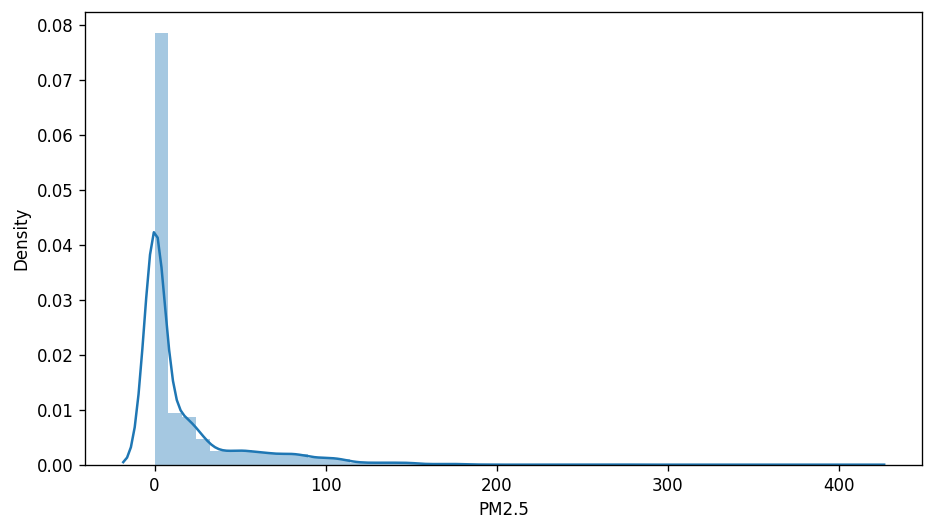

In [168]:
sns.distplot(Dataset["PM2.5"])

##Checking outlier

#PM2.5

In [169]:
pd.isnull(Dataset["PM2.5"]).sum()

6

In [170]:
Dataset["PM2.5"]=Dataset["PM2.5"].fillna(Dataset["PM2.5"].median())

In [171]:
Dataset["PM2.5"].describe()

count    3718.000000
mean       16.623908
std        31.487027
min         0.000000
25%         0.000000
50%         0.000000
75%        19.590000
max       408.070000
Name: PM2.5, dtype: float64

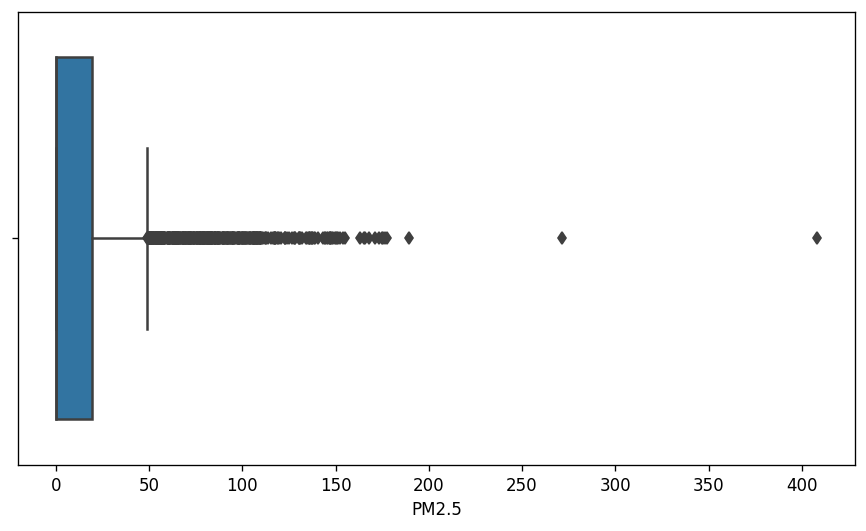

In [172]:
sns.boxplot(x="PM2.5", data=Dataset)

In [173]:
Dataset = Dataset.drop(Dataset[(Dataset['PM2.5']>250)].index)

In [174]:
#Dataset = Dataset.drop(Dataset[(Dataset['PM2.5']==0)].index)

In [175]:
Dataset["PM2.5"].describe()

count    3716.000000
mean       16.449962
std        30.548248
min         0.000000
25%         0.000000
50%         0.000000
75%        19.575000
max       189.210000
Name: PM2.5, dtype: float64

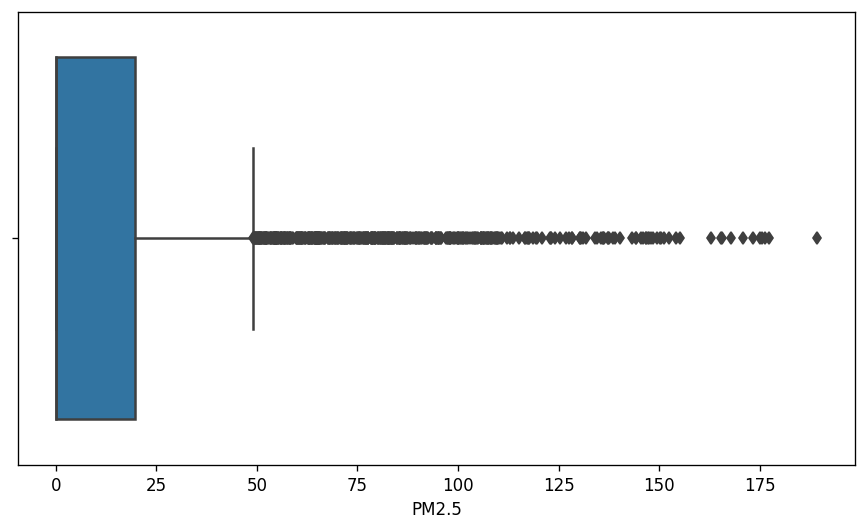

In [176]:
sns.boxplot(x="PM2.5", data=Dataset)

In [177]:
#sns.catplot(x="PM2.5", y="Station", hue="YEAR", data=Dataset, height=5, aspect=3)

#PM10

In [178]:
Dataset["PM10"].describe()

count    3698.000000
mean       43.242117
std        72.538774
min         0.000000
25%         0.000000
50%         0.000000
75%        67.942500
max       375.620000
Name: PM10, dtype: float64

In [179]:
pd.isnull(Dataset["PM10"]).sum()

18

In [180]:
Dataset["PM10"]=Dataset["PM10"].fillna(Dataset["PM10"].median())

In [181]:
Dataset["PM10"].describe()

count    3716.000000
mean       43.032656
std        72.425099
min         0.000000
25%         0.000000
50%         0.000000
75%        67.697500
max       375.620000
Name: PM10, dtype: float64

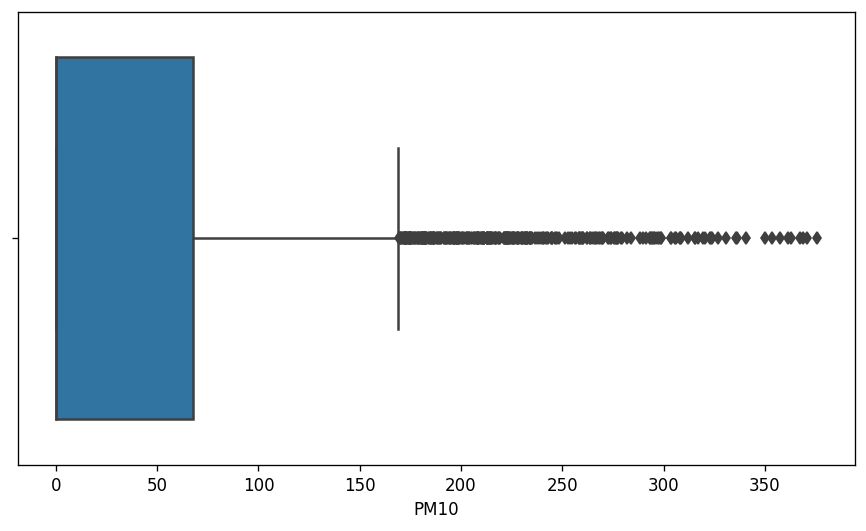

In [182]:
sns.boxplot(x="PM10", data=Dataset)

In [183]:
#Dataset = Dataset.drop(Dataset[(Dataset['PM10']>400)].index)

In [184]:
#sns.boxplot(x="PM10", data=Dataset)

#NO

In [185]:
Dataset["NO"].describe()

count    2569.000000
mean       17.087591
std        25.730045
min         0.000000
25%         0.000000
50%         2.530000
75%        27.100000
max       176.200000
Name: NO, dtype: float64

In [186]:
pd.isnull(Dataset["NO"]).sum()

1147

In [187]:
Dataset["NO"]=Dataset["NO"].fillna(Dataset["NO"].median())

In [188]:
Dataset["NO"].describe()

count    3716.000000
mean       12.594168
std        22.424712
min         0.000000
25%         0.000000
50%         2.530000
75%        13.315000
max       176.200000
Name: NO, dtype: float64

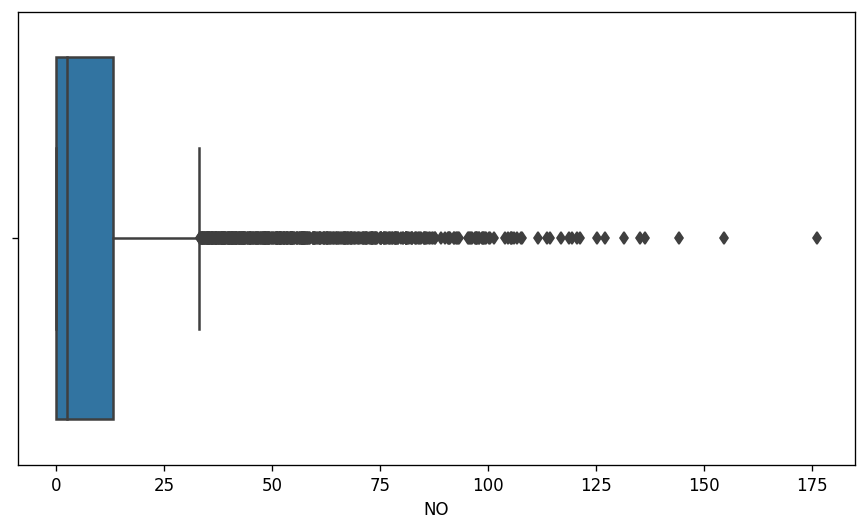

In [189]:
sns.boxplot(x="NO", data=Dataset)

In [190]:
Dataset = Dataset.drop(Dataset[(Dataset['NO']>125)].index)
Dataset["NO"].describe()

count    3700.000000
mean       12.325927
std        21.644410
min         0.000000
25%         0.000000
50%         2.530000
75%        13.140000
max       121.420000
Name: NO, dtype: float64

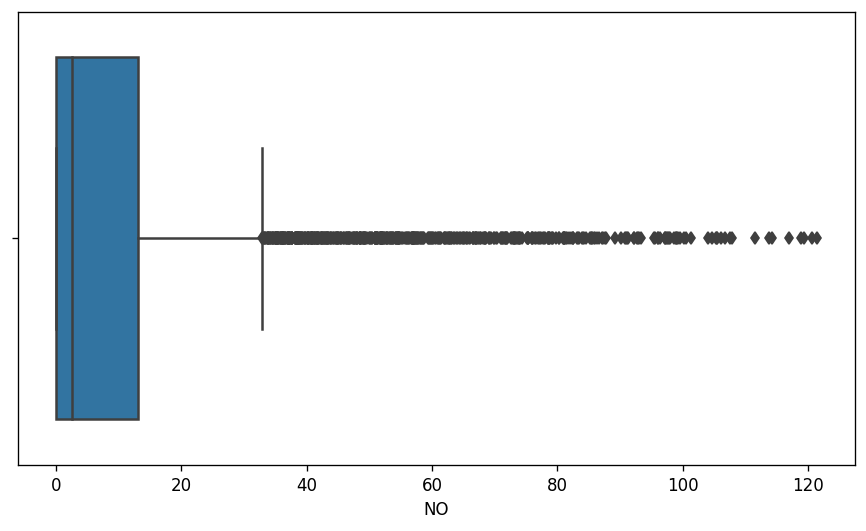

In [191]:
sns.boxplot(x="NO", data=Dataset)

#NO2

In [192]:
pd.isnull(Dataset["NO2"]).sum()

1164

In [193]:
Dataset["NO2"].describe()

count    2536.000000
mean       14.270785
std        21.629653
min         0.000000
25%         0.000000
50%         2.875000
75%        22.365000
max       146.940000
Name: NO2, dtype: float64

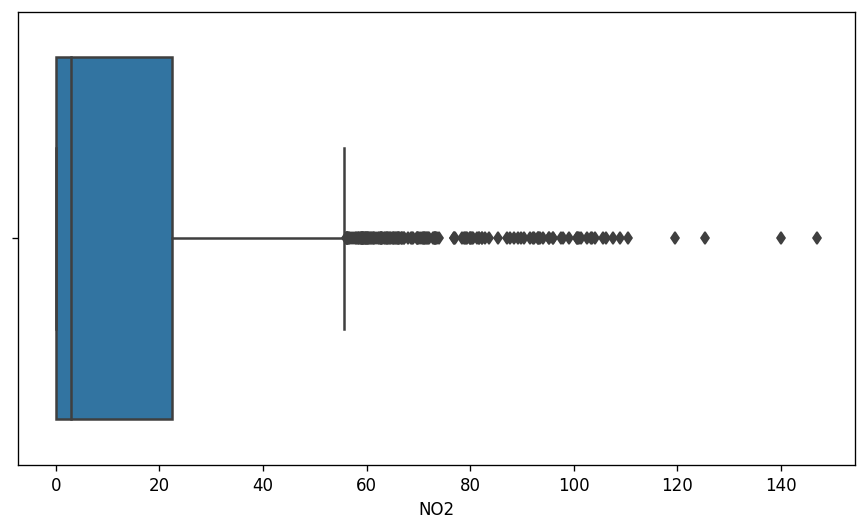

In [194]:
sns.boxplot(x="NO2", data=Dataset)

In [195]:
#Dataset = Dataset.drop(Dataset[(Dataset['NO2']>120)].index)

#NH3

In [196]:
pd.isnull(Dataset["NH3"]).sum()

2758

In [197]:
Dataset["NH3"].describe()

count    942.000000
mean      20.799384
std       21.710026
min        0.060000
25%        6.385000
50%       13.860000
75%       28.462500
max      221.040000
Name: NH3, dtype: float64

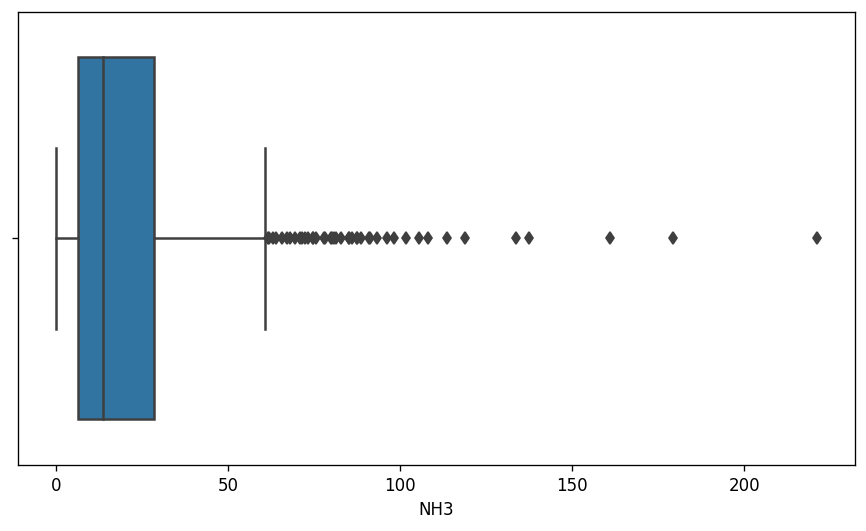

In [198]:
sns.boxplot(x="NH3", data=Dataset)

#So2

In [199]:
pd.isnull(Dataset["SO2"]).sum()

849

In [200]:
Dataset["SO2"]=Dataset["SO2"].fillna(Dataset["SO2"].median())

In [201]:
Dataset["SO2"].describe()

count    3700.000000
mean        5.240181
std         9.657852
min         0.000000
25%         0.000000
50%         0.000000
75%         7.902500
max       107.970000
Name: SO2, dtype: float64

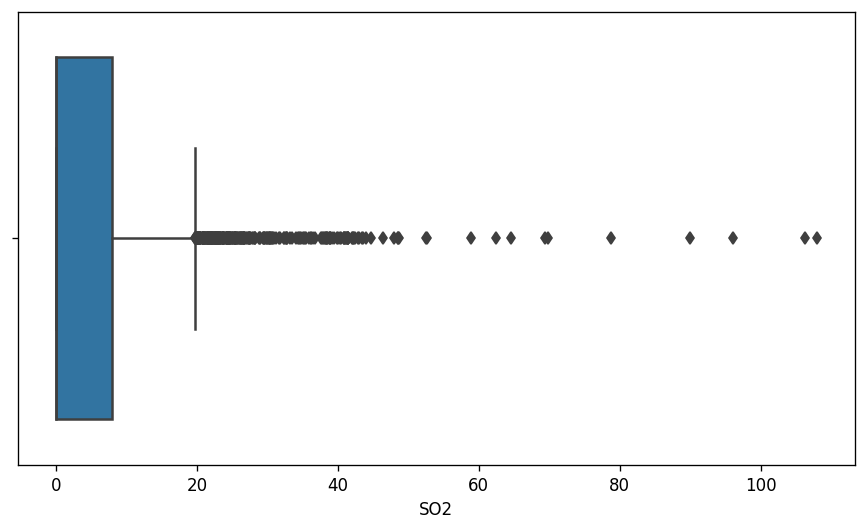

In [202]:
sns.boxplot(x="SO2", data=Dataset)

#CO

In [203]:
pd.isnull(Dataset["CO"]).sum()

851

In [204]:
Dataset["CO"].describe()

count    2849.000000
mean        0.569512
std         0.789574
min         0.000000
25%         0.000000
50%         0.030000
75%         1.080000
max         8.710000
Name: CO, dtype: float64

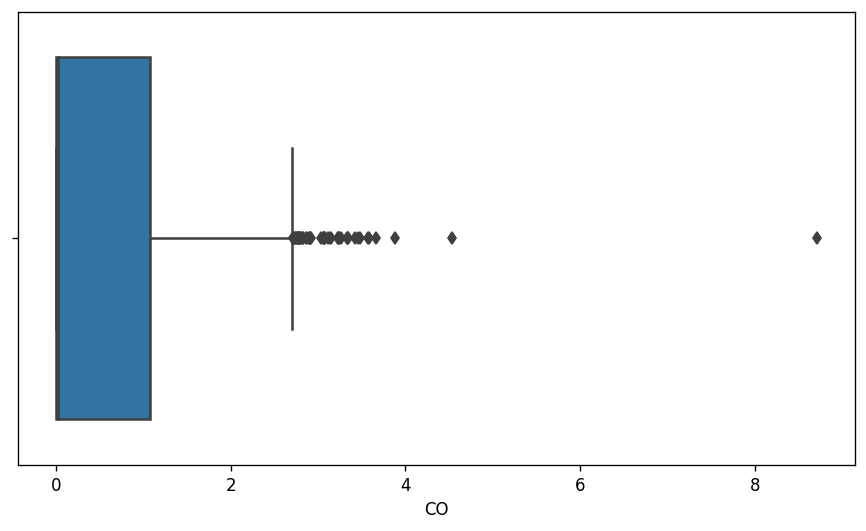

In [205]:
sns.boxplot(x="CO", data=Dataset)

#OZone

count    2859.000000
mean        1.867936
std         5.033563
min         0.000000
25%         0.000000
50%         0.000000
75%         1.275000
max        56.040000
Name: Ozone, dtype: float64


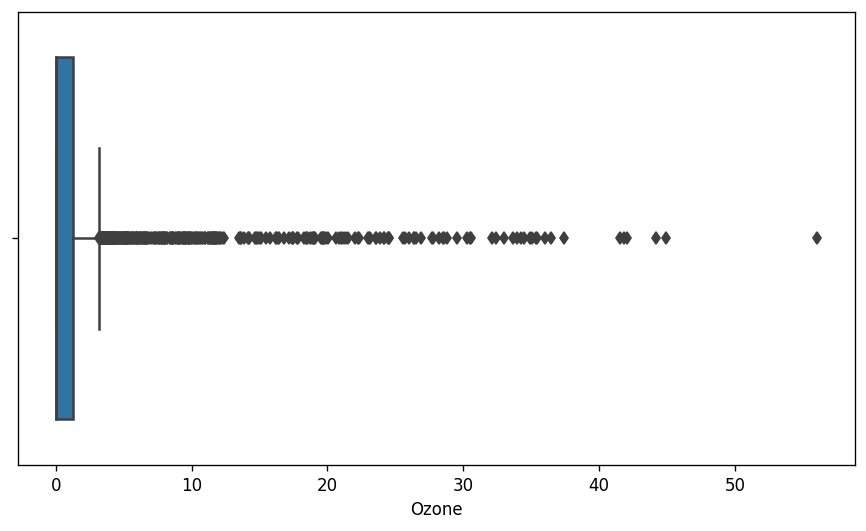

In [206]:
pd.isnull(Dataset["Ozone"]).sum()
print(Dataset["Ozone"].describe())
sns.boxplot(x="Ozone", data=Dataset)

In [207]:
Dataset = Dataset.drop(Dataset[(Dataset['Ozone']>250)].index)

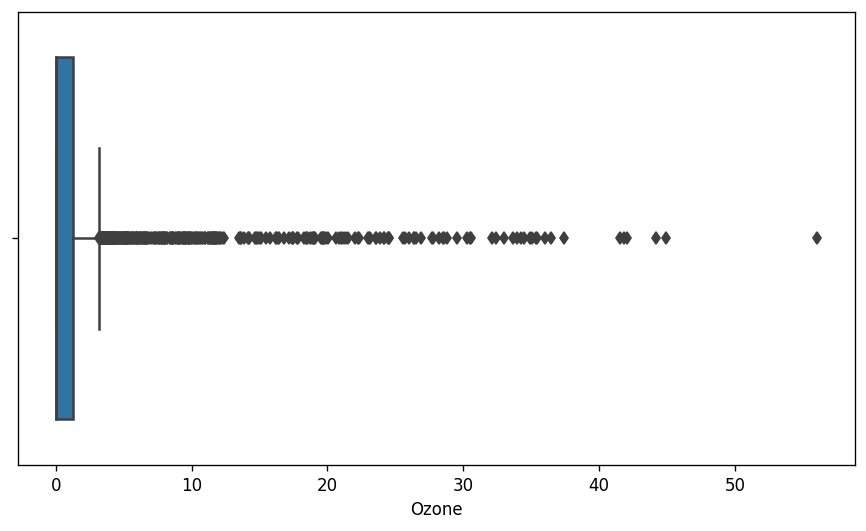

In [208]:
sns.boxplot(x="Ozone", data=Dataset)

#CO2

3406

count    294.000000
mean     408.853095
std       75.098075
min      183.290000
25%      366.232500
50%      402.505000
75%      457.670000
max      614.190000
Name: CO2, dtype: float64


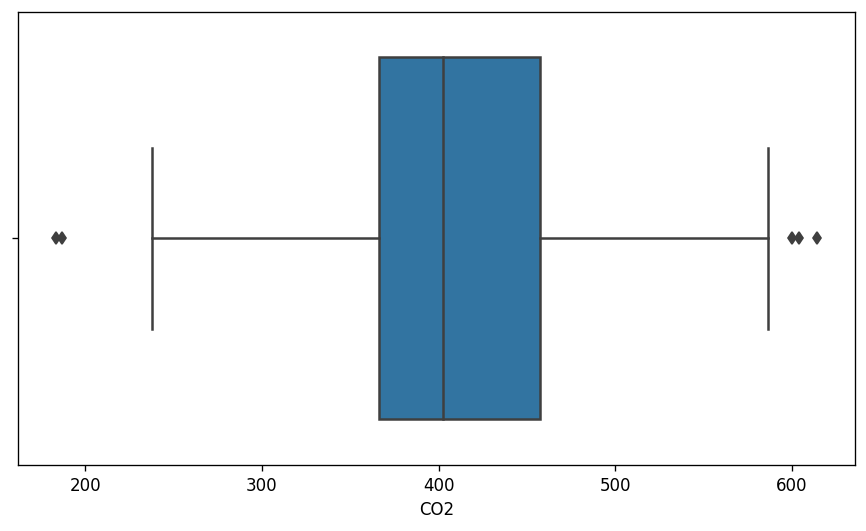

In [209]:
display(pd.isnull(Dataset["CO2"]).sum())
print(Dataset["CO2"].describe())
sns.boxplot(x="CO2", data=Dataset)

#CH4

3699

count     1.00
mean     60.67
std        NaN
min      60.67
25%      60.67
50%      60.67
75%      60.67
max      60.67
Name: CH4, dtype: float64


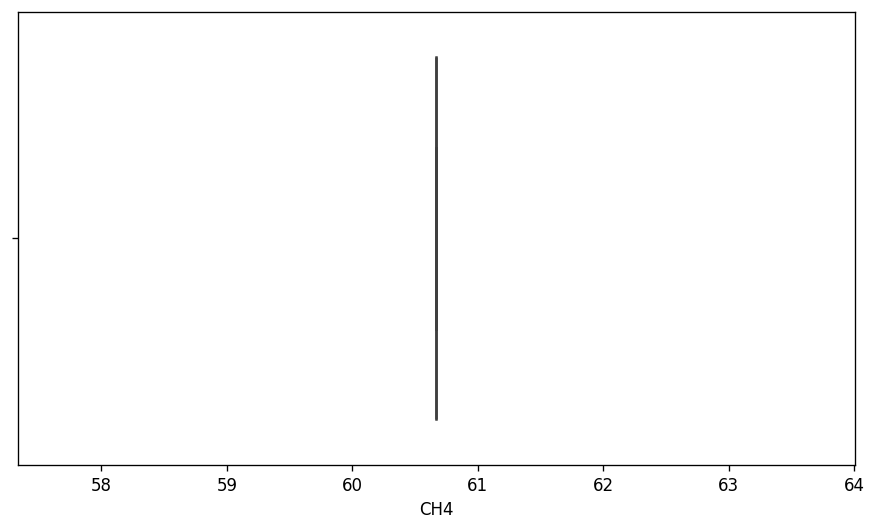

In [210]:
display(pd.isnull(Dataset["CH4"]).sum())
print(Dataset["CH4"].describe())
sns.boxplot(x="CH4", data=Dataset)

In [211]:
import plotly.graph_objects as go

In [212]:
Good = len(Dataset[(Dataset['AQI']>0) & (Dataset['AQI']<=50)].count(axis=1))
Satisfactory = len(Dataset[(Dataset['AQI']>=51) & (Dataset['AQI']<=100)].count(axis=1))
Moderately_polluted = len(Dataset[(Dataset['AQI']>=101) & (Dataset['AQI']<=200)].count(axis=1))
Poor = len(Dataset[(Dataset['AQI']>=201) & (Dataset['AQI']<=300)].count(axis=1))
Very_poor = len(Dataset[(Dataset['AQI']>=301) & (Dataset['AQI']<=400)].count(axis=1))
Severe = len(Dataset[(Dataset['AQI']>=401)].count(axis=1))
colors = ['lightgreen', 'mediumseagreen', 'yellow', 'orangered', 'darkred', 'red']

Aqi_grp = ['Good','Satisfactory','Moderately Polluted','Poor','Very Poor','Severe']
Aqi_group_val = [Good,Satisfactory,Moderately_polluted,Poor,Very_poor,Severe]

fig = go.Figure(data=[go.Pie(labels=Aqi_grp, values=Aqi_group_val,sort=False,title="AQI Category, Pollutants and Health Breakpoints from Jan 2019 to May 2021 for major Indian Cities",
                            marker=dict(colors=colors),textfont_size=12)])

fig.show()

In [213]:
#import plotly.express as px

In [214]:
#px.scatter(Dataset, x = "MONTH", y = "PM2.5", animation_frame = "MONTH", animation_group = "Station",
 #          color = "Station", size='PM2.5',range_x=[1,30], range_y=[0,400],)

In [215]:
Dataset.describe()

PM2.5         PM10           NO          NO2         NH3  \
count  3700.000000  3700.000000  3700.000000  2536.000000  942.000000   
mean     16.275635    42.579200    12.325927    14.270785   20.799384   
std      30.327623    71.870017    21.644410    21.629653   21.710026   
min       0.000000     0.000000     0.000000     0.000000    0.060000   
25%       0.000000     0.000000     0.000000     0.000000    6.385000   
50%       0.000000     0.000000     2.530000     2.875000   13.860000   
75%      19.360000    67.062500    13.140000    22.365000   28.462500   
max     189.210000   375.620000   121.420000   146.940000  221.040000   

               SO2           CO      Benzene        Ozone    CH4  ...  \
count  3700.000000  2849.000000  2851.000000  2859.000000   1.00  ...   
mean      5.240181     0.569512    12.375721     1.867936  60.67  ...   
std       9.657852     0.789574    23.691250     5.033563    NaN  ...   
min       0.000000     0.000000     0.000000     0.000000  60.67  ...   
25%       0.000000     0.000000     0.000000     0.000000  60.67  ...   
50%       0.000000     0.030000     0.000000     0.000000  60.67  ...   
75%       7.902500     1.080000    17.105000     1.275000  60.67  ...   
max     107.970000     8.710000   699.840000    56.040000  60.67  ...   

           I6(SO2)       I7(CO)  I1(PM2.5).1   I2(PM10).1     I3(NO).1  \
count  3700.000000  3700.000000  3700.000000  3700.000000  3700.000000   
mean      5.238894     0.438524     0.367027     0.360811     0.362162   
std       9.644403     0.733115     0.482059     0.480301     0.480690   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       7.902500     0.740000     1.000000     1.000000     1.000000   
max     105.313333     8.710000     1.000000     1.000000     1.000000   

         I4(NO2).1    I5(NH3).1    I6(SO2).1     I7(CO).1          AQI  
count  3700.000000  3700.000000  3700.000000  3700.000000  1358.000000  
mean      0.359459     0.254595     0.367297     0.388919   106.657277  
std       0.479907     0.435692     0.482134     0.487571    57.012031  
min       0.000000     0.000000     0.000000     0.000000    12.120000  
25%       0.000000     0.000000     0.000000     0.000000    62.262500  
50%       0.000000     0.000000     0.000000     0.000000    97.645000  
75%       1.000000     1.000000     1.000000     1.000000   143.988333  
max       1.000000     1.000000     1.000000     1.000000   332.025000  

[8 rows x 27 columns]

#TSA 

#PM2.5

##EDA

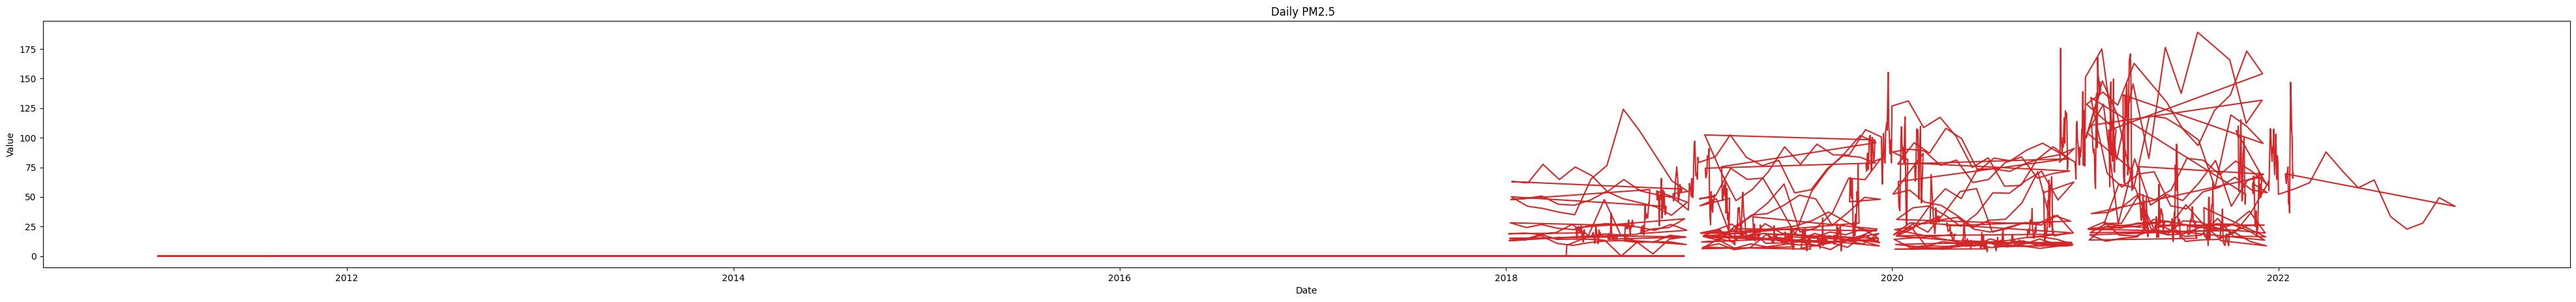

In [216]:
#Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(50,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(Dataset, x=Dataset.index, y=Dataset['PM2.5'], title='Daily PM2.5  ')

In [224]:
#fig, axes = plt.subplots(7, 1, figsize=(15,5), dpi= 80)
#Dataset['PM2.5'].plot(xlim=['01-01-2018','31-12-2021'],ax=axes[0])
#Dataset['PM10'].plot(xlim=['01-01-2018','31-12-2021'],ax=axes[1])
#Dataset['NO'].plot(xlim=['01-01-2018','31-12-2021'],ax=axes[2])
#Dataset['NO2'].plot(xlim=['01-01-2018','31-12-2021'],ax=axes[3])
#Dataset['SO2'].plot(xlim=['01-01-2018','31-12-2021'],ax=axes[4])
#Dataset['CO'].plot(xlim=['01-01-2018','31-12-2021'],ax=axes[5])
#Dataset['Ozone'].plot(xlim=['01-01-2018','31-12-2021'],ax=axes[6])


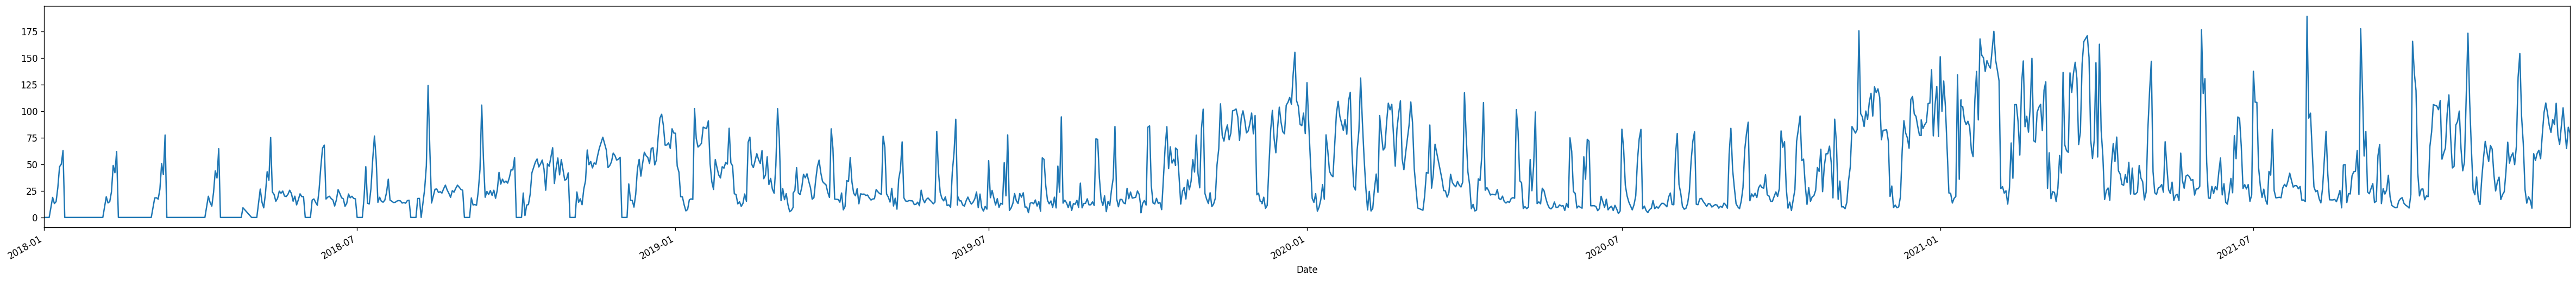

In [225]:
Dataset["PM2.5"].plot(xlim=['01-01-2018','31-12-2021'],figsize=(50,5))

In [226]:
Dataset.index

DatetimeIndex(['2011-08-06', '2011-09-06', '2011-10-06', '2011-11-06',
               '2011-12-06', '2011-06-13', '2011-06-14', '2011-06-15',
               '2011-06-16', '2011-06-17',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-29'],
              dtype='datetime64[ns]', name='Date', length=3700, freq=None)

In [219]:
index=Dataset.loc['01-01-2018':'31-12-2021'].index

In [220]:
#df1.plot(figsize=(30,5))
df1=Dataset.loc['01-01-2018':'31-12-2021']['PM2.5']

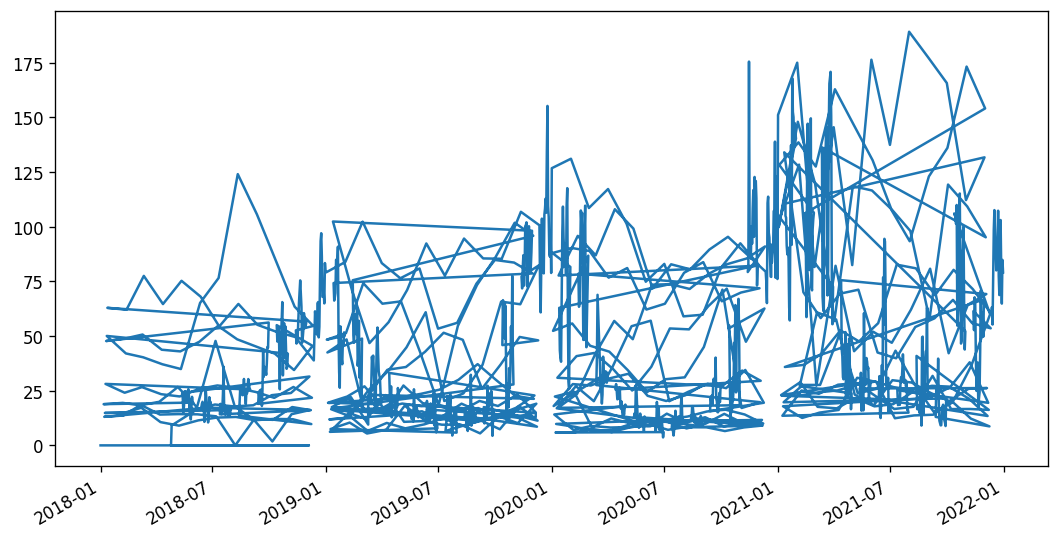

In [227]:
fig,axis=plt.subplots()
#plt.figure(figsize=(50,5))
plt.tight_layout()
#preventing
fig.autofmt_xdate()
axis.plot(index,df1)

In [62]:
datetime(2021,1,1)

datetime.datetime(2021, 1, 1, 0, 0)

In [63]:
datetime.now()

datetime.datetime(2022, 5, 18, 16, 52, 37, 885321)

##Time resample

In [222]:
Dataset.resample(rule='A').max()

City                Station         FromDate  \
Date                                                            
2011-12-31  Mumbai-02     Bandra,Mumbai-MPCB  31-07-201100:00   
2012-12-31  Mumbai-02     Bandra,Mumbai-MPCB  31-12-201200:00   
2013-12-31  Mumbai-02     Bandra,Mumbai-MPCB  31-12-201300:00   
2014-12-31  Mumbai-02     Bandra,Mumbai-MPCB  31-12-201400:00   
2015-12-31  Mumbai-02     Bandra,Mumbai-MPCB  31-12-201500:00   
2016-12-31  Mumbai-02     Bandra,Mumbai-MPCB  31-12-201600:00   
2017-12-31  Mumbai-02     Bandra,Mumbai-MPCB  31-12-201700:00   
2018-12-31  Mumbai-02     Bandra,Mumbai-MPCB  31-12-201800:00   
2019-12-31  Mumbai-17  VasaiWest,Mumbai-MPCB  31-12-201900:00   
2020-12-31  Mumbai-17  VasaiWest,Mumbai-MPCB  31-12-202000:00   
2021-12-31  Mumbai-13    Mazgaon,Mumbai-IITM  31-12-202100:00   
2022-12-31  Mumbai-07     Colaba,Mumbai-MPCB  29-01-202200:00   

                     ToDate   PM2.5    PM10      NO     NO2     NH3     SO2  \
Date                                                                          
2011-12-31  31-07-201100:00    0.00    0.00    2.53     NaN     NaN    0.00   
2012-12-31  31-12-201200:00    0.00    0.00    2.53     NaN     NaN    0.00   
2013-12-31  31-12-201300:00    0.00    0.00    2.53     NaN     NaN    0.00   
2014-12-31  31-12-201400:00    0.00    0.00    2.53     NaN     NaN    0.00   
2015-12-31  31-12-201500:00    0.00    0.00    0.00    0.00     NaN    0.00   
2016-12-31  31-12-201600:00    0.00    0.00    2.53    0.00     NaN    0.00   
2017-12-31  31-12-201700:00    0.00    0.00    0.00    0.00     NaN   39.50   
2018-12-31  31-12-201800:00  124.08  265.49  106.14  105.60     NaN   40.37   
2019-12-31  31-12-201900:00  155.28  293.32  116.97  107.55   54.63  107.97   
2020-12-31  31-12-202000:00  175.55  308.33  121.42  103.45   98.26  106.32   
2021-12-31  31-12-202100:00  189.21  375.62  119.41  146.94  221.04   69.79   
2022-12-31  30-01-202200:00  146.83  330.85    6.64   22.55   11.62   43.49   

            ...     I6(SO2)  I7(CO)  I1(PM2.5).1  I2(PM10).1  I3(NO).1  \
Date        ...                                                          
2011-12-31  ...    0.000000    0.00            0           0         0   
2012-12-31  ...    0.000000    0.00            0           0         0   
2013-12-31  ...    0.000000    0.00            0           0         0   
2014-12-31  ...    0.000000    0.00            0           0         0   
2015-12-31  ...    0.000000    0.00            0           0         0   
2016-12-31  ...    0.000000    0.00            0           0         0   
2017-12-31  ...   39.500000    0.00            0           0         0   
2018-12-31  ...   40.370000    3.58            1           1         1   
2019-12-31  ...  105.313333    8.71            1           1         1   
2020-12-31  ...  104.213333    2.79            1           1         1   
2021-12-31  ...   69.790000    4.54            1           1         1   
2022-12-31  ...   43.490000    1.27            1           1         1   

            I4(NO2).1  I5(NH3).1  I6(SO2).1  I7(CO).1      AQI  
Date                                                            
2011-12-31          0          0          0         0      NaN  
2012-12-31          0          0          0         0      NaN  
2013-12-31          0          0          0         0      NaN  
2014-12-31          0          0          0         0      NaN  
2015-12-31          0          0          0         0      NaN  
2016-12-31          0          0          0         0      NaN  
2017-12-31          0          0          1         0      NaN  
2018-12-31          1          0          1         1  215.490  
2019-12-31          1          1          1         1  243.320  
2020-12-31          1          1          1         1  258.330  
2021-12-31          1          1          1         1  332.025  
2022-12-31          1          1          1         1  280.850  

[12 rows x 31 columns]

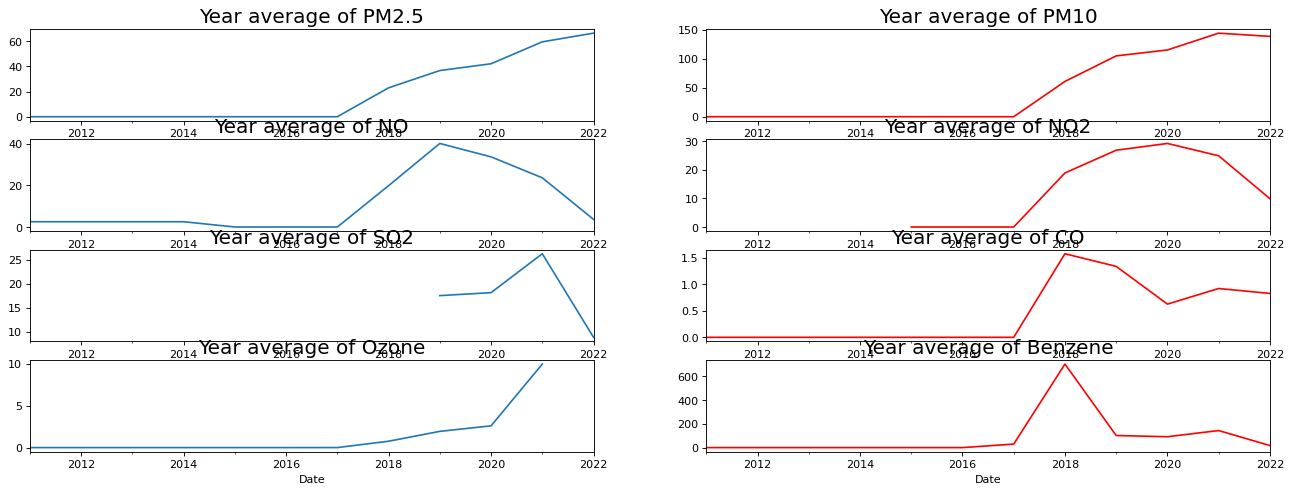

In [228]:
fig, axes = plt.subplots(4, 2, figsize=(20,7), dpi= 80)
Dataset.resample(rule='A').mean()['PM2.5'].plot(ax=axes[0,0])
Dataset.resample(rule='A').mean()['PM10'].plot( ax=axes[0,1],color="red")
Dataset.resample(rule='A').mean()['NO'].plot( ax=axes[1,0])
Dataset.resample(rule='A').mean()['NO2'].plot( ax=axes[1,1],color="red")
Dataset.resample(rule='A').mean()['NH3'].plot( ax=axes[2,0])
Dataset.resample(rule='A').mean()['CO'].plot( ax=axes[2,1],color="red")
Dataset.resample(rule='A').mean()['Ozone'].plot( ax=axes[3,0])
Dataset.resample(rule='A').max()['Benzene'].plot( ax=axes[3,1],color="red")
axes[0,0].set_title('Year average of PM2.5', fontsize=18); 
axes[0,1].set_title('Year average of PM10', fontsize=18)
axes[1,0].set_title('Year average of NO', fontsize=18)
axes[1,1].set_title('Year average of NO2', fontsize=18)
axes[2,0].set_title('Year average of SO2', fontsize=18)
axes[2,1].set_title('Year average of CO', fontsize=18)
axes[3,0].set_title('Year average of Ozone', fontsize=18)
axes[3,1].set_title('Year average of Benzene', fontsize=18)
plt.show()

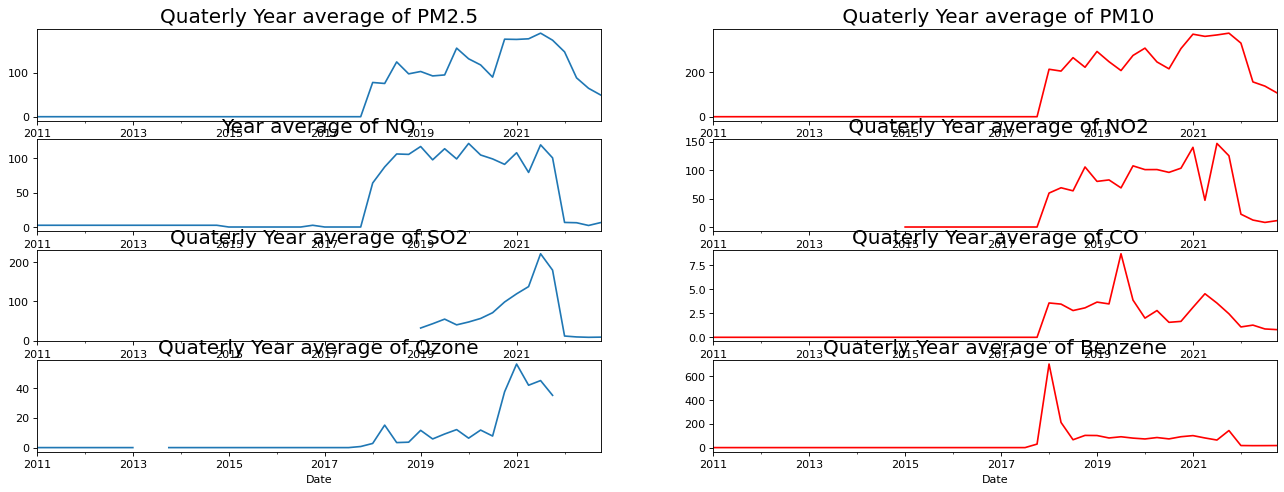

In [229]:
#quaterly start frequency
fig, axes = plt.subplots(4, 2, figsize=(20,7), dpi= 80)
Dataset.resample(rule='QS').max()['PM2.5'].plot(ax=axes[0,0])
Dataset.resample(rule='QS').max()['PM10'].plot( ax=axes[0,1],color="red")
Dataset.resample(rule='QS').max()['NO'].plot( ax=axes[1,0])
Dataset.resample(rule='QS').max()['NO2'].plot( ax=axes[1,1],color="red")
Dataset.resample(rule='QS').max()['NH3'].plot( ax=axes[2,0])
Dataset.resample(rule='QS').max()['CO'].plot( ax=axes[2,1],color="red")
Dataset.resample(rule='QS').max()['Ozone'].plot( ax=axes[3,0])
Dataset.resample(rule='QS').max()['Benzene'].plot( ax=axes[3,1],color="red")
axes[0,0].set_title('Quaterly Year average of PM2.5', fontsize=18); 
axes[0,1].set_title(' Quaterly Year average of PM10', fontsize=18)
axes[1,0].set_title('Year average of NO', fontsize=18)
axes[1,1].set_title(' Quaterly Year average of NO2', fontsize=18)
axes[2,0].set_title('Quaterly Year average of SO2', fontsize=18)
axes[2,1].set_title('Quaterly Year average of CO', fontsize=18)
axes[3,0].set_title('Quaterly Year average of Ozone', fontsize=18)
axes[3,1].set_title('Quaterly Year average of Benzene', fontsize=18)
plt.show()

In [67]:
#Dataset.resample(rule='A').max()['PM2.5'].plot(kind='bar')

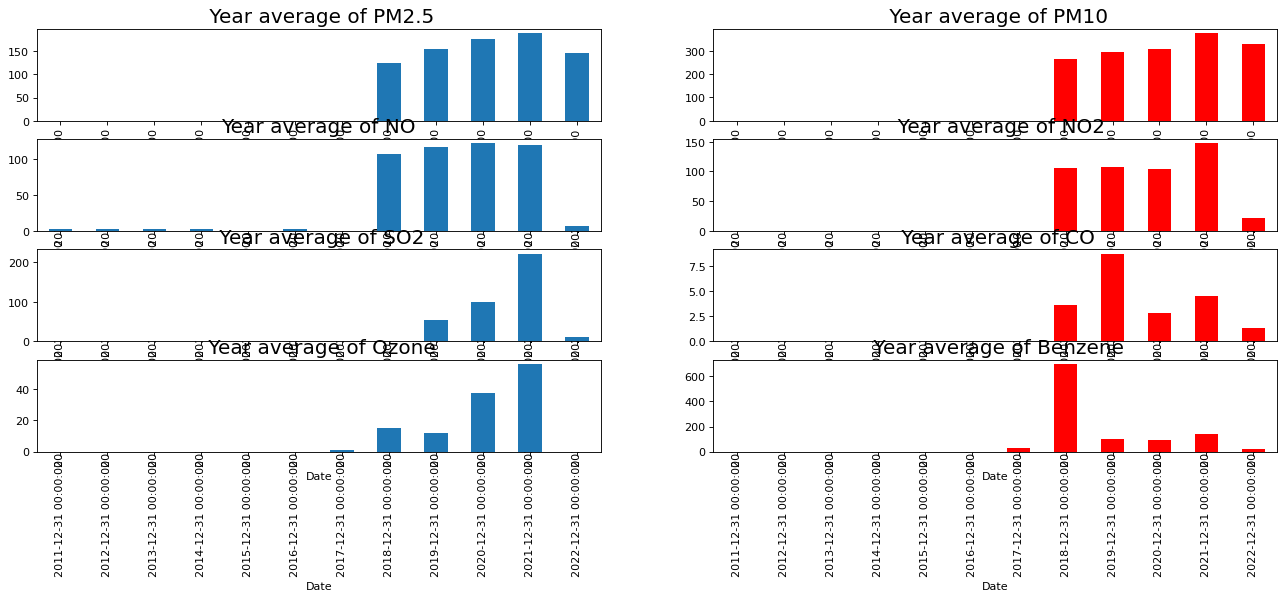

In [230]:
#Yearly graphycal presentation
fig, axes = plt.subplots(4, 2, figsize=(20,7), dpi= 80)
Dataset.resample(rule='A').max()['PM2.5'].plot(kind='bar',ax=axes[0,0])
Dataset.resample(rule='A').max()['PM10'].plot( kind='bar',ax=axes[0,1],color="red")
Dataset.resample(rule='A').max()['NO'].plot( kind='bar',ax=axes[1,0])
Dataset.resample(rule='A').max()['NO2'].plot( kind='bar',ax=axes[1,1],color="red")
Dataset.resample(rule='A').max()['NH3'].plot( kind='bar',ax=axes[2,0])
Dataset.resample(rule='A').max()['CO'].plot(kind='bar', ax=axes[2,1],color="red")
Dataset.resample(rule='A').max()['Ozone'].plot(kind='bar', ax=axes[3,0])
Dataset.resample(rule='A').max()['Benzene'].plot(kind='bar', ax=axes[3,1],color="red")
axes[0,0].set_title(' Year average of PM2.5', fontsize=18); 
axes[0,1].set_title(' Year average of PM10', fontsize=18)
axes[1,0].set_title('Year average of NO', fontsize=18)
axes[1,1].set_title('  Year average of NO2', fontsize=18)
axes[2,0].set_title(' Year average of SO2', fontsize=18)
axes[2,1].set_title(' Year average of CO', fontsize=18)
axes[3,0].set_title(' Year average of Ozone', fontsize=18)
axes[3,1].set_title(' Year average of Benzene', fontsize=18)
plt.show()

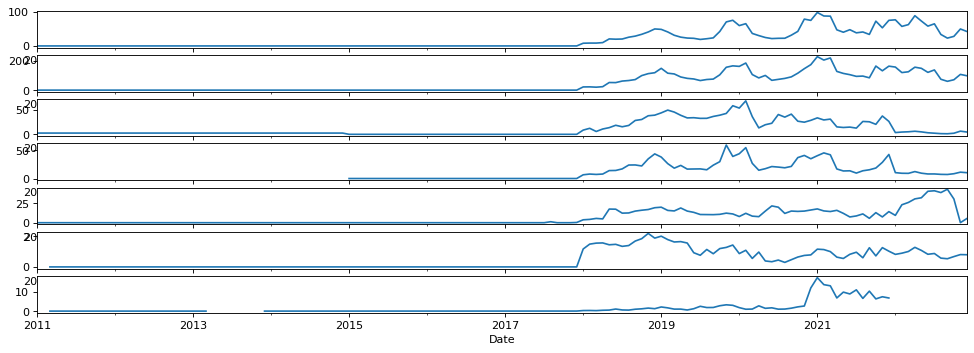

In [231]:
fig, axes = plt.subplots(7, 1, figsize=(15,5), dpi= 80)
Dataset['PM2.5'].resample(rule='M').mean().plot(ax=axes[0])
Dataset['PM10'].resample(rule='M').mean().plot(ax=axes[1])
Dataset['NO'].resample(rule='M').mean().plot(ax=axes[2])
Dataset['NO2'].resample(rule='M').mean().plot(ax=axes[3])
Dataset['SO2'].resample(rule='M').mean().plot(ax=axes[4])
Dataset['CO'].resample(rule='M').mean().plot(ax=axes[5])
Dataset['Ozone'].resample(rule='M').mean().plot(ax=axes[6])

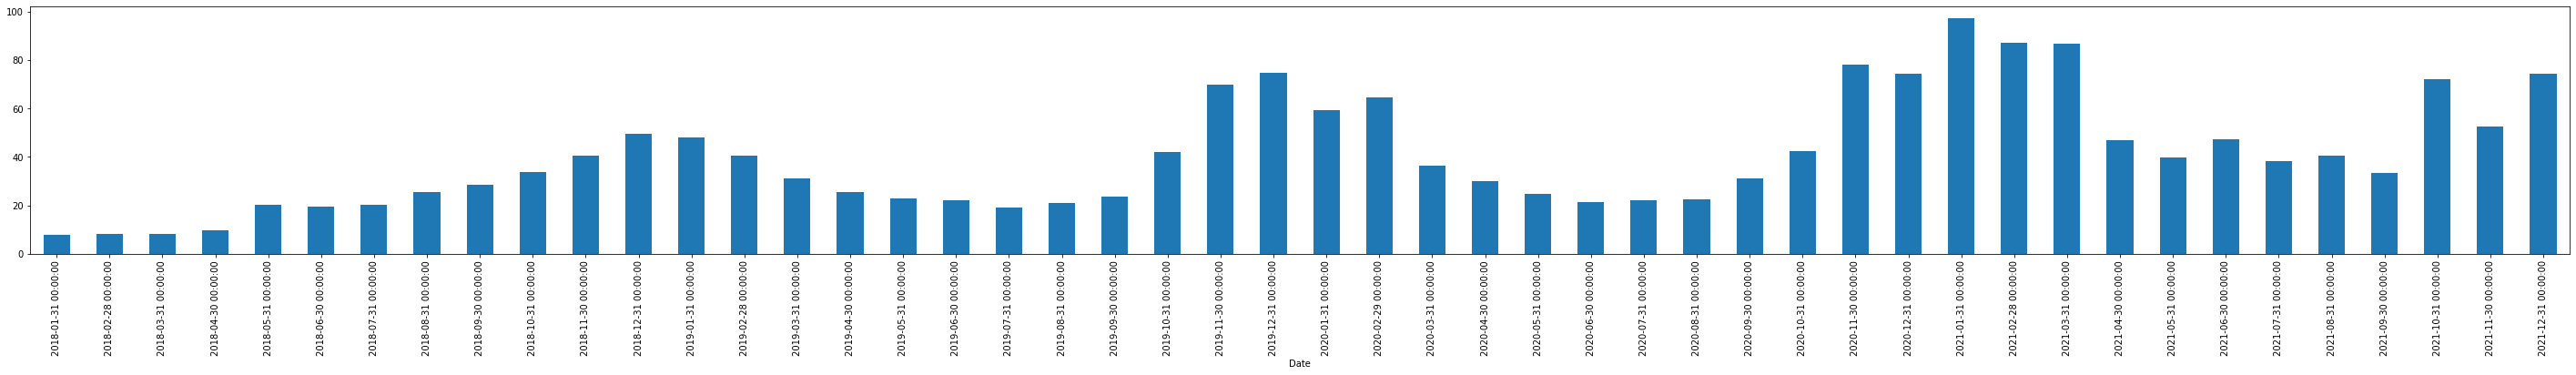

In [70]:
df1.resample(rule='M').mean().plot(kind='bar',figsize=(50,5))

####create new dataset for PM2.5 from above data

In [232]:
df2=Dataset.iloc[:,4:11].loc['01-01-2018':'01-01-2022']
df2.head()

PM2.5  PM10   NO  NO2  NH3  SO2    CO
Date                                             
2018-01-01    0.0   0.0  0.0  0.0  NaN  0.0  0.33
2018-02-01    0.0   0.0  0.0  0.0  NaN  0.0  1.84
2018-03-01    0.0   0.0  0.0  0.0  NaN  0.0  3.58
2018-04-01    0.0   0.0  0.0  0.0  NaN  0.0  3.46
2018-05-01    0.0   0.0  0.0  0.0  NaN  0.0  2.78

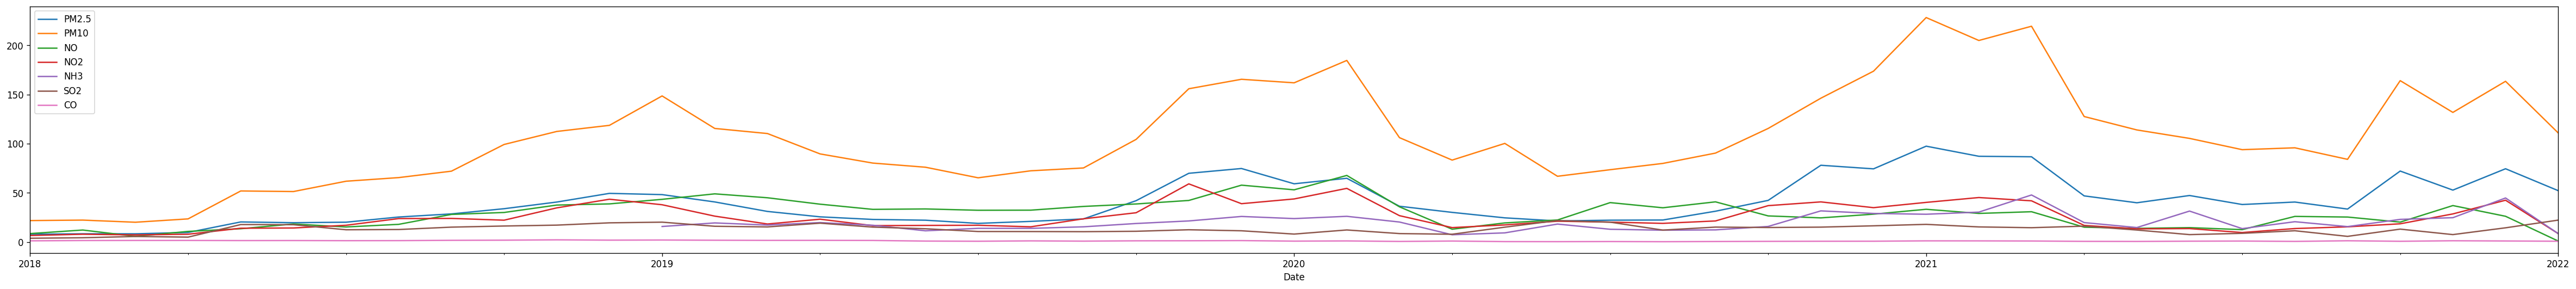

In [233]:
df2.resample(rule='M').mean().plot(figsize=(50,5))

In [235]:
df2.rolling(3).mean()

PM2.5        PM10         NO        NO2        NH3        SO2  \
Date                                                                            
2018-01-01        NaN         NaN        NaN        NaN        NaN        NaN   
2018-02-01        NaN         NaN        NaN        NaN        NaN        NaN   
2018-03-01   0.000000    0.000000   0.000000   0.000000        NaN   0.000000   
2018-04-01   0.000000    0.000000   0.000000   0.000000        NaN   0.000000   
2018-05-01   0.000000    0.000000   0.000000   0.000000        NaN   0.000000   
...               ...         ...        ...        ...        ...        ...   
2021-12-28  90.306667  178.390000  24.953333  52.780000  47.506667  16.576667   
2021-12-29  83.266667  166.976667  30.353333  60.336667  45.270000  21.720000   
2021-12-30  77.183333  159.933333  25.496667  64.393333  40.160000  26.330000   
2021-12-31  76.270000  159.010000  23.310000  50.043333  38.706667  19.873333   
2022-01-01  72.053333  151.373333  11.856667  29.210000  26.790000  18.916667   

                  CO  
Date                  
2018-01-01       NaN  
2018-02-01       NaN  
2018-03-01  1.916667  
2018-04-01  2.960000  
2018-05-01  3.273333  
...              ...  
2021-12-28  1.176667  
2021-12-29  1.120000  
2021-12-30  1.006667  
2021-12-31  0.936667  
2022-01-01  0.893333  

[1446 rows x 7 columns]

In [236]:
df2['PM2.5:30 days rolling']=df2['PM2.5'].rolling(30).mean()

In [75]:
df2.head(31)

PM2.5  PM10     NO  NO2  NH3  SO2    CO  PM2.5:30 days rolling
Date                                                                      
2018-01-01    0.0   0.0   0.00  0.0  NaN  0.0  0.33                    NaN
2018-02-01    0.0   0.0   0.00  0.0  NaN  0.0  1.84                    NaN
2018-03-01    0.0   0.0   0.00  0.0  NaN  0.0  3.58                    NaN
2018-04-01    0.0   0.0   0.00  0.0  NaN  0.0  3.46                    NaN
2018-05-01    0.0   0.0   0.00  0.0  NaN  0.0  2.78                    NaN
2018-06-01    0.0   0.0   0.00  0.0  NaN  0.0  2.90                    NaN
2018-07-01    0.0   0.0   0.00  0.0  NaN  0.0  2.62                    NaN
2018-08-01    0.0   0.0   0.00  0.0  NaN  0.0  2.46                    NaN
2018-09-01    0.0   0.0   0.00  0.0  NaN  0.0  2.15                    NaN
2018-10-01    0.0   0.0   0.00  0.0  NaN  0.0  2.42                    NaN
2018-11-01    0.0   0.0   0.00  0.0  NaN  0.0  2.20                    NaN
2018-12-01    0.0   0.0   0.00  0.0  NaN  0.0  2.08                    NaN
2018-01-13    0.0   0.0   0.00  0.0  NaN  0.0  1.91                    NaN
2018-01-14    0.0   0.0   0.00  0.0  NaN  0.0  2.19                    NaN
2018-01-15    0.0   0.0   0.00  0.0  NaN  0.0  2.50                    NaN
2018-01-16    0.0   0.0  42.77  0.0  NaN  0.0  2.03                    NaN
2018-01-17    0.0   0.0   0.00  0.0  NaN  0.0  1.36                    NaN
2018-01-18    0.0   0.0   0.00  0.0  NaN  0.0  1.22                    NaN
2018-01-19    0.0   0.0   0.00  0.0  NaN  0.0  1.39                    NaN
2018-01-20    0.0   0.0   0.00  0.0  NaN  0.0  1.18                    NaN
2018-01-21    0.0   0.0   0.00  0.0  NaN  0.0  1.30                    NaN
2018-01-22    0.0   0.0   5.30  0.0  NaN  0.0  1.28                    NaN
2018-01-23    0.0   0.0   0.00  0.0  NaN  0.0  0.83                    NaN
2018-01-24    0.0   0.0   0.00  0.0  NaN  0.0  0.05                    NaN
2018-01-25    0.0   0.0   0.00  0.0  NaN  0.0  0.00                    NaN
2018-01-26    0.0   0.0   0.00  0.0  NaN  0.0  0.00                    NaN
2018-01-27    0.0   0.0   0.00  0.0  NaN  0.0  0.00                    NaN
2018-01-28    0.0   0.0   0.00  0.0  NaN  0.0  0.00                    NaN
2018-01-29    0.0   0.0   0.00  0.0  NaN  0.0  0.00                    NaN
2018-01-30    0.0   0.0   0.00  0.0  NaN  0.0  0.00                    0.0
2018-01-31    0.0   0.0   0.00  0.0  NaN  0.0  0.00                    0.0

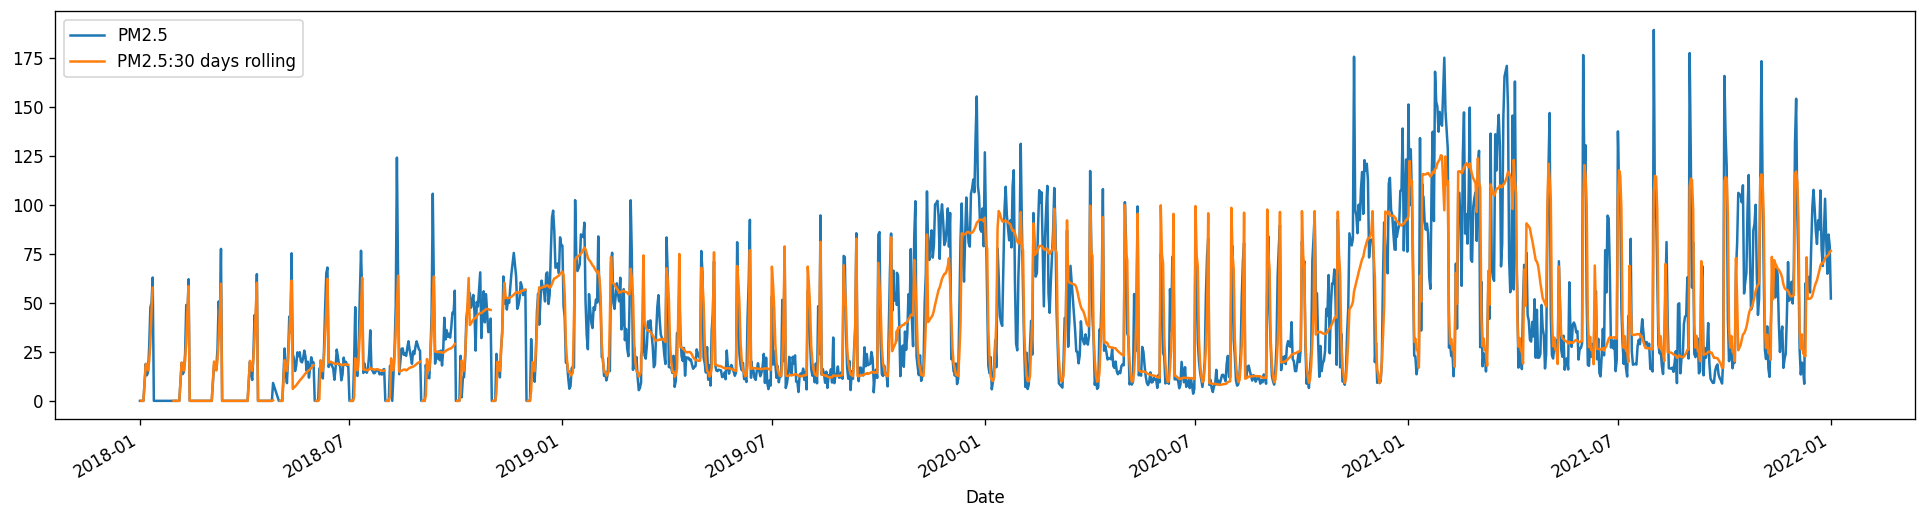

In [237]:
df2[['PM2.5','PM2.5:30 days rolling']].plot(figsize=(20,5))

In [238]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (20, 20), 'figure.dpi': 1200})


In [239]:
df2.reset_index(inplace=True)
df2.head()

Date  PM2.5  PM10   NO  NO2  NH3  SO2    CO  PM2.5:30 days rolling
0 2018-01-01    0.0   0.0  0.0  0.0  NaN  0.0  0.33                    NaN
1 2018-02-01    0.0   0.0  0.0  0.0  NaN  0.0  1.84                    NaN
2 2018-03-01    0.0   0.0  0.0  0.0  NaN  0.0  3.58                    NaN
3 2018-04-01    0.0   0.0  0.0  0.0  NaN  0.0  3.46                    NaN
4 2018-05-01    0.0   0.0  0.0  0.0  NaN  0.0  2.78                    NaN

In [240]:
data=Dataset.iloc[:,4:11]
data

PM2.5    PM10    NO    NO2    NH3    SO2    CO
Date                                                       
2011-08-06    0.00    0.00  2.53    NaN    NaN   0.00  0.00
2011-09-06    0.00    0.00  2.53    NaN    NaN   0.00  0.00
2011-10-06    0.00    0.00  2.53    NaN    NaN   0.00  0.00
2011-11-06    0.00    0.00  2.53    NaN    NaN   0.00  0.00
2011-12-06    0.00    0.00  2.53    NaN    NaN   0.00  0.00
...            ...     ...   ...    ...    ...    ...   ...
2022-01-25  130.67  276.39  1.73   8.36   9.29   8.60  0.80
2022-01-26  105.79  221.62  1.11   8.53   9.02   3.50  0.79
2022-01-27  100.10  210.26  3.62   9.43   9.29   7.69  1.08
2022-01-28   65.71  140.64  2.55  17.82  10.73  16.96  0.61
2022-01-29   70.14  144.30  2.84  22.55  11.62   6.43  0.63

[3700 rows x 7 columns]

In [244]:
data.reset_index(inplace=True)
data.head()

Date  PM2.5  PM10    NO  NO2  NH3  SO2   CO
0 2011-08-06    0.0   0.0  2.53  NaN  NaN  0.0  0.0
1 2011-09-06    0.0   0.0  2.53  NaN  NaN  0.0  0.0
2 2011-10-06    0.0   0.0  2.53  NaN  NaN  0.0  0.0
3 2011-11-06    0.0   0.0  2.53  NaN  NaN  0.0  0.0
4 2011-12-06    0.0   0.0  2.53  NaN  NaN  0.0  0.0

In [245]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data.head()

Date  PM2.5  PM10    NO  NO2  NH3  SO2   CO  year  month
0 2011-08-06    0.0   0.0  2.53  NaN  NaN  0.0  0.0  2011      8
1 2011-09-06    0.0   0.0  2.53  NaN  NaN  0.0  0.0  2011      9
2 2011-10-06    0.0   0.0  2.53  NaN  NaN  0.0  0.0  2011     10
3 2011-11-06    0.0   0.0  2.53  NaN  NaN  0.0  0.0  2011     11
4 2011-12-06    0.0   0.0  2.53  NaN  NaN  0.0  0.0  2011     12

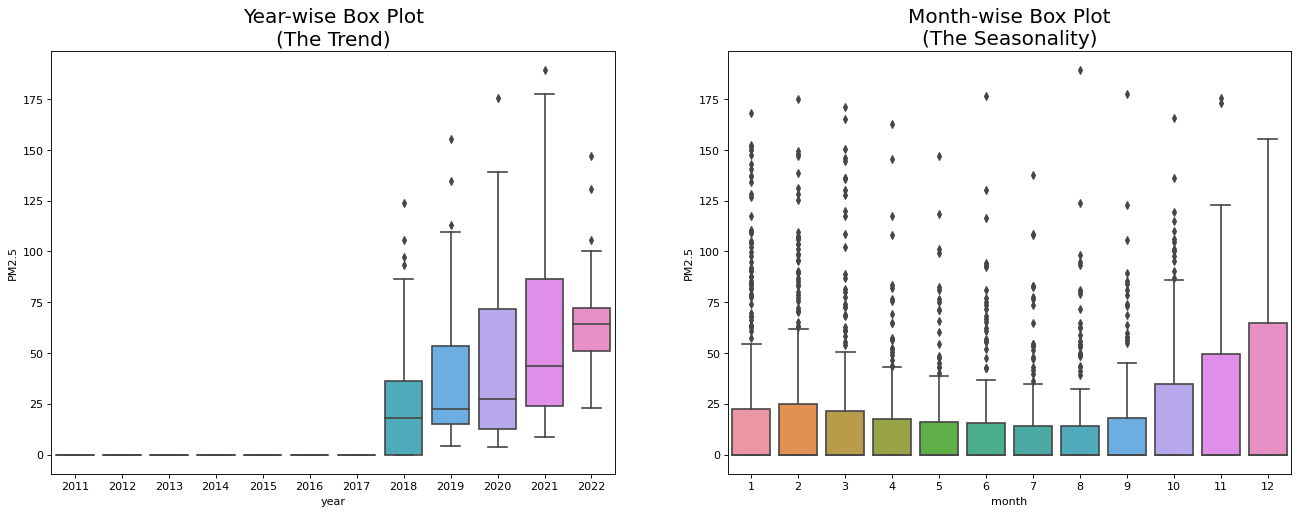

In [246]:
years = data['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='PM2.5', data=data, ax=axes[0])
sns.boxplot(x='month', y='PM2.5', data=data.loc[~data.year.isin([2011, 2022]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Additive model and multiplicative model
decomped the model for both the model

In [83]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#from dateutil.parser import parse

# Import Data

#df=pd.read_csv("/content/drive/MyDrive/mumbai station with pollutant/MumbaiDatasortCSV.csv",parse_dates=['Date'], index_col='Date')
#df["PM2.5"]=df["PM2.5"].fillna(df["PM2.5"].median())
#df = df.drop(df[(df['PM2.5']==0)].index)
# Multiplicative Decomposition 
#result_mul = seasonal_decompose(df['PM2.5'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
#result_add = seasonal_decompose(df['PM2.5'], model='additive', extrapolate_trend='freq')

# Plot
#plt.rcParams.update({'figure.figsize': (20,20)})

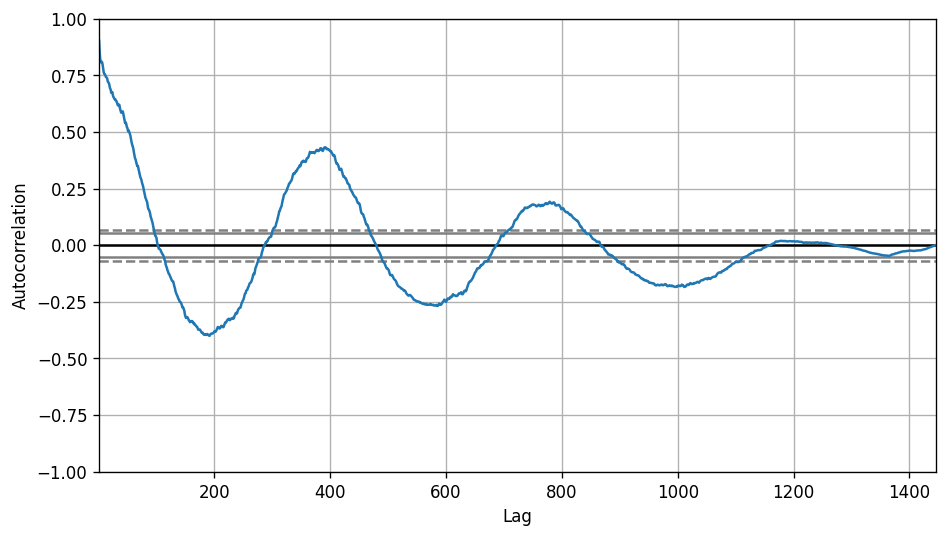

In [247]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df2['PM2.5'].tolist())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



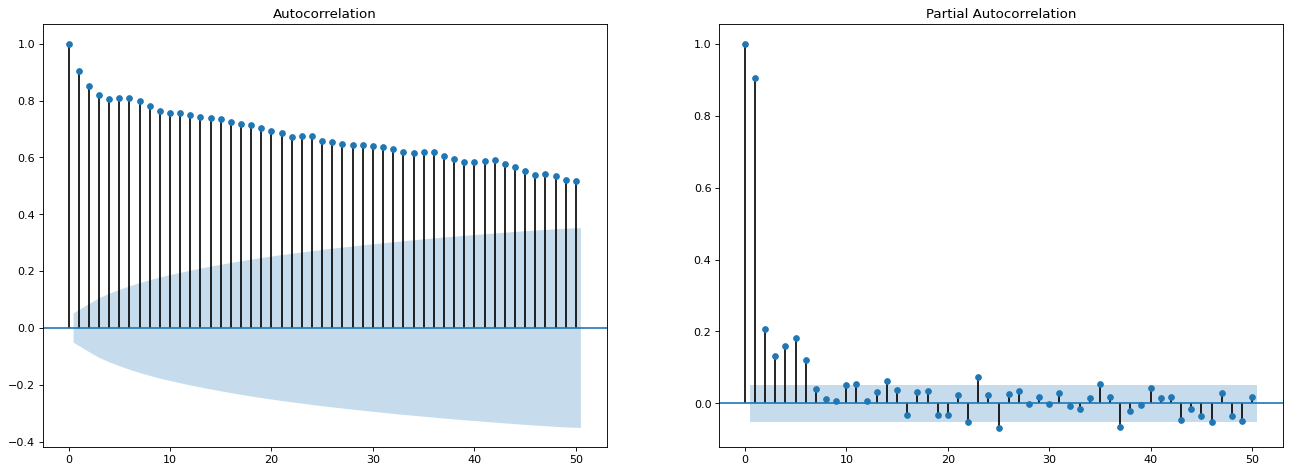

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
#acf plot of PM2.5
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2['PM2.5'], lags = 50,ax=axes[0])
#pacf plot PM2.5
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df2['PM2.5'], lags = 50,ax=axes[1])
plt.show()

In [248]:
df_1=Dataset.loc['01-01-2018':'31-12-2021']
df_1.head()
df_2=Dataset.loc['01-01-2022':'31-01-2022']
df_2.head()

City             Station         FromDate           ToDate  \
Date                                                                          
2022-01-01  Mumbai-07  Colaba,Mumbai-MPCB  01-01-202200:00  02-01-202200:00   
2022-01-14  Mumbai-07  Colaba,Mumbai-MPCB  14-01-202200:00  15-01-202200:00   
2022-01-15  Mumbai-07  Colaba,Mumbai-MPCB  15-01-202200:00  16-01-202200:00   
2022-01-16  Mumbai-07  Colaba,Mumbai-MPCB  16-01-202200:00  17-01-202200:00   
2022-01-17  Mumbai-07  Colaba,Mumbai-MPCB  17-01-202200:00  18-01-202200:00   

            PM2.5    PM10    NO    NO2   NH3    SO2  ...  I6(SO2)  I7(CO)  \
Date                                                 ...                    
2022-01-01  52.19  110.91  0.93   8.52  8.50  22.24  ...    22.24    0.76   
2022-01-14  69.56  131.19  6.64  10.85  9.25  13.64  ...    13.64    0.89   
2022-01-15  64.90  126.04  3.59   9.75  9.09  20.48  ...    20.48    0.92   
2022-01-16  61.44  120.84  5.26  11.06  9.44  19.86  ...    19.86    0.92   
2022-01-17  69.34  134.67  6.27  10.18  9.44  10.81  ...    10.81    0.94   

            I1(PM2.5).1  I2(PM10).1  I3(NO).1  I4(NO2).1  I5(NH3).1  \
Date                                                                  
2022-01-01            1           1         1          1          1   
2022-01-14            1           1         1          1          1   
2022-01-15            1           1         1          1          1   
2022-01-16            1           1         1          1          1   
2022-01-17            1           1         1          1          1   

            I6(SO2).1  I7(CO).1         AQI  
Date                                         
2022-01-01          1         1  107.273333  
2022-01-14          1         1  120.793333  
2022-01-15          1         1  117.360000  
2022-01-16          1         1  113.893333  
2022-01-17          1         1  123.113333  

[5 rows x 31 columns]

In [87]:
df_1.describe()

PM2.5         PM10           NO          NO2         NH3  \
count  1445.000000  1445.000000  1445.000000  1440.000000  915.000000   
mean     40.433765   106.442526    29.493398    24.947278   21.152153   
std      36.077810    78.205784    26.711846    23.627172   21.929031   
min       0.000000     0.000000     0.000000     0.000000    0.060000   
25%      14.320000    50.210000     6.340000     5.697500    6.180000   
50%      25.930000    87.440000    22.730000    19.440000   14.690000   
75%      60.960000   157.790000    45.990000    36.445000   28.955000   
max     189.210000   375.620000   121.420000   146.940000  221.040000   

               SO2           CO      Benzene        Ozone  CH4  ...  \
count  1445.000000  1440.000000  1440.000000  1411.000000  0.0  ...   
mean     13.060817     1.111285    24.193785     3.784337  NaN  ...   
std      11.326147     0.791693    28.705163     6.640745  NaN  ...   
min       0.000000     0.000000     0.000000     0.000000  NaN  ...   
25%       4.980000     0.420000     5.185000     0.400000  NaN  ...   
50%      11.070000     1.070000    16.725000     1.330000  NaN  ...   
75%      18.560000     1.630000    37.065000     3.610000  NaN  ...   
max     107.970000     8.710000   699.840000    56.040000  NaN  ...   

           I6(SO2)       I7(CO)  I1(PM2.5).1   I2(PM10).1     I3(NO).1  \
count  1445.000000  1445.000000  1445.000000  1445.000000  1445.000000   
mean     13.057520     1.107439     0.921107     0.905190     0.908651   
std      11.299036     0.793012     0.269665     0.293053     0.288205   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.980000     0.420000     1.000000     1.000000     1.000000   
50%      11.070000     1.070000     1.000000     1.000000     1.000000   
75%      18.560000     1.630000     1.000000     1.000000     1.000000   
max     105.313333     8.710000     1.000000     1.000000     1.000000   

         I4(NO2).1    I5(NH3).1    I6(SO2).1     I7(CO).1          AQI  
count  1445.000000  1445.000000  1445.000000  1445.000000  1331.000000  
mean      0.901730     0.633218     0.920415     0.977163   106.279098  
std       0.297782     0.482093     0.270743     0.149437    57.161502  
min       0.000000     0.000000     0.000000     0.000000    12.120000  
25%       1.000000     0.000000     1.000000     1.000000    61.725000  
50%       1.000000     1.000000     1.000000     1.000000    95.810000  
75%       1.000000     1.000000     1.000000     1.000000   144.156667  
max       1.000000     1.000000     1.000000     1.000000   332.025000  

[8 rows x 27 columns]

##test for stationarity

In [249]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df2['PM2.5'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


# KPSS Test
result = kpss(df2['PM2.5'], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.533183053327757
p-value: 0.10760784064187873
Critial Values:
   1%, -3.4349602407782758
Critial Values:
   5%, -2.8635761009296763
Critial Values:
   10%, -2.5678540089914974

KPSS Statistic: 1.042563
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



In [250]:
#Granger Causality test 
from statsmodels.tsa.stattools import grangercausalitytests
#df3 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
#.dt.month
df2['Date'] = df2.Date.dt.month
grangercausalitytests(df2[['PM2.5', 'Date']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1364  , p=0.0768  , df_denom=1442, df_num=1
ssr based chi2 test:   chi2=3.1429  , p=0.0763  , df=1
likelihood ratio test: chi2=3.1395  , p=0.0764  , df=1
parameter F test:         F=3.1364  , p=0.0768  , df_denom=1442, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4591  , p=0.2328  , df_denom=1439, df_num=2
ssr based chi2 test:   chi2=2.9283  , p=0.2313  , df=2
likelihood ratio test: chi2=2.9253  , p=0.2316  , df=2
parameter F test:         F=1.4591  , p=0.2328  , df_denom=1439, df_num=2


{1: ({'lrtest': (3.139465327036305, 0.07641885549326681, 1),
   'params_ftest': (3.1363532560564464, 0.07677602888238788, 1442.0, 1.0),
   'ssr_chi2test': (3.1428782628307292, 0.07625912212373195, 1),
   'ssr_ftest': (3.1363532560566862, 0.07677602888238172, 1442.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (2.9253134420850984, 0.23162010658769347, 2),
   'params_ftest': (1.4590695421672857, 0.23279614554271078, 1439.0, 2.0),
   'ssr_chi2test': (2.92827855300841, 0.23127697135499936, 2),
   'ssr_ftest': (1.4590695421672788, 0.23279614554271078, 1439.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

##first order diff

In [251]:
#first order differencing of raw data
df2['PM2.5_with_diff_1'] = df2['PM2.5'] - df2['PM2.5'].shift(1)
df2

Date  PM2.5    PM10     NO    NO2    NH3    SO2    CO  \
0        1   0.00    0.00   0.00   0.00    NaN   0.00  0.33   
1        2   0.00    0.00   0.00   0.00    NaN   0.00  1.84   
2        3   0.00    0.00   0.00   0.00    NaN   0.00  3.58   
3        4   0.00    0.00   0.00   0.00    NaN   0.00  3.46   
4        5   0.00    0.00   0.00   0.00    NaN   0.00  2.78   
...    ...    ...     ...    ...    ...    ...    ...   ...   
1441    12  81.87  166.69  23.99  71.73  40.51  28.11  1.10   
1442    12  64.84  133.82  35.29  71.02  44.25  25.11  0.89   
1443    12  84.84  179.29  17.21  50.43  35.72  25.77  1.03   
1444    12  79.13  163.92  17.43  28.68  36.15   8.74  0.89   
1445     1  52.19  110.91   0.93   8.52   8.50  22.24  0.76   

      PM2.5:30 days rolling  PM2.5_with_diff_1  
0                       NaN                NaN  
1                       NaN               0.00  
2                       NaN               0.00  
3                       NaN               0.00  
4                       NaN               0.00  
...                     ...                ...  
1441              73.440000             -21.22  
1442              73.945667             -17.03  
1443              74.547667              20.00  
1444              75.990000              -5.71  
1445              76.502000             -26.94  

[1446 rows x 10 columns]

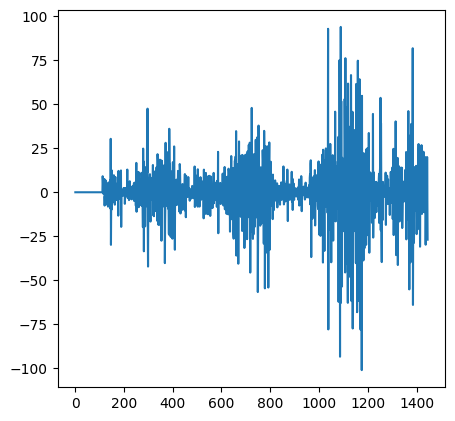

In [252]:
#ploting the time series after first order differning
plt.figure(figsize=(5,5),dpi=100)
plt.plot(df2.index,df2['PM2.5_with_diff_1'])
plt.show()

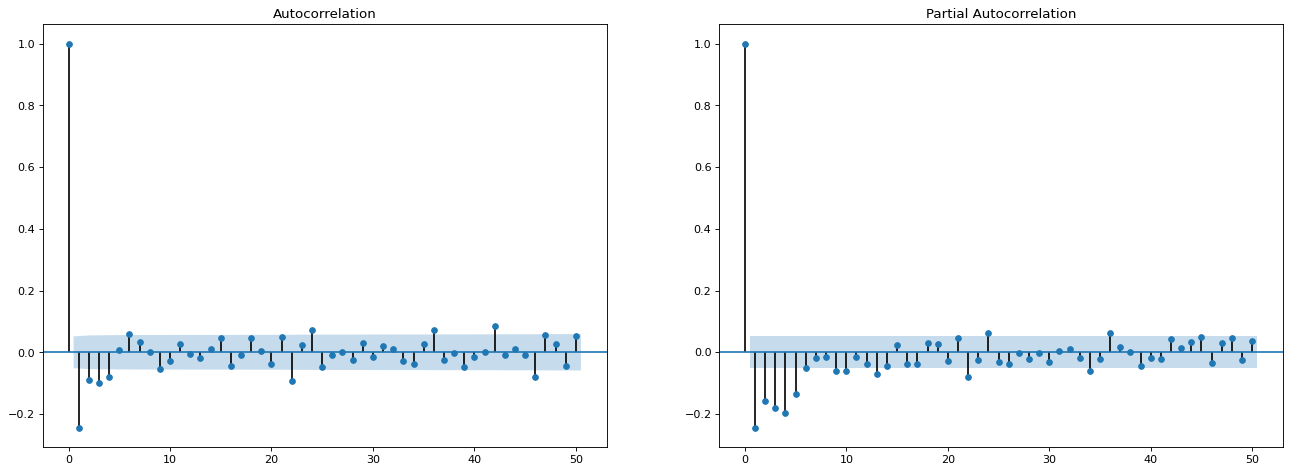

In [253]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
#acf plot of dataframe of diff 1
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2['PM2.5_with_diff_1'][1:], lags = 50,ax=axes[0])
#pacf plot of dataframe of diff 1
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df2['PM2.5_with_diff_1'][1:], lags = 50,ax=axes[1])
plt.show()

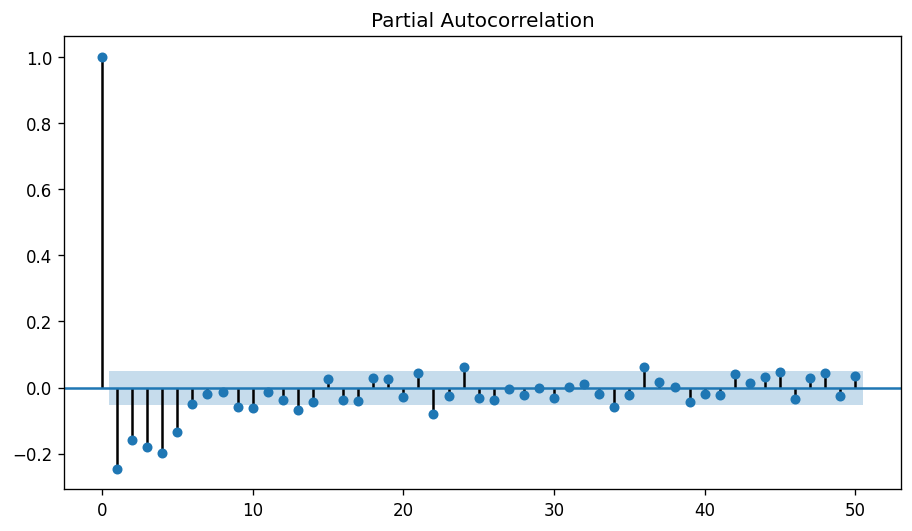

In [254]:
#pacf plot of dataframe of diff 1
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df2['PM2.5_with_diff_1'][1:], lags = 50)
plt.show()

In [255]:
#DF test on data with diff 1
from statsmodels.tsa.stattools import adfuller
result = adfuller(df2['PM2.5_with_diff_1'][1:])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value ADF: %f' % result[1])

# KPSS test
from statsmodels.tsa.stattools import kpss
result1 = kpss(df2['PM2.5_with_diff_1'][1:])
print(result1)
print('kpss Statistic: %f' % result1[0])
print('p-value kpss: %f' % result1[1])

(-9.157535809497054, 2.585427614602937e-15, 23, 1421, {'1%': -3.4349602407782758, '5%': -2.8635761009296763, '10%': -2.5678540089914974}, 11647.170168394623)
ADF Statistic: -9.157536
p-value ADF: 0.000000
(0.027558238039265714, 0.1, 24, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
kpss Statistic: 0.027558
p-value kpss: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



##second order diff

In [256]:
#second order differencing of raw data
#Dataset['PM2.5_with_diff_2'] = Dataset['PM2.5'] - Dataset['PM2.5'].shift(2)
#Dataset.head()

In [257]:
#ploting the time series after second order differning
#plt.figure(figsize=(5,5),dpi=100)
#plt.plot(Dataset.index,Dataset['PM2.5_with_diff_2'])
#plt.show()

In [258]:
#acf plot of dataframe of diff 2
#from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(Dataset['PM2.5_with_diff_2'][2:], lags = 100)
#plt.show()

In [259]:
#pacf plot of dataframe of diff 2
#from statsmodels.graphics.tsaplots import plot_pacf
#lot_pacf(Dataset['PM2.5_with_diff_2'][2:], lags = 100)
#plt.show()

In [260]:
#ADF test on data with diff 2
#from statsmodels.tsa.stattools import adfuller
#result = adfuller(Dataset['PM2.5_with_diff_2'][2:])
#print(result)
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])
#shows series is stationary

In [261]:
# KPSS test
#from statsmodels.tsa.stattools import kpss
#result = kpss(Dataset['PM2.5_with_diff_2'][2:])
#print(result)


#ARIMA

In [262]:
!pip install statsmodels

In [102]:
 #fitting arima models
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults
import re
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import pylab 
import scipy.stats as stats
from scipy.stats import anderson
from scipy.stats import shapiro
from scipy.stats import normaltest

In [263]:
df2['PM2.5'].count()

1446

In [104]:
#Dataset=Dataset.set_index('Date',drop=True)
#Dataset.head()

In [282]:
# Create Training and Test
train = Dataset['PM2.5']['25-04-2018':'31-12-2021']
test = Dataset['PM2.5']['01-01-2022':"2-02-2022"]
display(train.count())
test.count()

1337

17

In [283]:
!pip install pmdarima

In [284]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

In [285]:
 model=auto_arima(train,start_p=1,seasonal=True,D=1,trace=True,error_action='ignore',stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11046.870, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11282.656, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11201.041, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11146.181, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11280.673, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11069.164, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11045.000, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11046.830, Time=1.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11168.869, Time=0.43 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11047.625, Time=1.60 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11043.311, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=11144.247, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11199.071, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11045.135, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0

In [286]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1337
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5518.656
Date:                Wed, 18 May 2022   AIC                          11043.311
Time:                        17:35:13   BIC                          11058.903
Sample:                             0   HQIC                         11049.153
                               - 1337                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4609      0.024     19.331      0.000       0.414       0.508
ma.L1         -0.8560      0.015    -57.129      0.000      -0.885      -0.827
sigma2       226.5954      4.544     49.865      0.000     217.689     235.502
===================================================================================
Ljung-Box (Q):                       62.65   Jarque-Bera (JB):              2182.61
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               5.90   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###ARIMA(1,1,1)

In [287]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
# 1,1,2 ARIMA Model
model1=ARIMA(train, order=(1,1,1))
model_fit = model1.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.PM2.5   No. Observations:                 1336
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5518.500
Method:                       css-mle   S.D. of innovations             15.051
Date:                Wed, 18 May 2022   AIC                          11045.000
Time:                        17:35:20   BIC                          11065.789
Sample:                             1   HQIC                         11052.789
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0615      0.110      0.559      0.576      -0.154       0.277
ar.L1.D.PM2.5     0.4614      0.037     12.596      0.000       0.390       0.533
ma.L1.D.PM2.5    -0.8566      0.021    -

In [288]:
#ARIMA Model
def arima(p,d,q):
    model = ARIMA(train, order=(p,d,q))
    model_fit = model.fit(disp=0)
    print(model_fit.summary())
    print(ARMAResults.cov_params(model_fit))
    diag_elt = np.sqrt(ARMAResults.cov_params(model_fit).diagonal())
    D = np.diag(diag_elt)
    corr_mat = np.linalg.inv(D).dot(ARMAResults.cov_params(model_fit)).dot(np.linalg.inv(D))
    print(corr_mat)

In [289]:
arima(1,1,1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.PM2.5   No. Observations:                 1336
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5518.500
Method:                       css-mle   S.D. of innovations             15.051
Date:                Wed, 18 May 2022   AIC                          11045.000
Time:                        17:35:34   BIC                          11065.789
Sample:                             1   HQIC                         11052.789
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0615      0.110      0.559      0.576      -0.154       0.277
ar.L1.D.PM2.5     0.4614      0.037     12.596      0.000       0.390       0.533
ma.L1.D.PM2.5    -0.8566      0.021    -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:119: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



[[ 1.         -0.00111886  0.00118707]
 [-0.00111886  1.         -0.74873019]
 [ 0.00118707 -0.74873019  1.        ]]


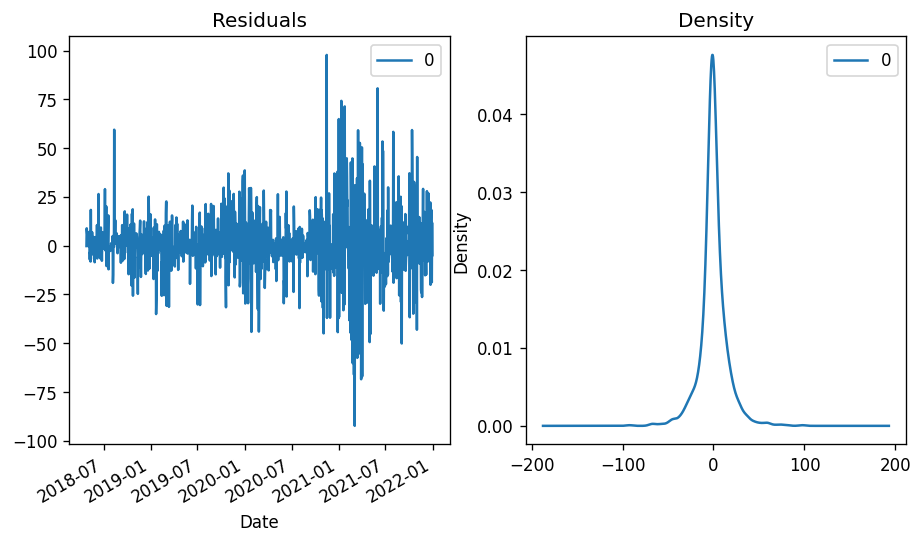

In [290]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<function matplotlib.pyplot.show>

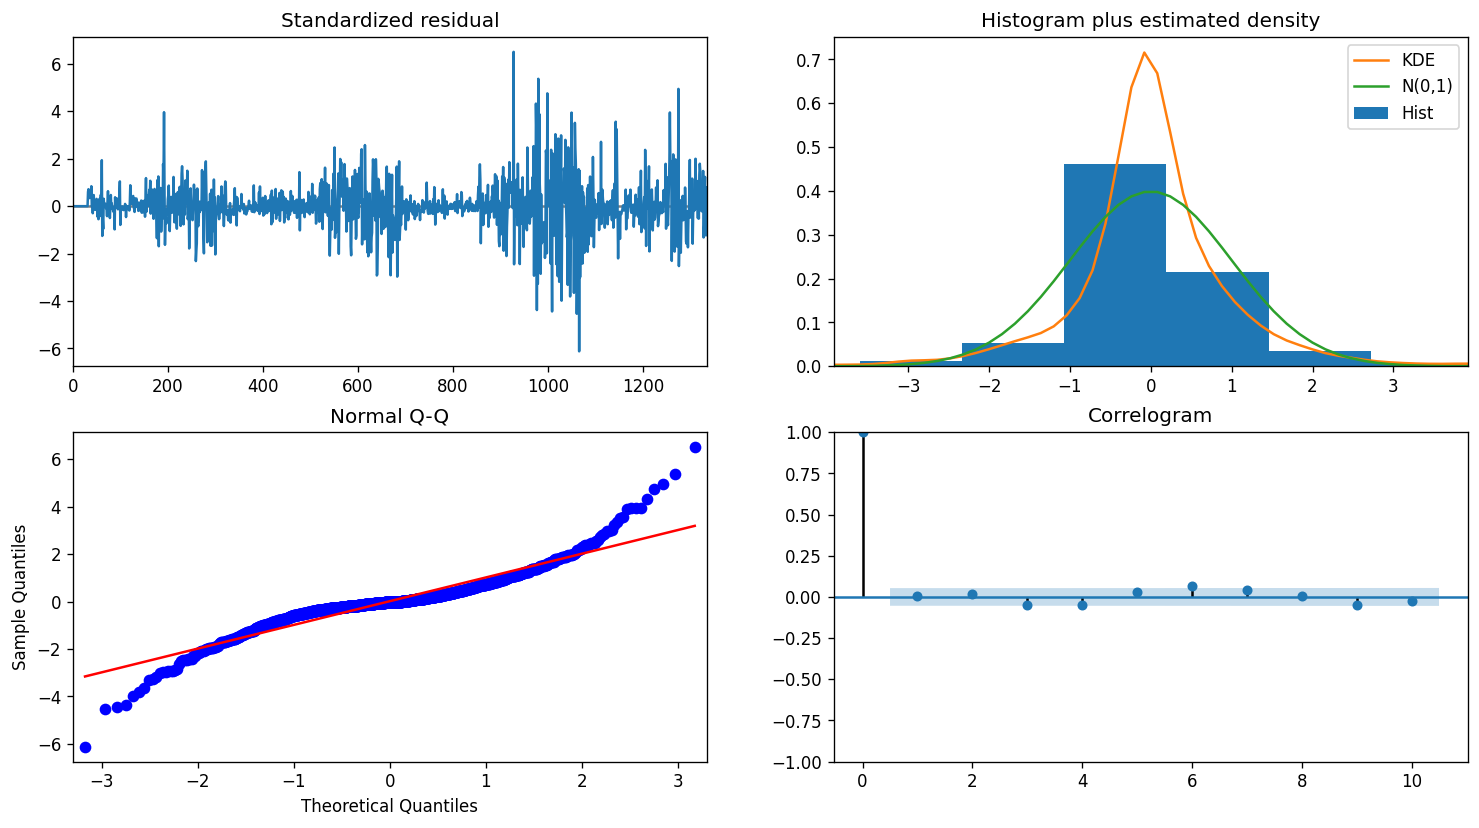

In [291]:
model.plot_diagnostics(figsize=(15,8))
plt.show

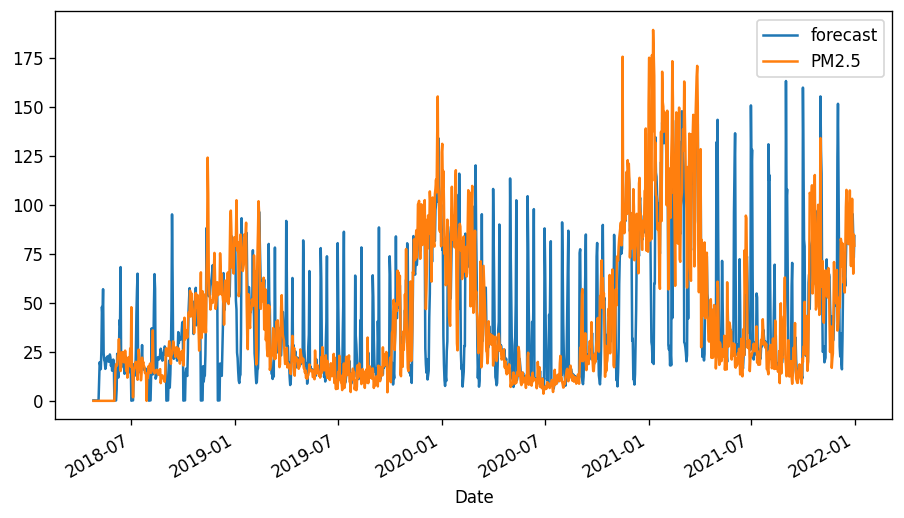

In [292]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()


In [293]:
from statsmodels.tsa.stattools import acf

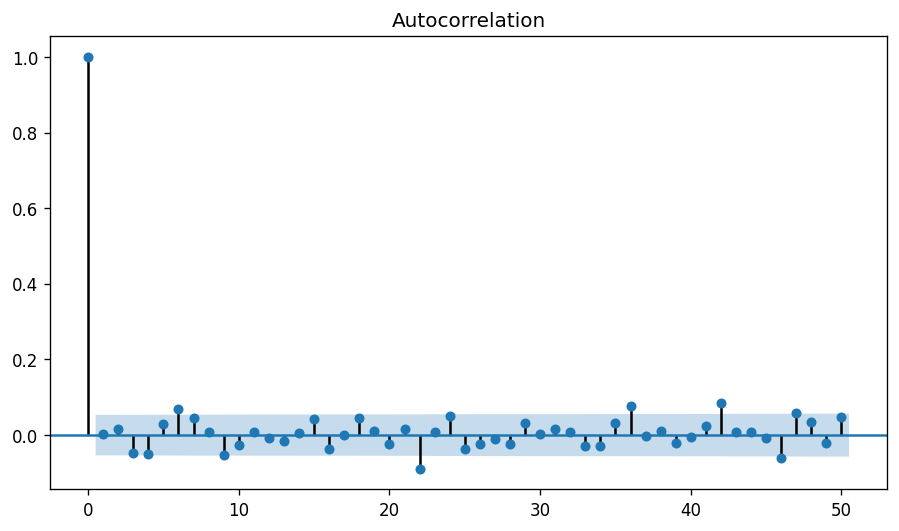

[80.74144602 81.51810677 81.90960245 82.12338522 82.25517229 82.34912702
 82.42562612 82.49407131 82.55880046 82.62181505 82.68403856 82.74589707
 82.80758717 82.86919956 82.9307761  82.9923361  83.05388847]
[ 52.19  56.83  69.56  64.9   61.44  69.34  71.82  75.25  43.92  52.26
  36.6  146.83 130.67 105.79 100.1   65.71  70.14]


In [295]:
# acf plot of residuals
plot_acf(residuals, lags = 50)
plt.show()

y_pred=pd.Series(model_fit.forecast(17)[0], index=test.index) 
y_true=test
print (np.array(y_pred))
print (np.array(y_true))

In [296]:
df=pd.DataFrame()
df['Actual Value']=y_true
df['Predicted Value']=y_pred

df.head()

Actual Value  Predicted Value
Date                                     
2022-01-01         52.19        80.741446
2022-02-01         56.83        81.518107
2022-01-14         69.56        81.909602
2022-01-15         64.90        82.123385
2022-01-16         61.44        82.255172

In [298]:
df.to_csv('ARIMA predicted output pm2.5.csv')

In [300]:
mape = np.mean(np.abs(y_pred - y_true) /np.abs(y_true)) # Mean absolute percentage error -
mae = np.mean(np.abs(y_pred - y_true)) # Mean absolute error
mpe = np.mean((y_pred - y_true)/y_true) # Mean percentage error
rmse = np.mean((y_pred - y_true)**2)**.5 # RMSE
corr = np.corrcoef (y_pred, y_true) [0,1]

# Correlation Coefficient
mins = np.amin(np.hstack([y_pred[:,None], y_true[:,None]]), axis=1)
maxs = np.amax(np.hstack([y_pred[:,None], y_true[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)   # minmax

import pprint
pprint.pprint({'mape':mape,'mae':mae,'mpe':mpe,'rmse':rmse,'corr':corr,'minmax' :minmax})

{'corr': 0.3817679325101458,
 'mae': 25.40023270277621,
 'mape': 0.385450009695004,
 'minmax': 0.27011613437036475,
 'mpe': 0.24534182468316304,
 'rmse': 29.568485962847124}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [159]:
from sklearn.metrics import r2_score

In [301]:
R2=r2_score(y_true,y_pred)
R2

-0.05319905449735751

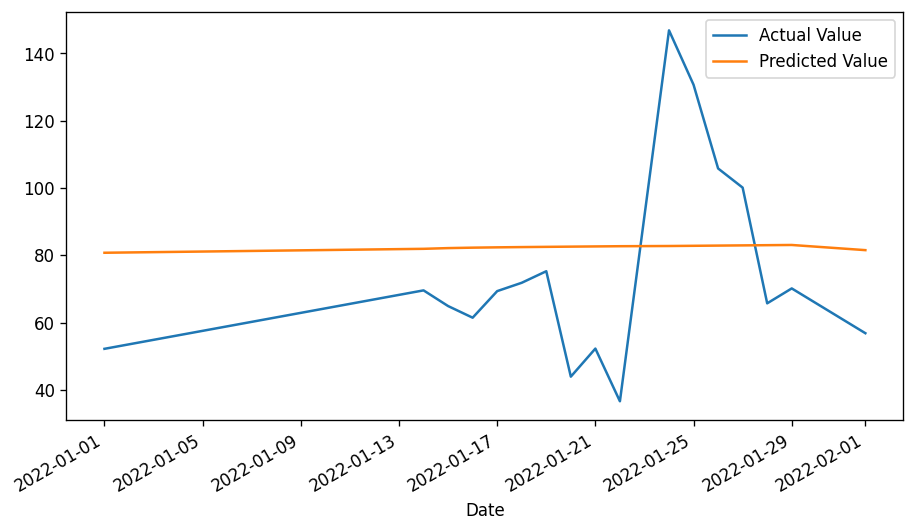

In [302]:
df.plot()

In [157]:
#Dataset.to_csv('/content/drive/MyDrive/MumbaiData.csv')

#PM10

#EDA

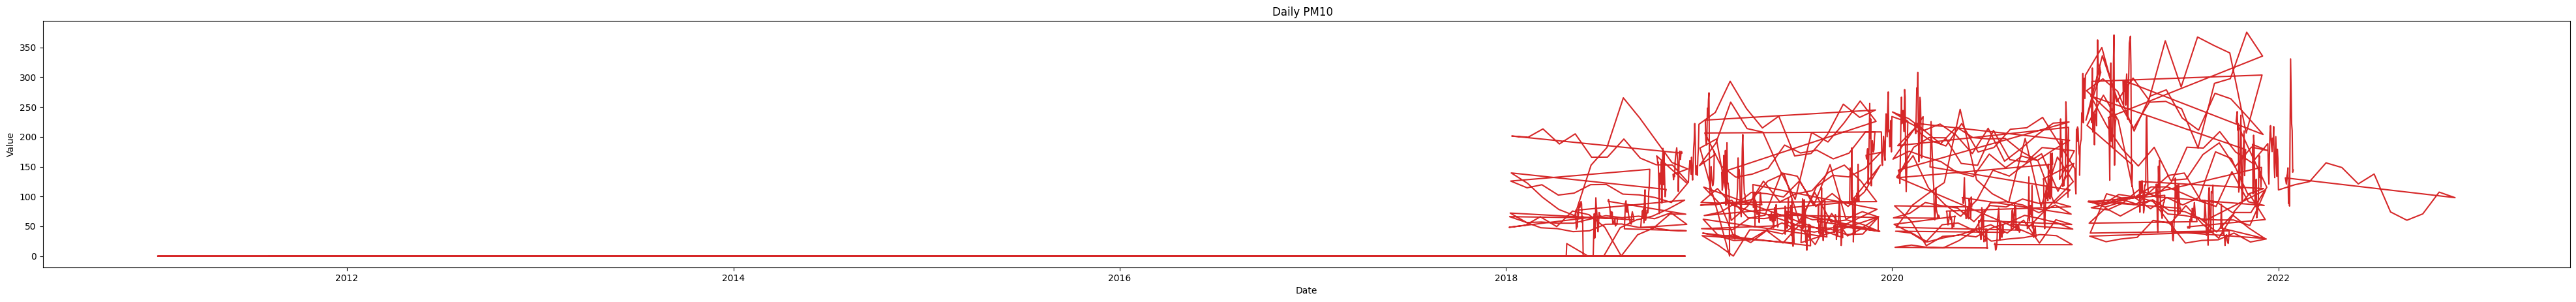

In [303]:
#Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(50,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)

    plt.show()
plot_df(Dataset, x=Dataset.index, y=Dataset['PM10'], title='Daily PM10  ')

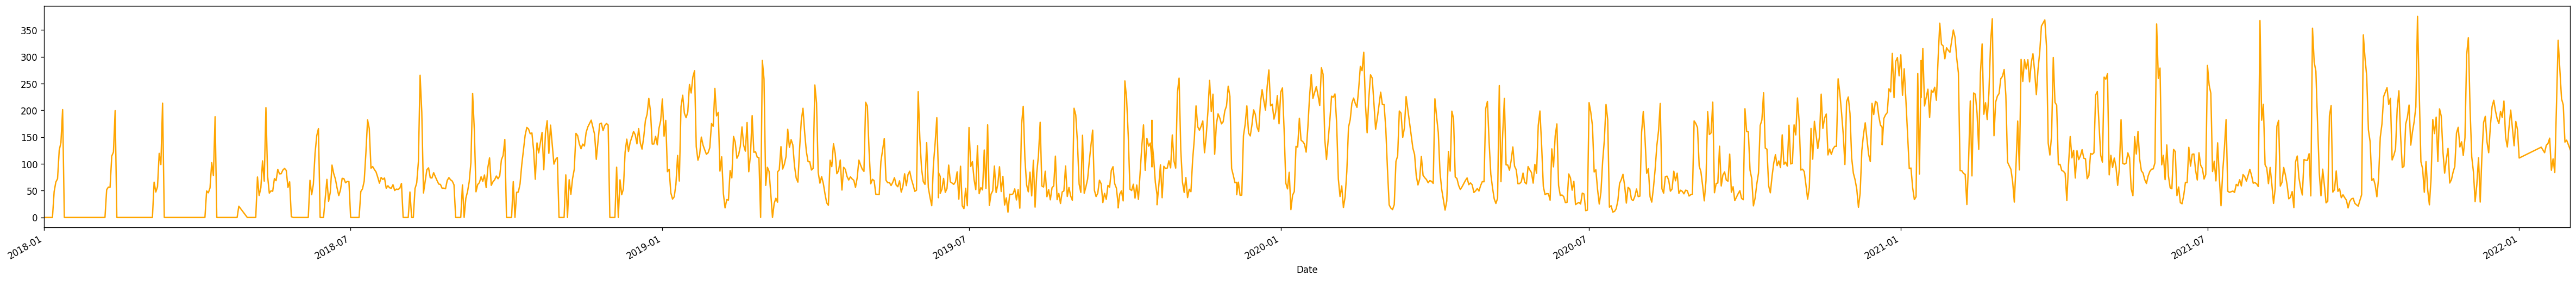

In [304]:
Dataset["PM10"].plot(xlim=['01-01-2018','31-01-2022'],figsize=(50,5),color="orange")

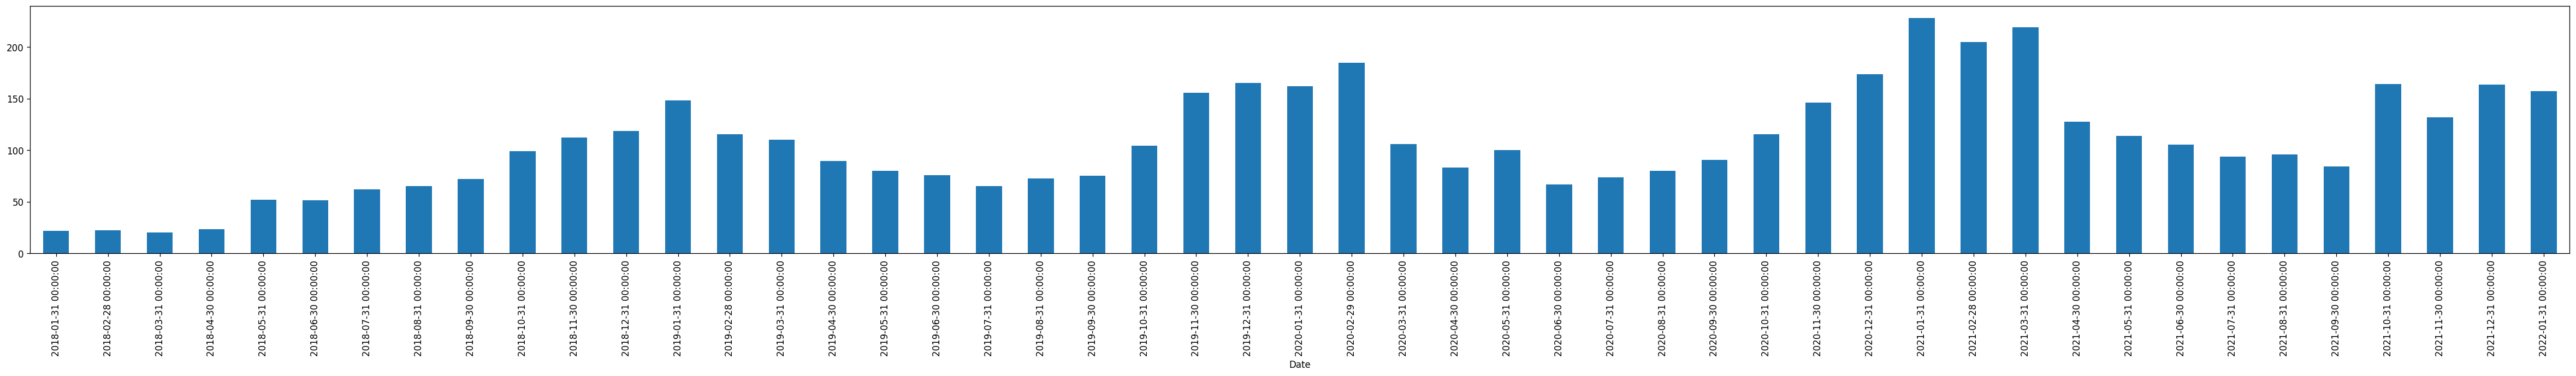

In [305]:
Dataset["PM10"]['01-01-2018':'31-01-2022'].resample(rule='M').mean().plot(kind='bar',figsize=(50,5))

#ACF and PACF

In [306]:
pm10=Dataset.iloc[:,5:6].loc['01-01-2018':'01-01-2022']
pm10.head()

PM10
Date            
2018-01-01   0.0
2018-02-01   0.0
2018-03-01   0.0
2018-04-01   0.0
2018-05-01   0.0

In [307]:
pd.isnull(pm10).sum()

PM10    0
dtype: int64

In [308]:
pm10['PM10:30 days rolling']=pm10['PM10'].rolling(30).mean()
pm10.head()

PM10  PM10:30 days rolling
Date                                  
2018-01-01   0.0                   NaN
2018-02-01   0.0                   NaN
2018-03-01   0.0                   NaN
2018-04-01   0.0                   NaN
2018-05-01   0.0                   NaN

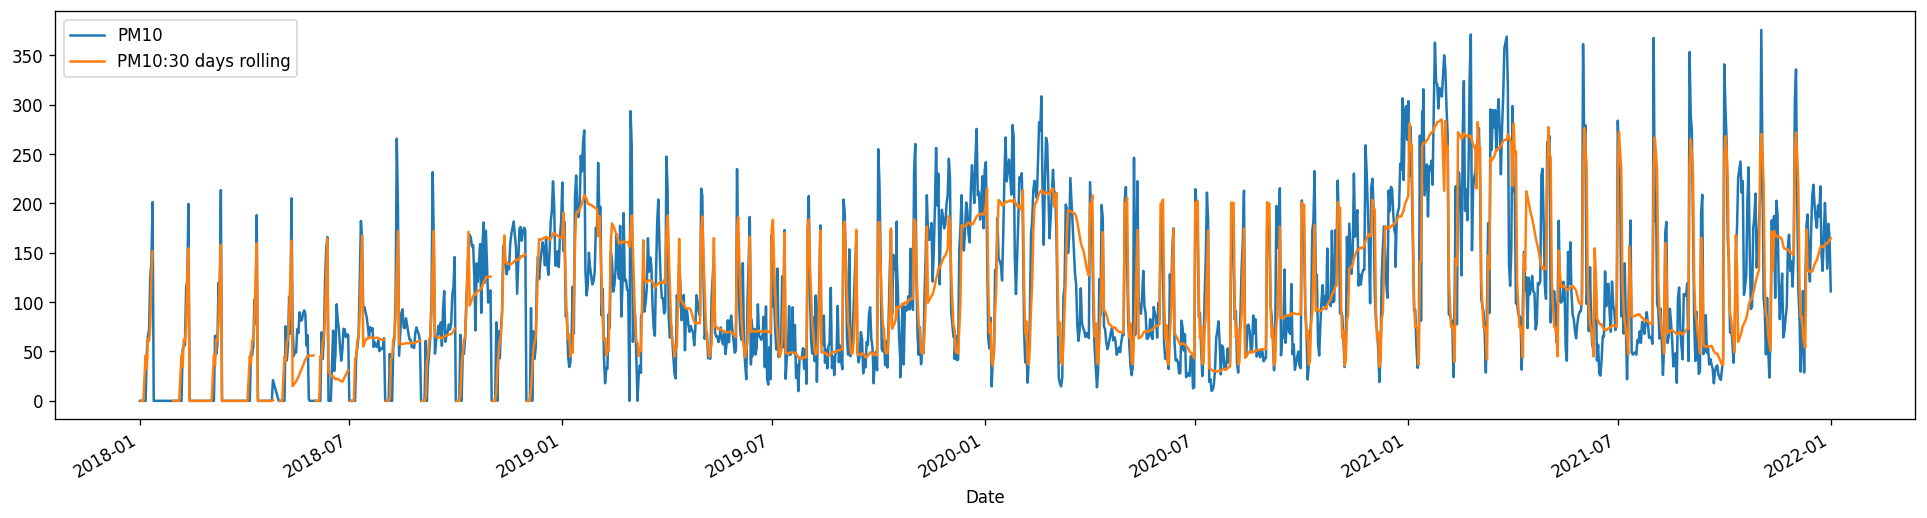

In [309]:
pm10[['PM10','PM10:30 days rolling']].plot(figsize=(20,5))

In [311]:
pm10.reset_index(inplace=True)
pm10.head()

index       Date  PM10  PM10:30 days rolling
0      0 2018-01-01   0.0                   NaN
1      1 2018-02-01   0.0                   NaN
2      2 2018-03-01   0.0                   NaN
3      3 2018-04-01   0.0                   NaN
4      4 2018-05-01   0.0                   NaN

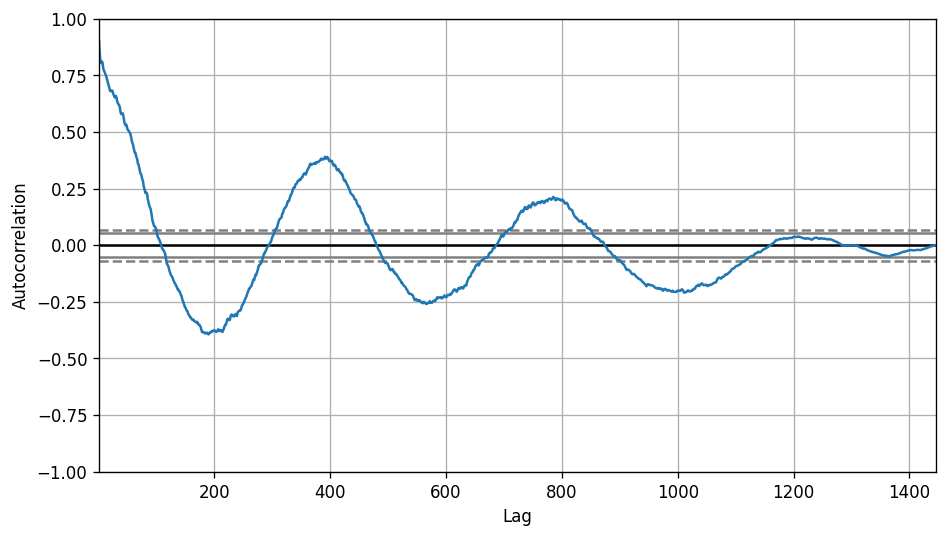

In [312]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(pm10['PM10'].tolist())

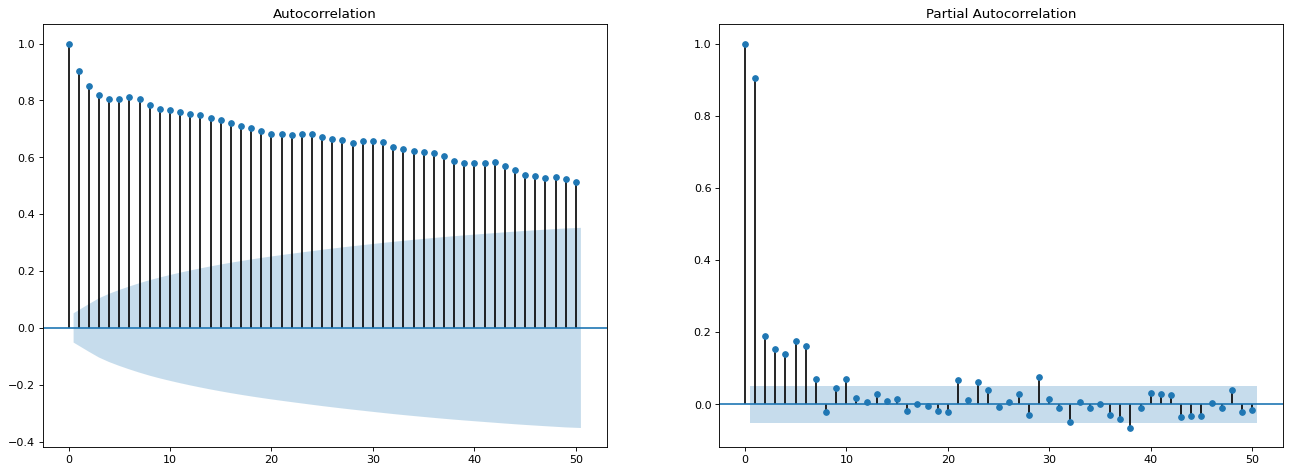

In [313]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
#acf plot of PM10
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pm10['PM10'], lags = 50,ax=axes[0])
#pacf plot PM10
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pm10['PM10'], lags = 50,ax=axes[1])
plt.show()


##Test for stationarity and Causality test

In [314]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(pm10['PM10'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


# KPSS Test
result = kpss(pm10['PM10'], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.035841494243019
p-value: 0.031680134494265565
Critial Values:
   1%, -3.434911997169608
Critial Values:
   5%, -2.863554810504947
Critial Values:
   10%, -2.567842671398422

KPSS Statistic: 1.019536
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



In [315]:
#Granger Causality test 
from statsmodels.tsa.stattools import grangercausalitytests
pm10['Date'] = pm10.Date.dt.month
grangercausalitytests(pm10[['PM10', 'Date']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2000  , p=0.2735  , df_denom=1442, df_num=1
ssr based chi2 test:   chi2=1.2025  , p=0.2728  , df=1
likelihood ratio test: chi2=1.2020  , p=0.2729  , df=1
parameter F test:         F=1.2000  , p=0.2735  , df_denom=1442, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6127  , p=0.5420  , df_denom=1439, df_num=2
ssr based chi2 test:   chi2=1.2297  , p=0.5407  , df=2
likelihood ratio test: chi2=1.2292  , p=0.5409  , df=2
parameter F test:         F=0.6127  , p=0.5420  , df_denom=1439, df_num=2


{1: ({'lrtest': (1.2019892879216059, 0.27292444596212784, 1),
   'params_ftest': (1.1999928321552114, 0.2735060350453976, 1442.0, 1.0),
   'ssr_chi2test': (1.202489349836516, 0.2728247045675805, 1),
   'ssr_ftest': (1.1999928321551945, 0.2735060350453976, 1442.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.2291800015591434, 0.5408626031018304, 2),
   'params_ftest': (0.6127226668413381, 0.5420148285016684, 1439.0, 2.0),
   'ssr_chi2test': (1.229703309129677, 0.5407211028672627, 2),
   'ssr_ftest': (0.612722666841276, 0.5420148285017552, 1439.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

##first order diff

In [316]:
#first order differencing of raw data
pm10['PM10_with_diff_1'] = pm10['PM10'] - pm10['PM10'].shift(1)
pm10

index  Date    PM10  PM10:30 days rolling  PM10_with_diff_1
0         0     1    0.00                   NaN               NaN
1         1     2    0.00                   NaN              0.00
2         2     3    0.00                   NaN              0.00
3         3     4    0.00                   NaN              0.00
4         4     5    0.00                   NaN              0.00
...     ...   ...     ...                   ...               ...
1441   1441    12  166.69            159.155667            -33.73
1442   1442    12  133.82            159.759000            -32.87
1443   1443    12  179.29            160.774000             45.47
1444   1444    12  163.92            163.533333            -15.37
1445   1445     1  110.91            164.646000            -53.01

[1446 rows x 5 columns]

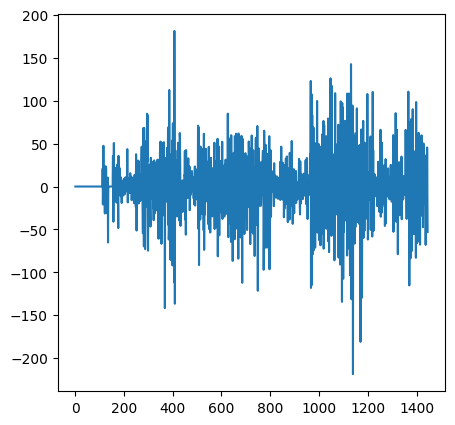

In [318]:
#ploting the time series after first order differning
plt.figure(figsize=(5,5),dpi=100)
plt.plot(pm10.index,pm10['PM10_with_diff_1'])
plt.show()

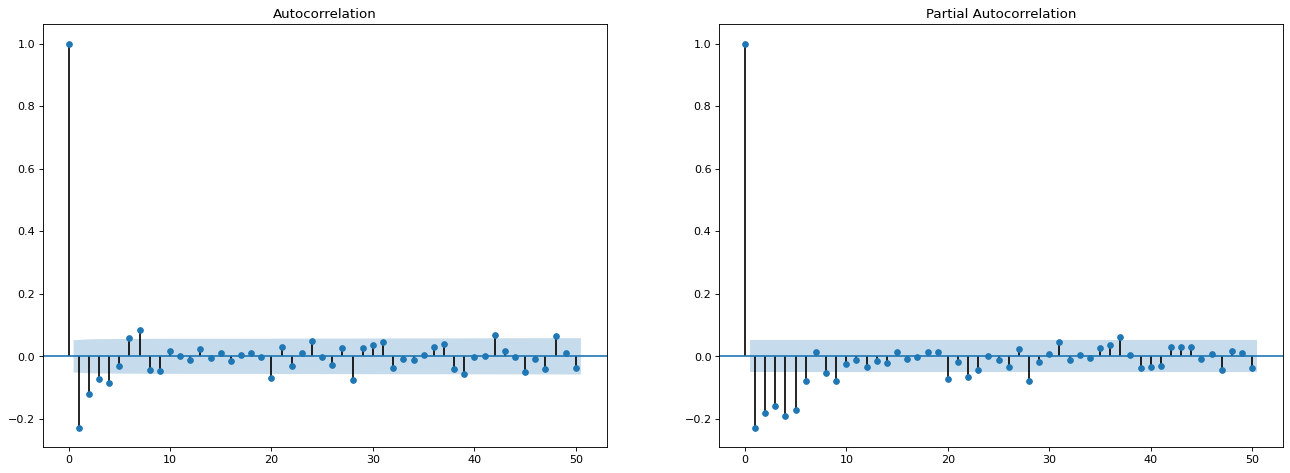

In [319]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
#acf plot of dataframe of diff 1
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pm10['PM10_with_diff_1'][1:], lags = 50,ax=axes[0])
#pacf plot of dataframe of diff 1
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pm10['PM10_with_diff_1'][1:], lags = 50,ax=axes[1])
plt.show()


In [320]:
#DF test on data with diff 1
from statsmodels.tsa.stattools import adfuller
result = adfuller(pm10['PM10_with_diff_1'][1:])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value ADF: %f' % result[1])

# KPSS test
from statsmodels.tsa.stattools import kpss
result1 = kpss(pm10['PM10_with_diff_1'][1:])
print(result1)
print('kpss Statistic: %f' % result1[0])
print('p-value kpss: %f' % result1[1])

(-18.092690423303548, 2.567333202852932e-30, 8, 1436, {'1%': -3.434911997169608, '5%': -2.863554810504947, '10%': -2.567842671398422}, 13839.20307924008)
ADF Statistic: -18.092690
p-value ADF: 0.000000
(0.03644319553634431, 0.1, 24, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
kpss Statistic: 0.036443
p-value kpss: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



using first order differcing and by the test of kpss we conclude that the PM10 data is stationary

##ARIMA

In [385]:
pm10['PM10'].count()

1446

In [393]:
# Create Training and Test
train_pm10 = Dataset['PM10']['24-04-2018':'31-12-2021']
test_pm10 = Dataset['PM10']['01-01-2022':'02-02-2022']
test_pm10.count()

17

In [394]:
 model_pm10=auto_arima(train_pm10,start_p=1,start_q=1,max_p=5,max_q=5,seasonal=True,D=1,trace=True,error_action='ignore',stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13114.646, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13355.414, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13283.031, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13226.517, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13353.430, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13115.106, Time=0.76 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13115.383, Time=0.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13132.538, Time=0.66 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13239.528, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13118.058, Time=1.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13112.942, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=13224.577, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=13281.057, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=13113.385, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0

In [395]:
model_pm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1338
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6553.471
Date:                Wed, 18 May 2022   AIC                          13112.942
Time:                        18:12:13   BIC                          13128.537
Sample:                             0   HQIC                         13118.785
                               - 1338                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4620      0.026     17.693      0.000       0.411       0.513
ma.L1         -0.8594      0.016    -52.123      0.000      -0.892      -0.827
sigma2      1058.8560     26.997     39.221      0.000    1005.942    1111.770
===================================================================================
Ljung-Box (Q):                       63.14   Jarque-Bera (JB):               430.92
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##ARIMA(4,1,1)

In [396]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
# 1,1,2 ARIMA Model
model2=ARIMA(train_pm10, order=(1,1,1))
model_fit = model2.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                 D.PM10   No. Observations:                 1337
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6553.323
Method:                       css-mle   S.D. of innovations             32.536
Date:                Wed, 18 May 2022   AIC                          13114.646
Time:                        18:12:28   BIC                          13135.439
Sample:                             1   HQIC                         13122.437
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1270      0.233      0.546      0.585      -0.329       0.583
ar.L1.D.PM10     0.4624      0.036     12.871      0.000       0.392       0.533
ma.L1.D.PM10    -0.8600      0.020    -42.26

In [398]:
arima(1,1,1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.PM2.5   No. Observations:                 1336
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5518.500
Method:                       css-mle   S.D. of innovations             15.051
Date:                Wed, 18 May 2022   AIC                          11045.000
Time:                        18:12:40   BIC                          11065.789
Sample:                             1   HQIC                         11052.789
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0615      0.110      0.559      0.576      -0.154       0.277
ar.L1.D.PM2.5     0.4614      0.037     12.596      0.000       0.390       0.533
ma.L1.D.PM2.5    -0.8566      0.021    -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:119: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



[[ 1.         -0.00111886  0.00118707]
 [-0.00111886  1.         -0.74873019]
 [ 0.00118707 -0.74873019  1.        ]]


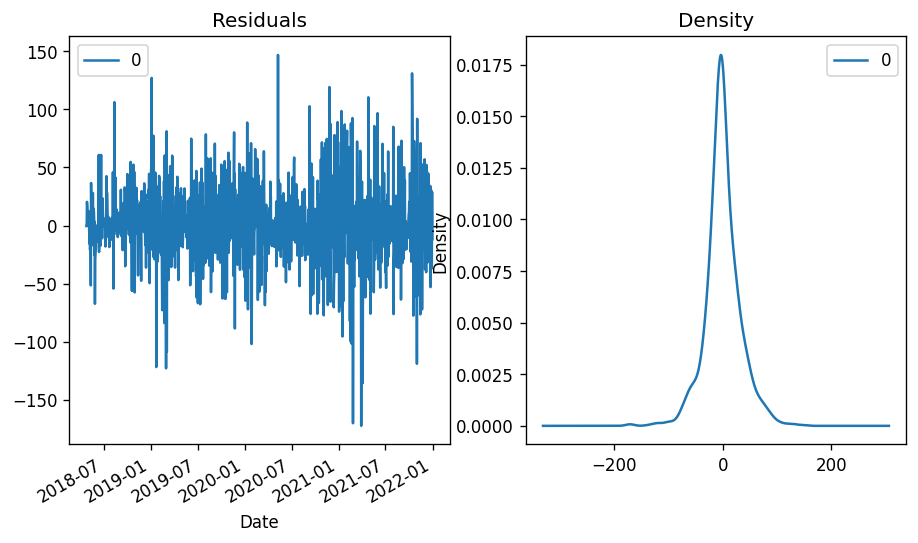

In [399]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<function matplotlib.pyplot.show>

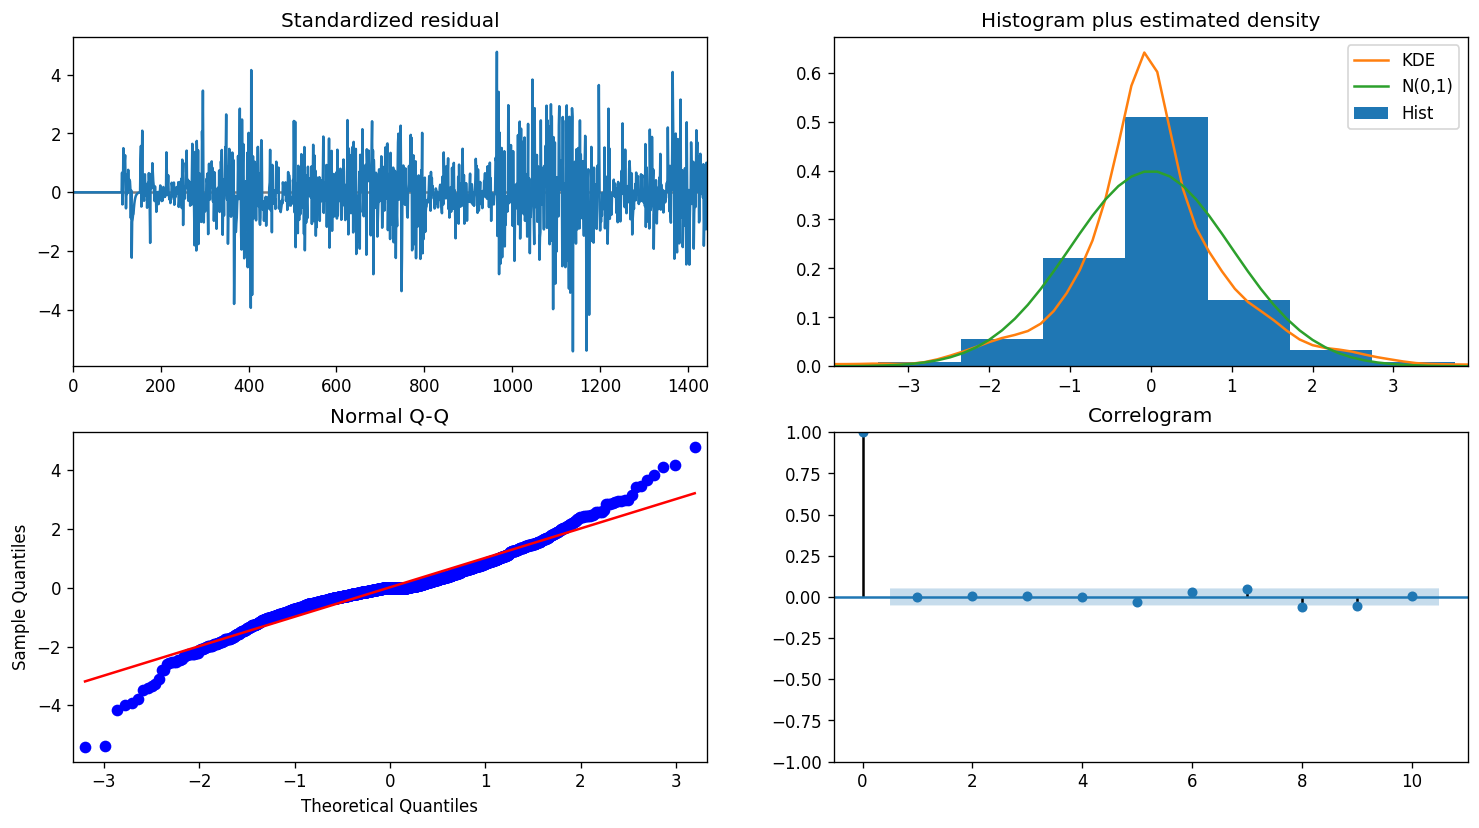

In [340]:
model_pm10.plot_diagnostics(figsize=(15,8))
plt.show

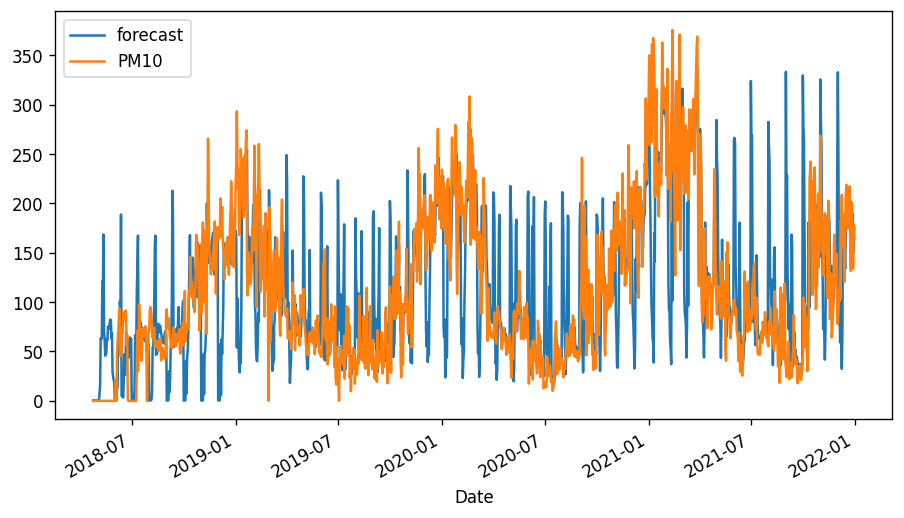

In [400]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

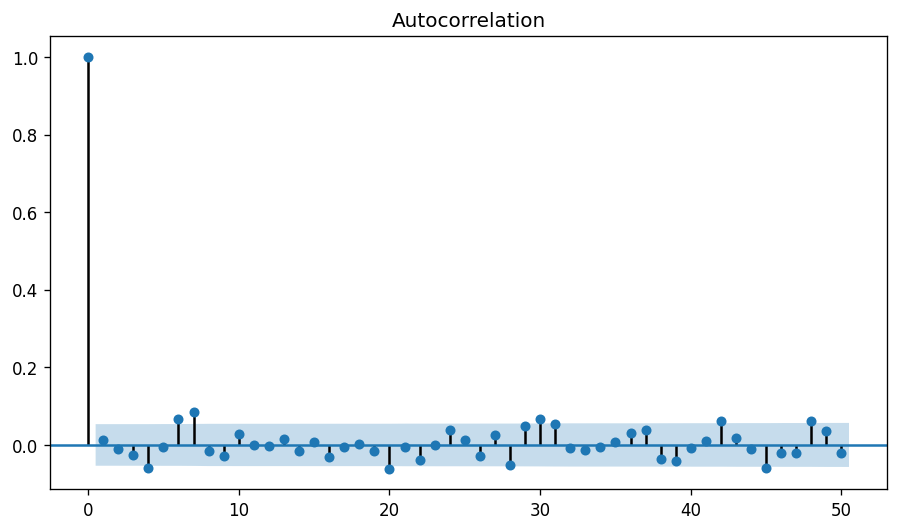

[166.93035526 168.39064755 169.13416205 169.54622523 169.80501918
 169.9929386  170.14808434 170.28807491 170.42105745 170.55079935
 170.67904272 170.80659314 170.93382313 171.06090495 171.18791824
 171.31489985 171.44186681]
[110.91 119.7  131.19 126.04 120.84 134.67 138.02 148.    88.14 109.29
  83.85 330.85 276.39 221.62 210.26 140.64 144.3 ]


In [401]:
# acf plot of residuals
plot_acf(residuals, lags = 50)
plt.show()

y_pred=pd.Series(model_fit.forecast(17)[0], index=test_pm10.index) 
y_true=test_pm10
print (np.array(y_pred))
print (np.array(y_true))

In [442]:
df=pd.DataFrame()
df['Actual Value']=y_true
df['Predicted Value']=y_pred

df.head()

Actual Value  Predicted Value
Date                                     
2022-01-01        110.91       166.930355
2022-02-01        119.70       168.390648
2022-01-14        131.19       169.134162
2022-01-15        126.04       169.546225
2022-01-16        120.84       169.805019

In [443]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [444]:
mape = np.mean(np.abs(y_pred - y_true) /np.abs(y_true)) # Mean absolute percentage error -
mae = np.mean(np.abs(y_pred - y_true)) # Mean absolute error
mpe = np.mean((y_pred - y_true)/y_true) # Mean percentage error
rmse = np.mean((y_pred - y_true)**2)**.5 # RMSE
corr = np.corrcoef (y_pred, y_true) [0,1]

# Correlation Coefficient
mins = np.amin(np.hstack([y_pred[:,None], y_true[:,None]]), axis=1)
maxs = np.amax(np.hstack([y_pred[:,None], y_true[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)   # minmax

import pprint
pprint.pprint({'mape':mape,'mae':mae,'mpe':mpe,'rmse':rmse,'corr':corr,'minmax' :minmax})

{'corr': 0.3897933049314297,
 'mae': 56.9519961078897,
 'mape': 0.40071682585153195,
 'minmax': 0.2875822104581045,
 'mpe': 0.25021751721580643,
 'rmse': 66.23202691658311}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



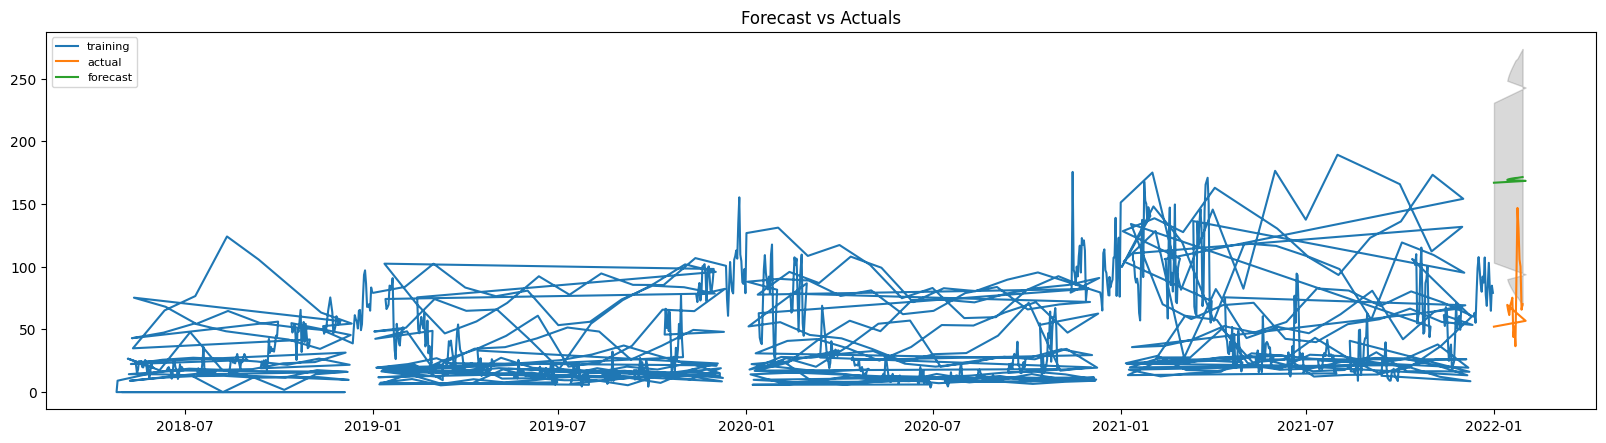

In [445]:
# Build Model
# model = ARIMA(train_pm10, order=(3,2,1))  
model = ARIMA(train_pm10, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(17, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_pm10.index)
lower_series = pd.Series(conf[:, 0], index=test_pm10.index)
upper_series = pd.Series(conf[:, 1], index=test_pm10.index)

# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

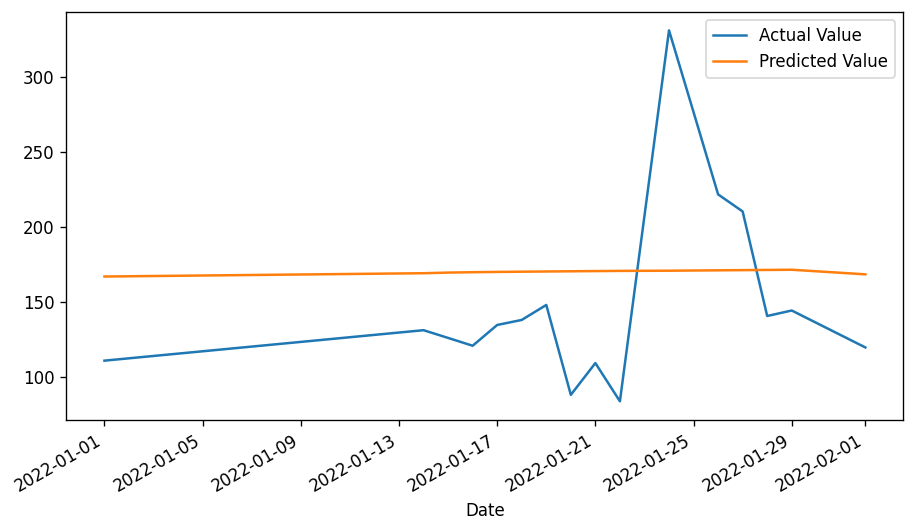

In [421]:
df.plot()

In [446]:
df.to_csv('ARIMA predicted output PM10.csv')

##ARIMA(1,1,1)

In [369]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
# 1,1,2 ARIMA Model
model3=ARIMA(train_pm10, order=(1,1,1))
model_fit = model3.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                 D.PM10   No. Observations:                 1444
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7024.513
Method:                       css-mle   S.D. of innovations             31.359
Date:                Wed, 18 May 2022   AIC                          14057.027
Time:                        18:01:30   BIC                          14078.127
Sample:                             1   HQIC                         14064.902
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1176      0.216      0.545      0.586      -0.306       0.541
ar.L1.D.PM10     0.4671      0.035     13.475      0.000       0.399       0.535
ma.L1.D.PM10    -0.8611      0.020    -43.75

In [372]:
arima(1,1,1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.PM2.5   No. Observations:                 1336
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5518.500
Method:                       css-mle   S.D. of innovations             15.051
Date:                Wed, 18 May 2022   AIC                          11045.000
Time:                        18:02:57   BIC                          11065.789
Sample:                             1   HQIC                         11052.789
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0615      0.110      0.559      0.576      -0.154       0.277
ar.L1.D.PM2.5     0.4614      0.037     12.596      0.000       0.390       0.533
ma.L1.D.PM2.5    -0.8566      0.021    -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:119: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



[[ 1.         -0.00111886  0.00118707]
 [-0.00111886  1.         -0.74873019]
 [ 0.00118707 -0.74873019  1.        ]]


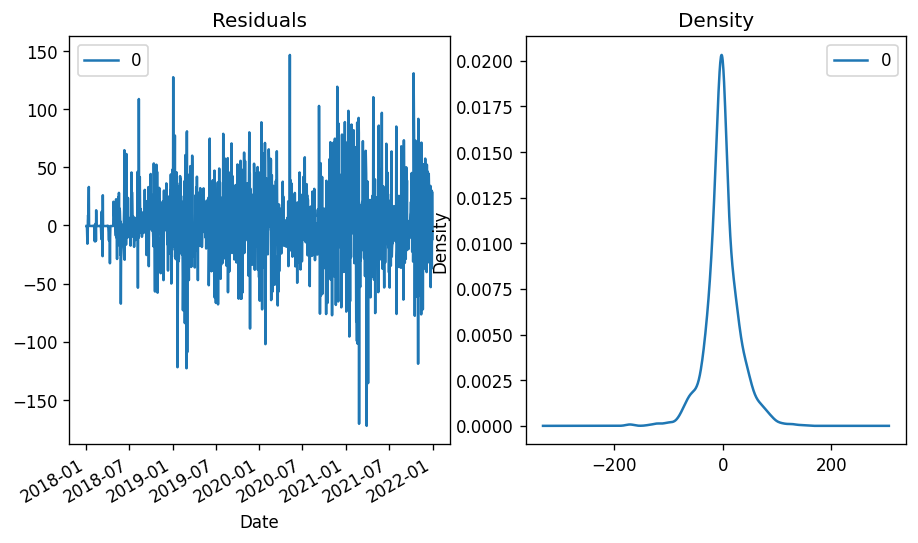

In [380]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

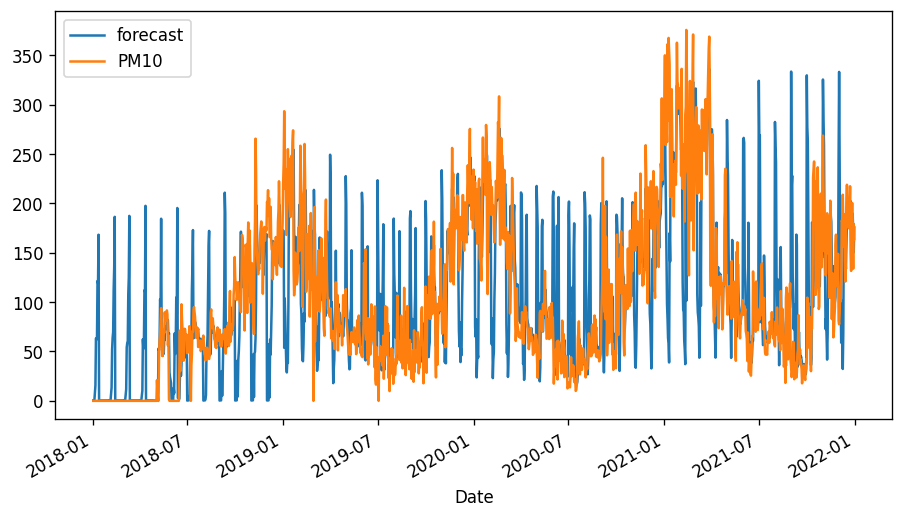

In [375]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

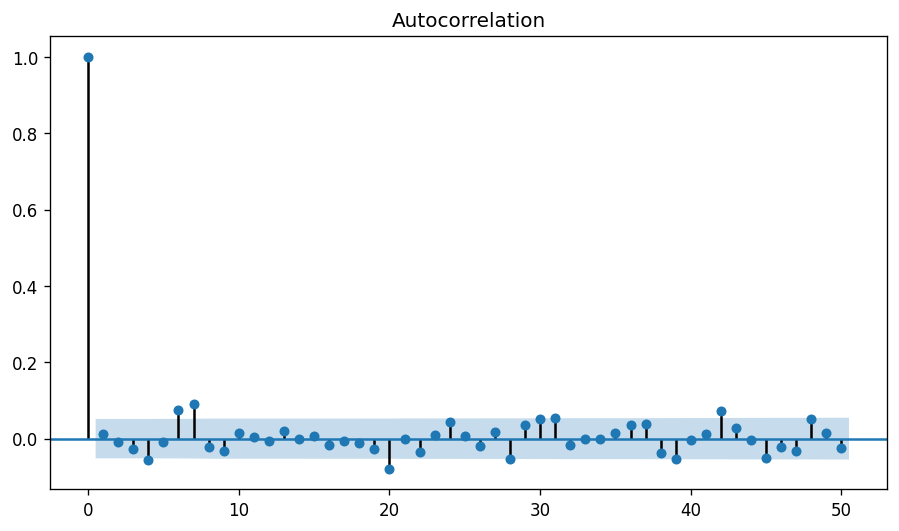

[166.86935576 168.30973995 169.04525294 169.45150629 169.7039558
 169.88456042 170.03160484 170.1629726  170.28701748 170.40764169
 170.52666804 170.644948   170.7628793  170.88064773 170.99834009
 171.11599691]
[ 52.19  56.83  69.56  64.9   61.44  69.34  71.82  75.25  43.92  52.26
  36.6  146.83 130.67 105.79 100.1   65.71  70.14]


In [377]:

# acf plot of residuals
plot_acf(residuals, lags = 50)
plt.show()

y_pred=pd.Series(model_fit.forecast(16)[0], index=test_pm10.index) 
y_true=test
print (np.array(y_pred))
print (np.array(y_true))

In [378]:
df=pd.DataFrame()
df['Actual Value']=y_true
df['Predicted Value']=y_pred
df.head()

Actual Value  Predicted Value
Date                                     
2022-01-01         52.19       166.869356
2022-02-01         56.83              NaN
2022-01-14         69.56       168.309740
2022-01-15         64.90       169.045253
2022-01-16         61.44       169.451506

In [381]:
mape = np.mean(np.abs(y_pred - y_true) /np.abs(y_true)) # Mean absolute percentage error -
mae = np.mean(np.abs(y_pred - y_true)) # Mean absolute error
mpe = np.mean((y_pred - y_true)/y_true) # Mean percentage error
rmse = np.mean((y_pred - y_true)**2)**.5 # RMSE
corr = np.corrcoef (y_pred, y_true) [0,1]

# Correlation Coefficient
mins = np.amin(np.hstack([y_pred[:,None], y_true[:,None]]), axis=1)
maxs = np.amax(np.hstack([y_pred[:,None], y_true[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)   # minmax

import pprint
pprint.pprint({'mape':mape,'mae':mae,'mpe':mpe,'rmse':rmse,'corr':corr,'minmax' :minmax})

ValueError: ignored

In [382]:
# Build Model
# model = ARIMA(train_pm10, order=(3,2,1))  
model = ARIMA(train_pm10, order=(5, 1, 5))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(16, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ValueError: ignored

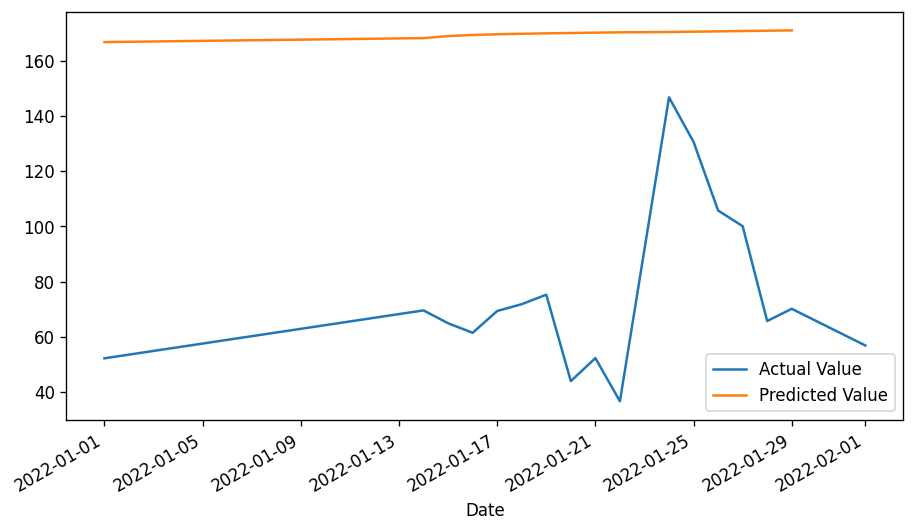

In [383]:
df.plot()

#NO

##EDA

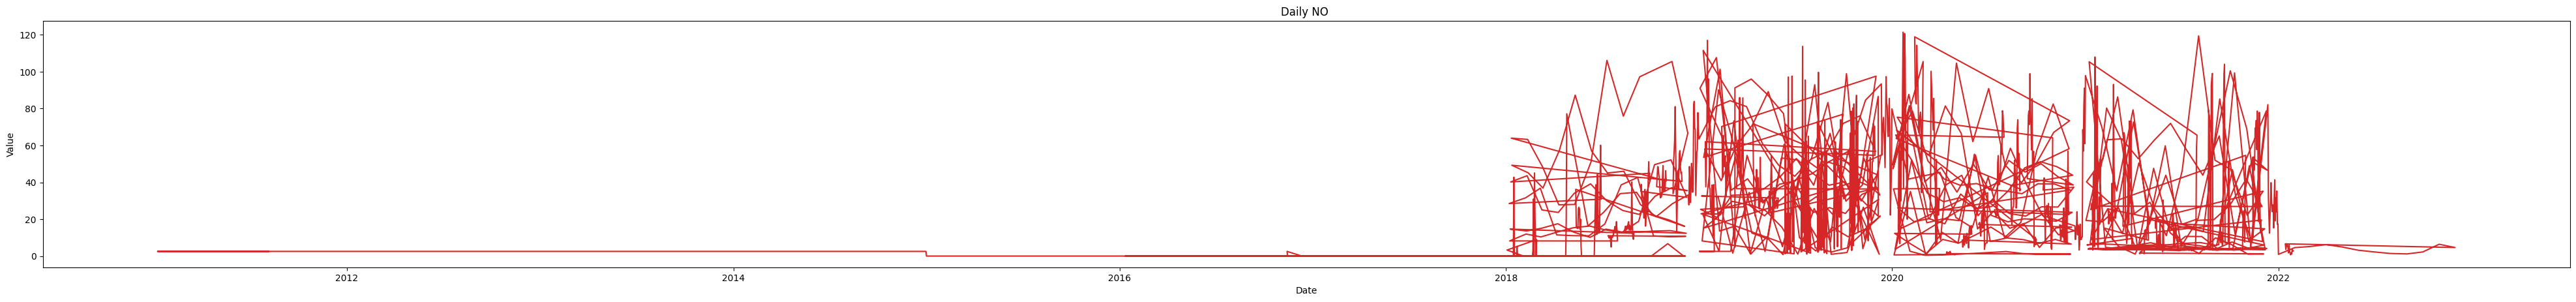

In [447]:
#Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(50,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)

    plt.show()
plot_df(Dataset, x=Dataset.index, y=Dataset['NO'], title='Daily NO ')

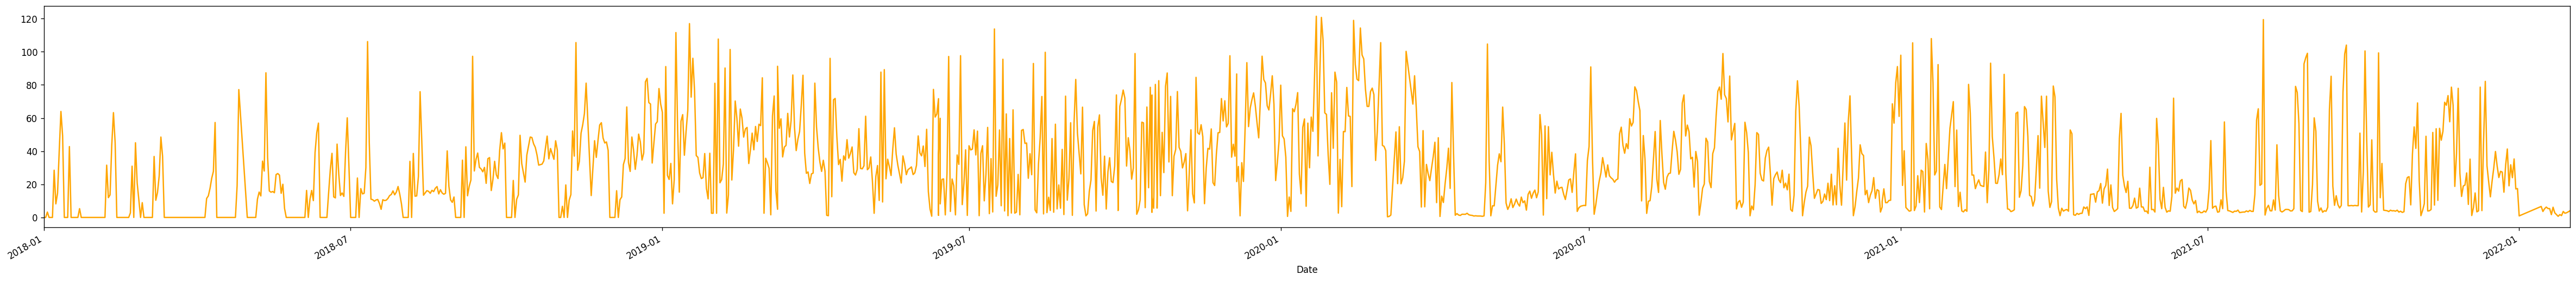

In [448]:
Dataset["NO"].plot(xlim=['01-01-2018','31-01-2022'],figsize=(50,5),color="orange")

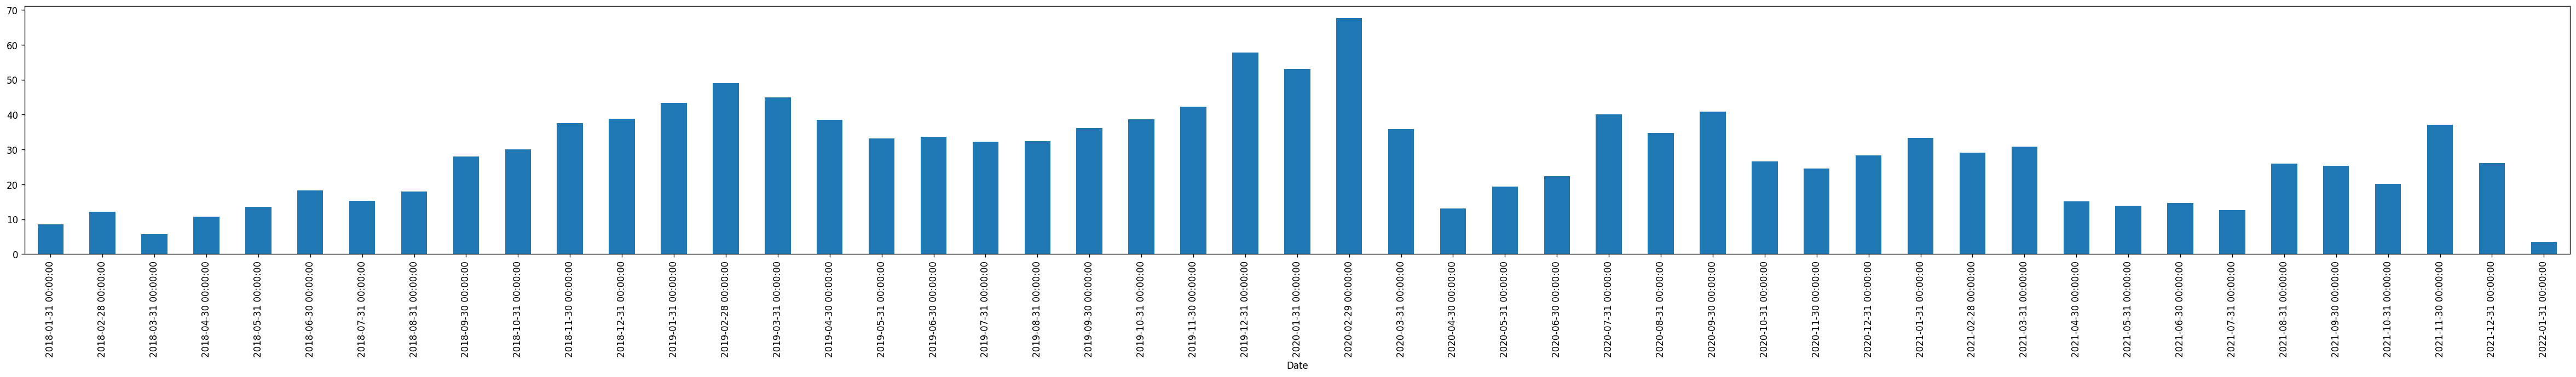

In [449]:
Dataset["NO"]['01-01-2018':'31-01-2022'].resample(rule='M').mean().plot(kind='bar',figsize=(50,5))

##ACF and PACF

In [463]:
no=Dataset.iloc[:,6:7].loc['01-01-2018':'01-01-2022']
no.head()

NO
Date           
2018-01-01  0.0
2018-02-01  0.0
2018-03-01  0.0
2018-04-01  0.0
2018-05-01  0.0

In [464]:
no.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1446 entries, 2018-01-01 to 2022-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO      1446 non-null   float64
dtypes: float64(1)
memory usage: 22.6 KB


In [465]:
no['NO:30 days rolling']=no['NO'].rolling(30).mean()
no.head()

NO  NO:30 days rolling
Date                               
2018-01-01  0.0                 NaN
2018-02-01  0.0                 NaN
2018-03-01  0.0                 NaN
2018-04-01  0.0                 NaN
2018-05-01  0.0                 NaN

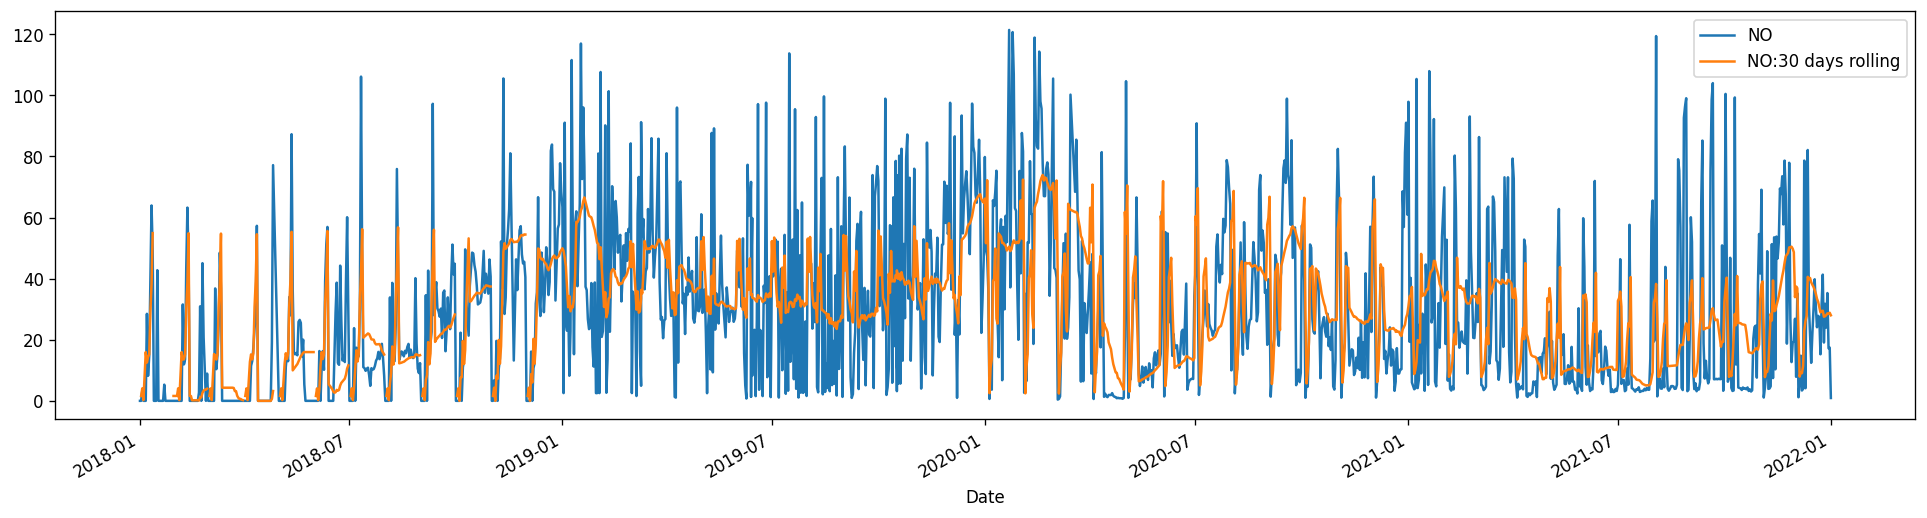

In [466]:
no[['NO','NO:30 days rolling']].plot(figsize=(20,5))

In [467]:
no.reset_index(inplace=True)
no.head()

Date   NO  NO:30 days rolling
0 2018-01-01  0.0                 NaN
1 2018-02-01  0.0                 NaN
2 2018-03-01  0.0                 NaN
3 2018-04-01  0.0                 NaN
4 2018-05-01  0.0                 NaN

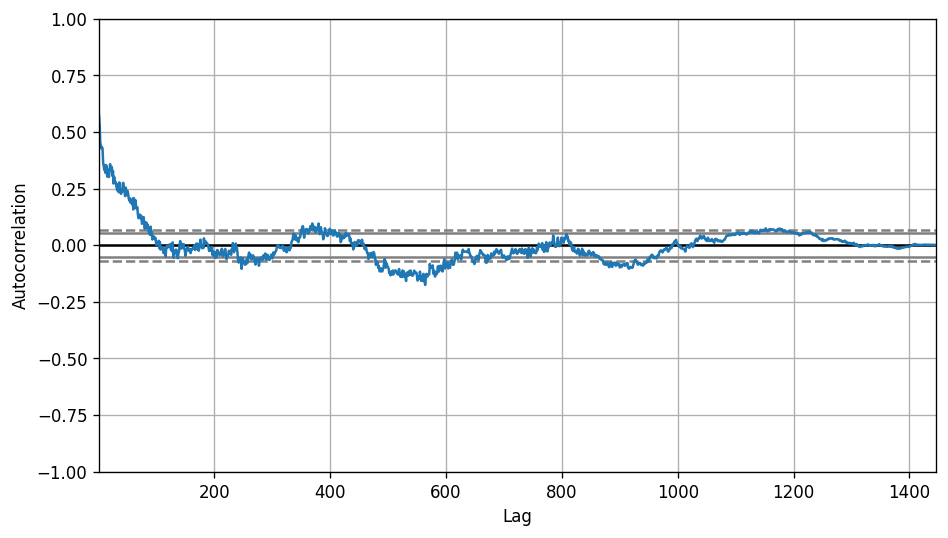

In [455]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(no['NO'].tolist())

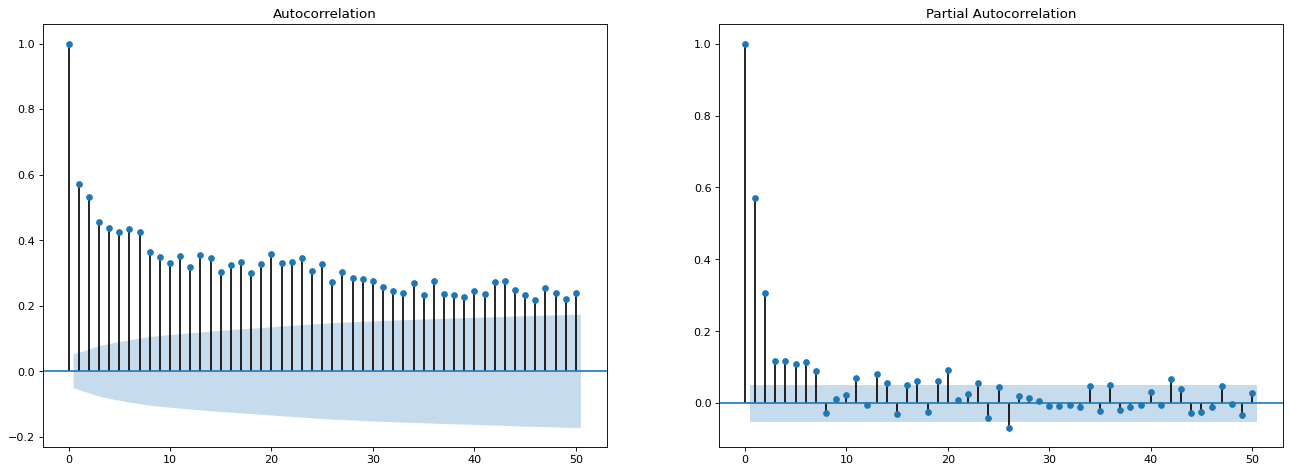

In [468]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
#acf plot of NO
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(no['NO'], lags = 50,ax=axes[0])
#pacf plot NO
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(no['NO'], lags = 50,ax=axes[1])
plt.show()


##Test for stationarity and causality test

In [457]:

from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(no['NO'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


# KPSS Test
result = kpss(no['NO'], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.3870109897090597
p-value: 0.011409716540077388
Critial Values:
   1%, -3.4349602407782758
Critial Values:
   5%, -2.8635761009296763
Critial Values:
   10%, -2.5678540089914974

KPSS Statistic: 0.490692
p-value: 0.043763
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [469]:
#Granger Causality test 
from statsmodels.tsa.stattools import grangercausalitytests
no['Date'] = no.Date.dt.month
grangercausalitytests(no[['NO', 'Date']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2354  , p=0.0723  , df_denom=1442, df_num=1
ssr based chi2 test:   chi2=3.2421  , p=0.0718  , df=1
likelihood ratio test: chi2=3.2385  , p=0.0719  , df=1
parameter F test:         F=3.2354  , p=0.0723  , df_denom=1442, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1631  , p=0.1153  , df_denom=1439, df_num=2
ssr based chi2 test:   chi2=4.3413  , p=0.1141  , df=2
likelihood ratio test: chi2=4.3347  , p=0.1145  , df=2
parameter F test:         F=2.1631  , p=0.1153  , df_denom=1439, df_num=2


{1: ({'lrtest': (3.2385136473931198, 0.07192586314671631, 1),
   'params_ftest': (3.2354143178781456, 0.07227111956347365, 1442.0, 1.0),
   'ssr_chi2test': (3.2421454156269087, 0.07176660373834703, 1),
   'ssr_ftest': (3.2354143178782024, 0.07227111956347365, 1442.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (4.334745984724577, 0.1144779567072619, 2),
   'params_ftest': (2.163113340596203, 0.11534031748078383, 1439.0, 2.0),
   'ssr_chi2test': (4.341258740543212, 0.11410577952159985, 2),
   'ssr_ftest': (2.16311334059615, 0.11534031748078383, 1439.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

##first order diff

In [470]:
#first order differencing of raw data
no['NO_with_diff_1'] = no['NO'] - no['NO'].shift(1)
no

Date     NO  NO:30 days rolling  NO_with_diff_1
0        1   0.00                 NaN             NaN
1        2   0.00                 NaN            0.00
2        3   0.00                 NaN            0.00
3        4   0.00                 NaN            0.00
4        5   0.00                 NaN            0.00
...    ...    ...                 ...             ...
1441    12  23.99           28.082667           -7.79
1442    12  35.29           28.626000           11.30
1443    12  17.21           28.548000          -18.08
1444    12  17.43           28.830000            0.22
1445     1   0.93           28.007667          -16.50

[1446 rows x 4 columns]

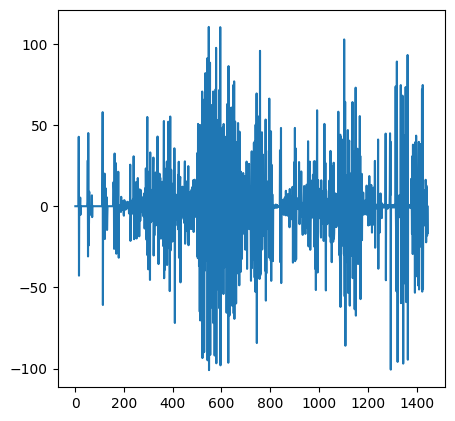

In [471]:
#ploting the time series after first order differning
plt.figure(figsize=(5,5),dpi=100)
plt.plot(no.index,no['NO_with_diff_1'])
plt.show()

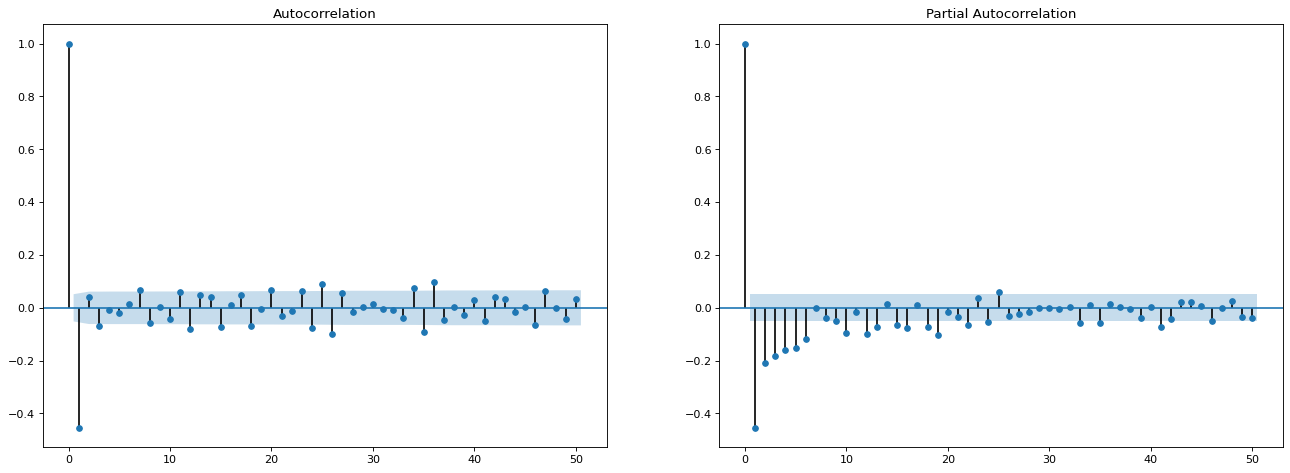

In [472]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
#acf plot of dataframe of diff 1
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(no['NO_with_diff_1'][1:], lags = 50,ax=axes[0])
#pacf plot of dataframe of diff 1
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(no['NO_with_diff_1'][1:], lags = 50,ax=axes[1])
plt.show()


In [473]:
#DF test on data with diff 1
from statsmodels.tsa.stattools import adfuller
result = adfuller(no['NO_with_diff_1'][1:])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value ADF: %f' % result[1])

# KPSS test
from statsmodels.tsa.stattools import kpss
result1 = kpss(no['NO_with_diff_1'][1:])
print(result1)
print('kpss Statistic: %f' % result1[0])
print('p-value kpss: %f' % result1[1])

(-10.823290912371975, 1.782936180424269e-19, 24, 1420, {'1%': -3.4349634933241084, '5%': -2.8635775363009244, '10%': -2.5678547733584605}, 12586.850635885374)
ADF Statistic: -10.823291
p-value ADF: 0.000000
(0.02802802682832243, 0.1, 24, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
kpss Statistic: 0.028028
p-value kpss: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



##ARIMA

In [474]:
no['NO'].count()

1446

In [476]:
# Create Training and Test
train_no = Dataset['NO']['24-04-2018':'31-12-2021']
test_no = Dataset['NO']['01-01-2022':'02-02-2022']
test_no.count()

17

In [477]:
 model_no=auto_arima(train_no,start_p=1,start_q=1,max_p=5,max_q=5,seasonal=True,D=2,trace=True,error_action='ignore',stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11959.789, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12466.713, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12158.055, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11980.148, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12464.714, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11938.103, Time=0.84 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12100.096, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11940.021, Time=1.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11939.973, Time=1.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11939.423, Time=1.44 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=12057.480, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11939.927, Time=1.97 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=11936.191, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11957.833, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0

In [479]:
model_no.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1338
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -5964.096
Date:                Wed, 18 May 2022   AIC                          11936.191
Time:                        19:21:21   BIC                          11956.984
Sample:                             0   HQIC                         11943.982
                               - 1338                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2375      0.025      9.504      0.000       0.189       0.286
ar.L2          0.1537      0.025      6.240      0.000       0.105       0.202
ma.L1         -0.9294      0.015    -63.345      0.000      -0.958      -0.901
sigma2       438.2416     11.828     37.051      0.000     415.059     461.424
===================================================================================
Ljung-Box (Q):                       82.60   Jarque-Bera (JB):               511.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.47   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##ARIMA(2,1,1)

In [480]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
# 1,1,2 ARIMA Model
model4=ARIMA(train_no, order=(2,1,1))
model_fit = model4.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                   D.NO   No. Observations:                 1337
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5964.051
Method:                       css-mle   S.D. of innovations             20.934
Date:                Wed, 18 May 2022   AIC                          11938.103
Time:                        19:21:29   BIC                          11964.094
Sample:                             1   HQIC                         11947.841
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0199      0.067      0.298      0.766      -0.111       0.151
ar.L1.D.NO     0.2376      0.032      7.509      0.000       0.176       0.300
ar.L2.D.NO     0.1538      0.031      5.021      0.0

In [481]:
arima(2,1,1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.PM2.5   No. Observations:                 1336
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5518.415
Method:                       css-mle   S.D. of innovations             15.050
Date:                Wed, 18 May 2022   AIC                          11046.830
Time:                        19:21:29   BIC                          11072.817
Sample:                             1   HQIC                         11056.567
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0616      0.111      0.554      0.580      -0.156       0.280
ar.L1.D.PM2.5     0.4606      0.037     12.404      0.000       0.388       0.533
ar.L2.D.PM2.5    -0.0131      0.032     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:119: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



[[ 1.00000000e+00 -8.09769133e-04 -5.76440794e-04  9.20589078e-04]
 [-8.09769133e-04  1.00000000e+00  5.81321710e-02 -6.76317780e-01]
 [-5.76440794e-04  5.81321710e-02  1.00000000e+00 -5.10892397e-01]
 [ 9.20589078e-04 -6.76317780e-01 -5.10892397e-01  1.00000000e+00]]


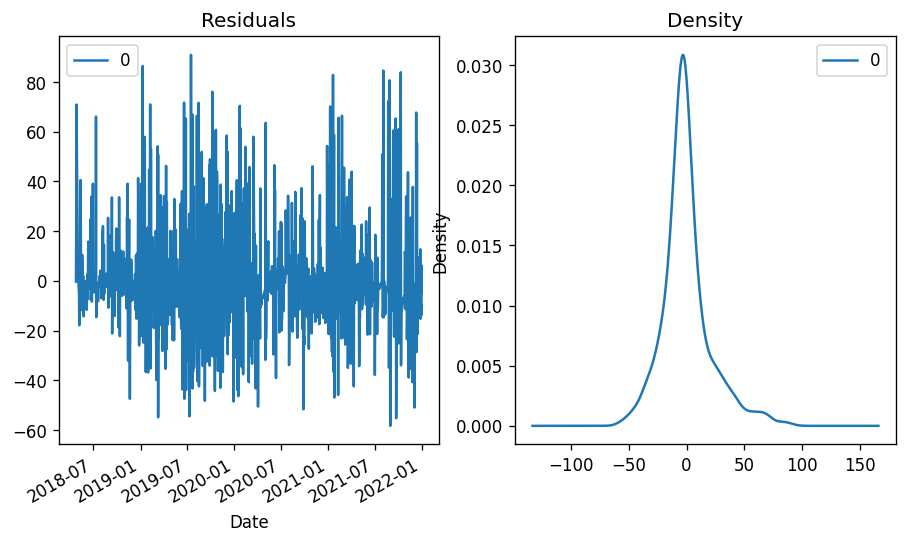

In [482]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<function matplotlib.pyplot.show>

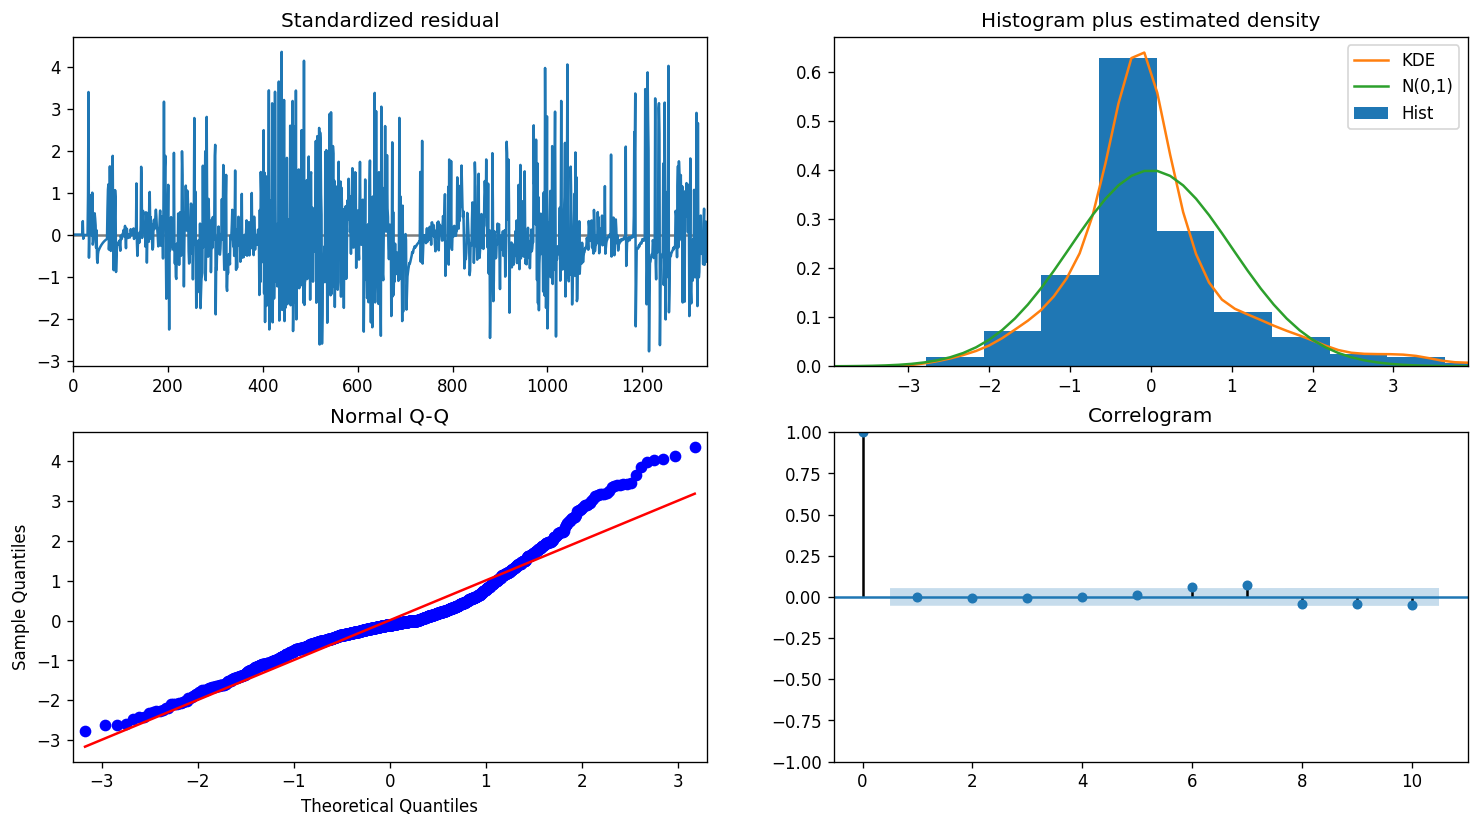

In [483]:
model_no.plot_diagnostics(figsize=(15,8))
plt.show

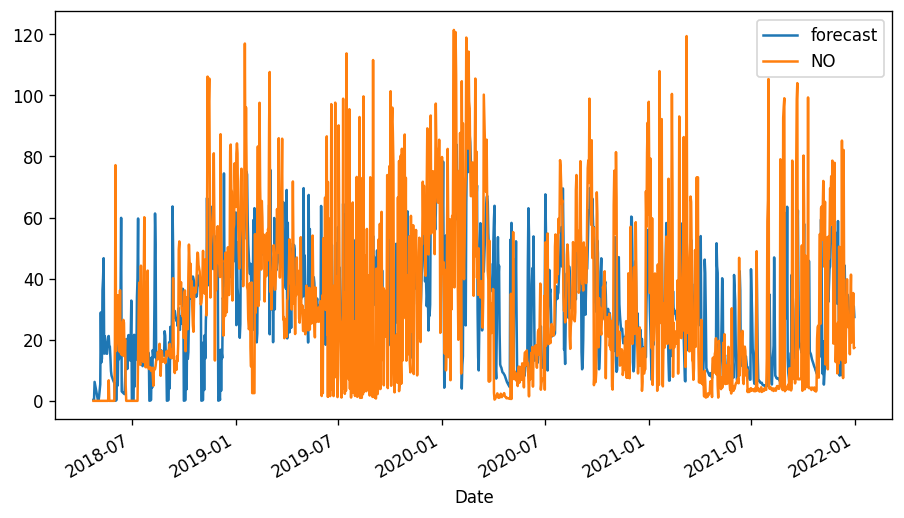

In [484]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

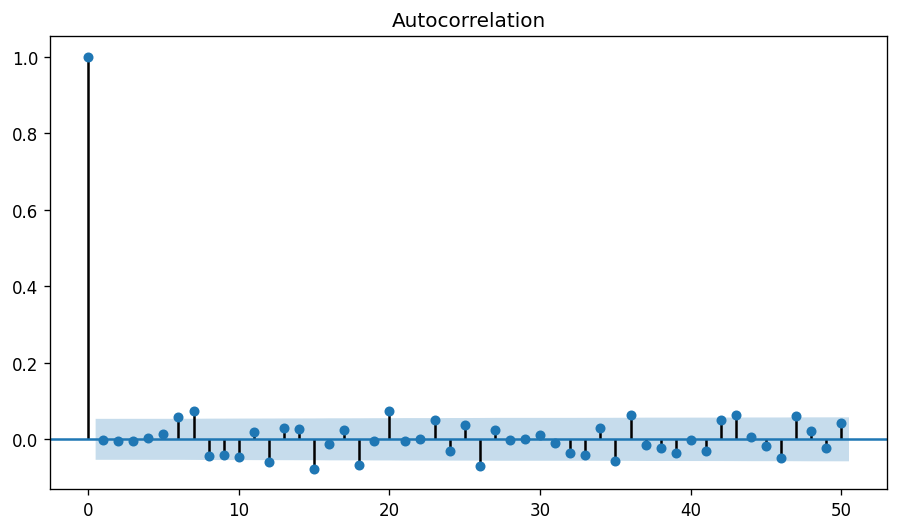

[24.022414   25.63497866 27.04438548 27.63948643 28.00982709 28.20149529
 28.31613039 28.38497515 28.43108877 28.4647569  28.49197089 28.51573669
 28.53769027 28.55868278 28.57916814 28.59938514 28.61946035]
[0.93 4.59 6.64 3.59 5.26 6.27 5.37 5.34 1.71 6.18 2.8  0.68 1.73 1.11
 3.62 2.55 2.84]


In [486]:
# acf plot of residuals
plot_acf(residuals, lags = 50)
plt.show()

y_pred=pd.Series(model_fit.forecast(17)[0], index=test_no.index) 
y_true=test_no
print (np.array(y_pred))
print (np.array(y_true))

In [487]:
df=pd.DataFrame()
df['Actual Value']=y_true
df['Predicted Value']=y_pred
df.head()

Actual Value  Predicted Value
Date                                     
2022-01-01          0.93        24.022414
2022-02-01          4.59        25.634979
2022-01-14          6.64        27.044385
2022-01-15          3.59        27.639486
2022-01-16          5.26        28.009827

In [488]:
mape = np.mean(np.abs(y_pred - y_true) /np.abs(y_true)) # Mean absolute percentage error -
mae = np.mean(np.abs(y_pred - y_true)) # Mean absolute error
mpe = np.mean((y_pred - y_true)/y_true) # Mean percentage error
rmse = np.mean((y_pred - y_true)**2)**.5 # RMSE
corr = np.corrcoef (y_pred, y_true) [0,1]

# Correlation Coefficient
mins = np.amin(np.hstack([y_pred[:,None], y_true[:,None]]), axis=1)
maxs = np.amax(np.hstack([y_pred[:,None], y_true[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)   # minmax

import pprint
pprint.pprint({'mape':mape,'mae':mae,'mpe':mpe,'rmse':rmse,'corr':corr,'minmax' :minmax})

{'corr': 0.053852988154657916,
 'mae': 24.284801907337776,
 'mape': 11.256101009647088,
 'minmax': 0.8708827362335014,
 'mpe': 11.256101009647088,
 'rmse': 24.387478096428616}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



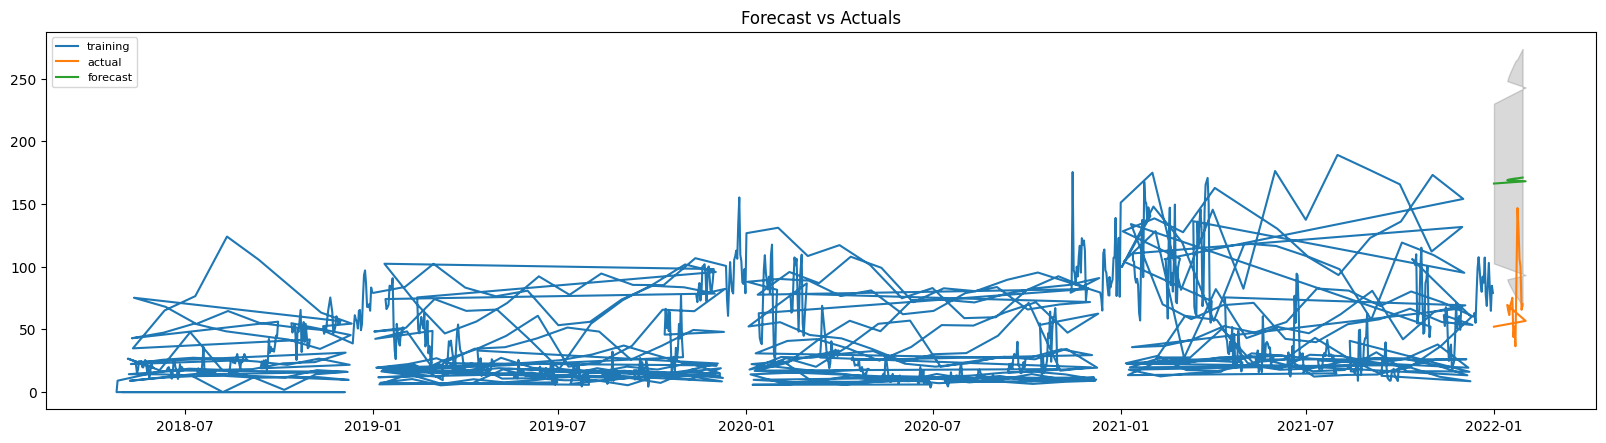

In [490]:
# Build Model
# model = ARIMA(train_pm10, order=(3,2,1))  
model = ARIMA(train_pm10, order=(2, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(17, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test_no.index)
upper_series = pd.Series(conf[:, 1], index=test_no.index)

# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

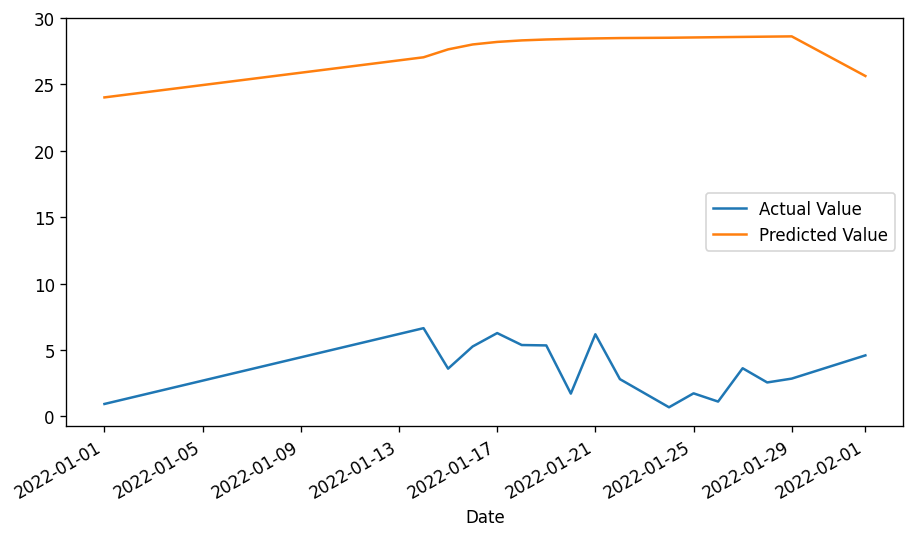

In [491]:
df.plot()

#AQI

In [721]:
Dataset["AQI"].describe()

count    1358.000000
mean      106.657277
std        57.012031
min        12.120000
25%        62.262500
50%        97.645000
75%       143.988333
max       332.025000
Name: AQI, dtype: float64

In [749]:
pd.isnull(Dataset["AQI"]).sum()

2342

In [750]:
AQI=Dataset.iloc[:,30:].loc['01-01-2018':'31-01-2022']
AQI.head()

AQI
Date           
2018-01-01  NaN
2018-02-01  NaN
2018-03-01  NaN
2018-04-01  NaN
2018-05-01  NaN

In [751]:
AQI.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2018-01-01 to 2022-01-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AQI     1347 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [752]:
pd.isnull(AQI['AQI']).sum()

114

In [753]:
AQI["AQI"]=AQI["AQI"].fillna(AQI["AQI"].median())

In [754]:
AQI

AQI
Date                  
2018-01-01   96.700000
2018-02-01   96.700000
2018-03-01   96.700000
2018-04-01   96.700000
2018-05-01   96.700000
...                ...
2022-01-25  226.390000
2022-01-26  181.080000
2022-01-27  173.506667
2022-01-28  127.093333
2022-01-29  129.533333

[1461 rows x 1 columns]

##EDA

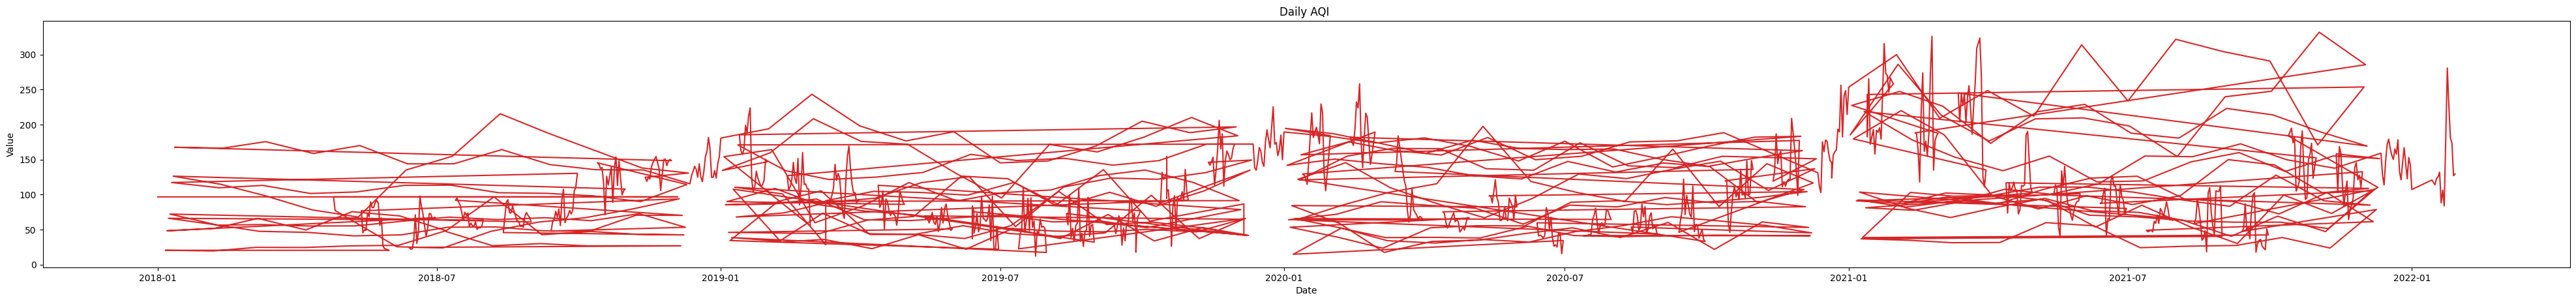

In [755]:
#Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(50,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)

    plt.show()
plot_df(AQI, x=AQI.index, y=AQI, title='Daily AQI ')

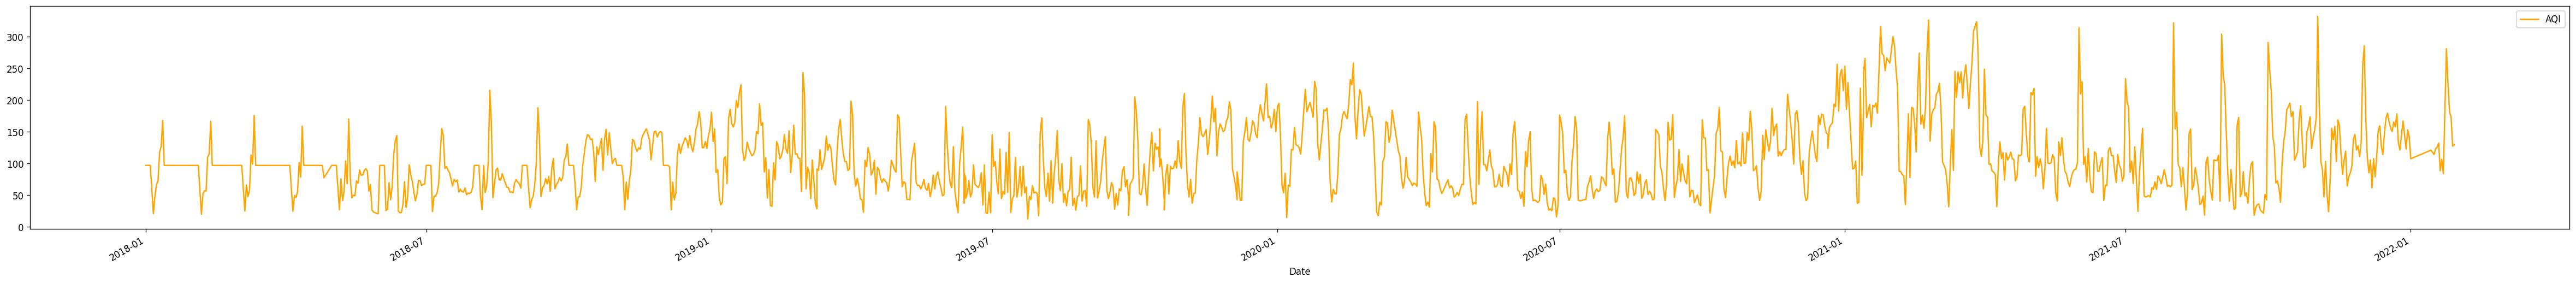

In [756]:
AQI.plot(figsize=(50,5),color="orange")

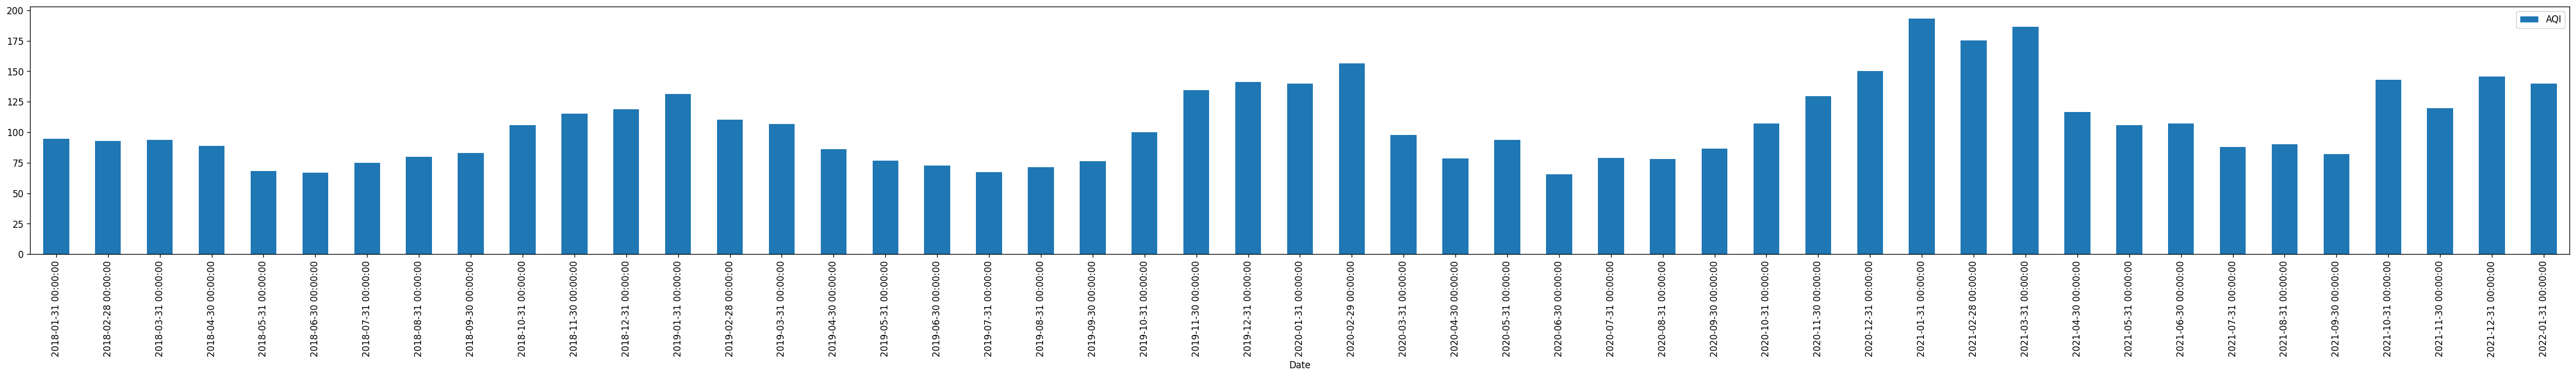

In [757]:
AQI['01-01-2018':'31-01-2022'].resample(rule='M').mean().plot(kind='bar',figsize=(50,5))


In [758]:
AQI['AQI:30 days rolling']=AQI['AQI'].rolling(30).mean()
AQI.head()

AQI  AQI:30 days rolling
Date                                 
2018-01-01  96.7                  NaN
2018-02-01  96.7                  NaN
2018-03-01  96.7                  NaN
2018-04-01  96.7                  NaN
2018-05-01  96.7                  NaN

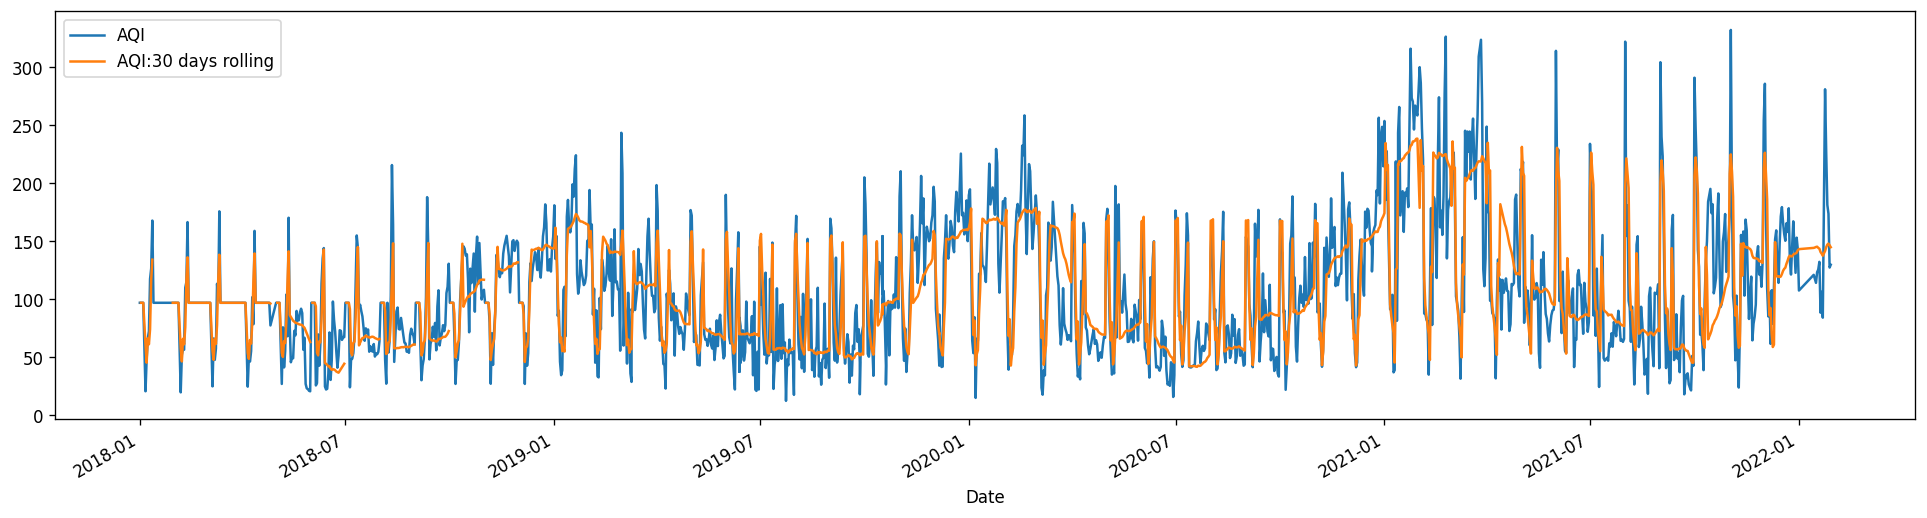

In [759]:
AQI[['AQI','AQI:30 days rolling']].plot(figsize=(20,5))

##ACF and PACF

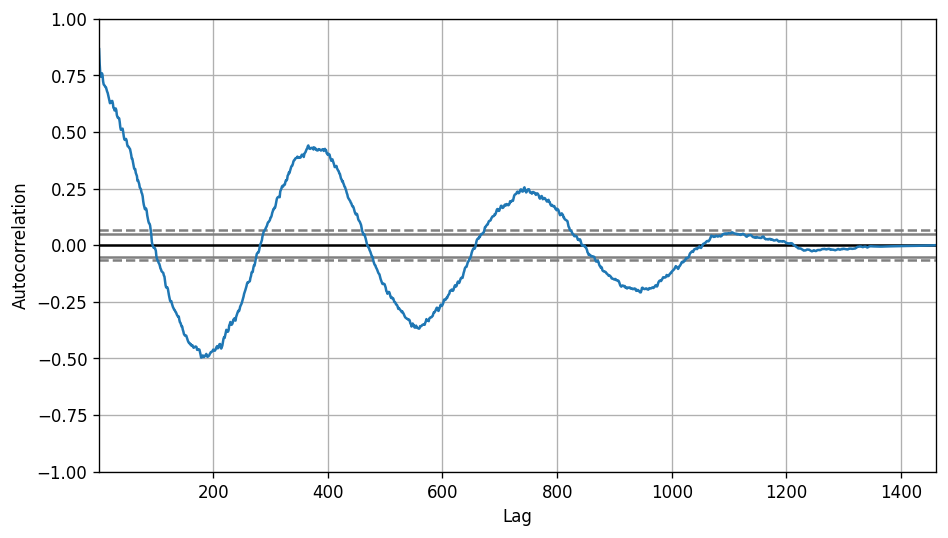

In [760]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(AQI['AQI'].tolist())

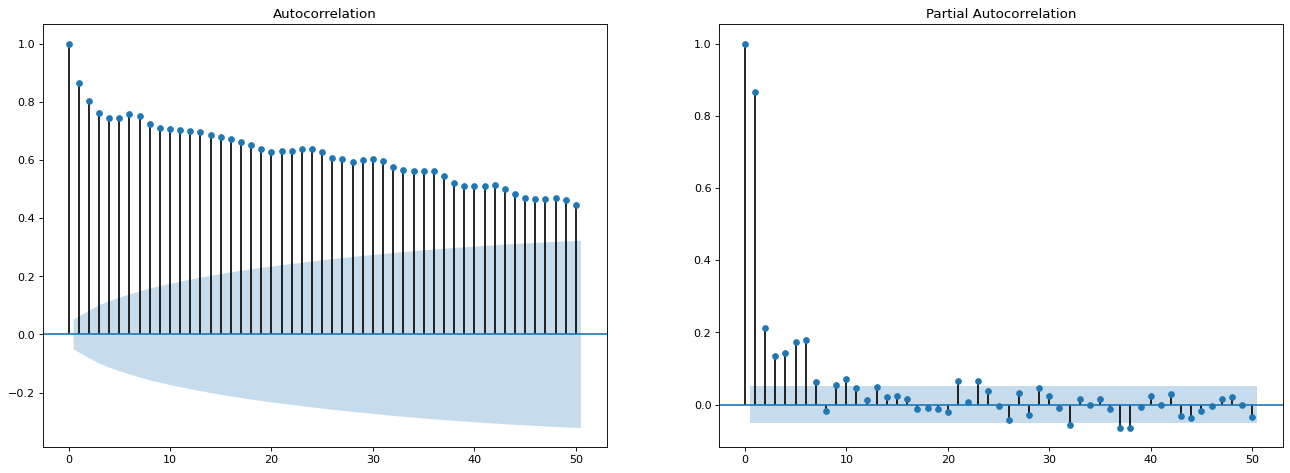

In [761]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
#acf plot of AQI
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(AQI['AQI'], lags = 50,ax=axes[0])
#pacf plot AQI
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(AQI['AQI'], lags = 50,ax=axes[1])
plt.show()


##Test of stationary and causality

In [762]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(AQI['AQI'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


# KPSS Test
result = kpss(AQI['AQI'], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.071669653026096
p-value: 0.028722047176650778
Critial Values:
   1%, -3.4348678719530934
Critial Values:
   5%, -2.863535337271721
Critial Values:
   10%, -2.5678323015457787

KPSS Statistic: 0.504831
p-value: 0.040579
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [763]:
aqi=Dataset.iloc[:,30:].loc['01-01-2018':'01-01-2022']
aqi.head()

AQI
Date           
2018-01-01  NaN
2018-02-01  NaN
2018-03-01  NaN
2018-04-01  NaN
2018-05-01  NaN

In [764]:
aqi["AQI"]=aqi["AQI"].fillna(aqi["AQI"].median())
aqi.head()

AQI
Date              
2018-01-01  95.855
2018-02-01  95.855
2018-03-01  95.855
2018-04-01  95.855
2018-05-01  95.855

In [765]:
aqi.reset_index(inplace=True)

In [766]:
#Granger Causality test 
from statsmodels.tsa.stattools import grangercausalitytests
aqi['Date'] = aqi.Date.dt.month
grangercausalitytests(aqi[['AQI', 'Date']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2221  , p=0.6375  , df_denom=1442, df_num=1
ssr based chi2 test:   chi2=0.2226  , p=0.6371  , df=1
likelihood ratio test: chi2=0.2225  , p=0.6371  , df=1
parameter F test:         F=0.2221  , p=0.6375  , df_denom=1442, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2530  , p=0.7765  , df_denom=1439, df_num=2
ssr based chi2 test:   chi2=0.5078  , p=0.7758  , df=2
likelihood ratio test: chi2=0.5077  , p=0.7758  , df=2
parameter F test:         F=0.2530  , p=0.7765  , df_denom=1439, df_num=2


{1: ({'lrtest': (0.22254767553022248, 0.6371055363904723, 1),
   'params_ftest': (0.22210274166292937, 0.6375136737739993, 1442.0, 1.0),
   'ssr_chi2test': (0.22256481394142005, 0.6370925695771782, 1),
   'ssr_ftest': (0.22210274166334099, 0.6375136737736353, 1442.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.5076757796741731, 0.775817559763903, 2),
   'params_ftest': (0.2530034221389626, 0.7764997566583428, 1439.0, 2.0),
   'ssr_chi2test': (0.507765033451959, 0.775782938212394, 2),
   'ssr_ftest': (0.2530034221389782, 0.7764997566583428, 1439.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

##first order diff

In [767]:
#first order differencing of raw data
AQI['AQI_with_diff_1'] = AQI['AQI'] - AQI['AQI'] .shift(1)
AQI

AQI  AQI:30 days rolling  AQI_with_diff_1
Date                                                        
2018-01-01   96.700000                  NaN              NaN
2018-02-01   96.700000                  NaN         0.000000
2018-03-01   96.700000                  NaN         0.000000
2018-04-01   96.700000                  NaN         0.000000
2018-05-01   96.700000                  NaN         0.000000
...                ...                  ...              ...
2022-01-25  226.390000           144.637667       -54.460000
2022-01-26  181.080000           146.877667       -45.310000
2022-01-27  173.506667           147.749889        -7.573333
2022-01-28  127.093333           146.281000       -46.413333
2022-01-29  129.533333           144.624778         2.440000

[1461 rows x 3 columns]

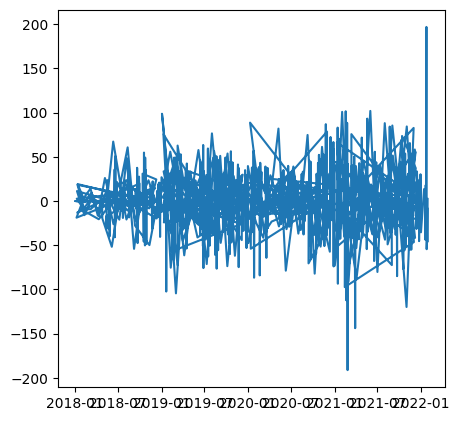

In [768]:
#ploting the time series after first order differning
plt.figure(figsize=(5,5),dpi=100)
plt.plot(AQI.index,AQI['AQI_with_diff_1'])
plt.show()

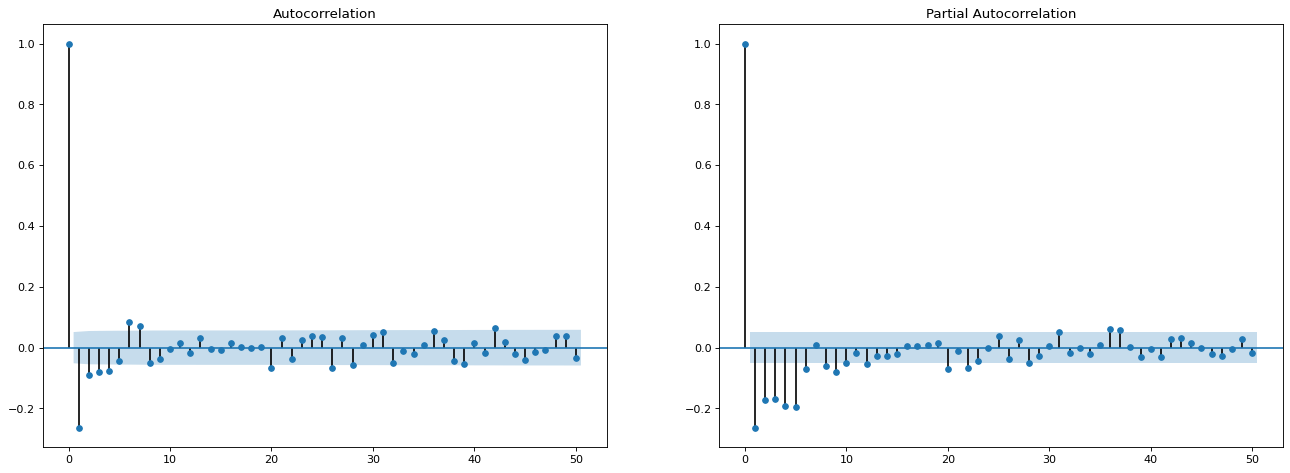

In [769]:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
#acf plot of dataframe of diff 1
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(AQI['AQI_with_diff_1'][1:], lags = 50,ax=axes[0])
#pacf plot of dataframe of diff 1
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(AQI['AQI_with_diff_1'][1:], lags = 50,ax=axes[1])
plt.show()


In [770]:
#DF test on data with diff 1
from statsmodels.tsa.stattools import adfuller
result = adfuller(AQI['AQI_with_diff_1'][1:])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value ADF: %f' % result[1])

# KPSS test
from statsmodels.tsa.stattools import kpss
result1 = kpss(AQI['AQI_with_diff_1'][1:])
print(result1)
print('kpss Statistic: %f' % result1[0])
print('p-value kpss: %f' % result1[1])

(-15.430646996655033, 2.951611512751262e-28, 11, 1448, {'1%': -3.434874123222469, '5%': -2.8635380960841084, '10%': -2.5678337706609993}, 13413.27184321892)
ADF Statistic: -15.430647
p-value ADF: 0.000000
(0.02247711557327864, 0.1, 24, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
kpss Statistic: 0.022477
p-value kpss: 0.100000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



##ARIMA

In [771]:
AQI['AQI'].count()

1461

In [774]:
# Create Training and Test
train_AQI= AQI['AQI']['01-01-2018':'31-12-2021']
test_AQI = AQI['AQI']['31-12-2021':'02-02-2022']
[train_AQI.count(), test_AQI.count()]

[1445, 17]

In [775]:
 model_AQI=auto_arima(train_AQI,start_p=1,start_q=1,max_p=5,max_q=5,seasonal=True,D=2,trace=True,error_action='ignore',stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13441.658, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13733.677, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13631.460, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13555.584, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13731.678, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13443.496, Time=1.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13443.534, Time=0.92 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13464.387, Time=0.46 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13589.709, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13445.458, Time=1.82 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13439.703, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=13553.593, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=13629.464, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=13441.540, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0

In [776]:
model_AQI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1445
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6716.851
Date:                Wed, 18 May 2022   AIC                          13439.703
Time:                        19:59:37   BIC                          13455.528
Sample:                             0   HQIC                         13445.610
                               - 1445                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4318      0.023     18.638      0.000       0.386       0.477
ma.L1         -0.8621      0.014    -60.502      0.000      -0.890      -0.834
sigma2       642.1297     15.895     40.398      0.000     610.976     673.284
===================================================================================
Ljung-Box (Q):                       86.27   Jarque-Bera (JB):               448.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.22   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##ARIMA(1,1,1)

In [778]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA
# 1,1,2 ARIMA Model
model5=ARIMA(train_AQI, order=(1,1,1))
model_fit = model5.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                  D.AQI   No. Observations:                 1444
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6716.829
Method:                       css-mle   S.D. of innovations             25.340
Date:                Wed, 18 May 2022   AIC                          13441.658
Time:                        20:00:11   BIC                          13462.759
Sample:                             1   HQIC                         13449.534
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0342      0.162      0.211      0.833      -0.284       0.352
ar.L1.D.AQI     0.4318      0.034     12.752      0.000       0.365       0.498
ma.L1.D.AQI    -0.8622      0.019    -46.183    

In [779]:
arima(1,1,1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.PM2.5   No. Observations:                 1336
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5518.500
Method:                       css-mle   S.D. of innovations             15.051
Date:                Wed, 18 May 2022   AIC                          11045.000
Time:                        20:00:14   BIC                          11065.789
Sample:                             1   HQIC                         11052.789
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0615      0.110      0.559      0.576      -0.154       0.277
ar.L1.D.PM2.5     0.4614      0.037     12.596      0.000       0.390       0.533
ma.L1.D.PM2.5    -0.8566      0.021    -

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:119: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



[[ 1.         -0.00111886  0.00118707]
 [-0.00111886  1.         -0.74873019]
 [ 0.00118707 -0.74873019  1.        ]]


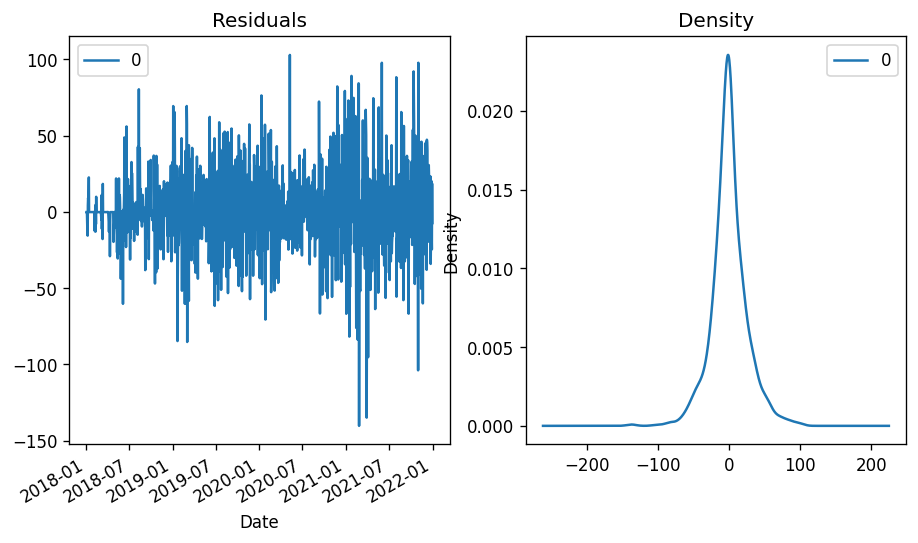

In [780]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<function matplotlib.pyplot.show>

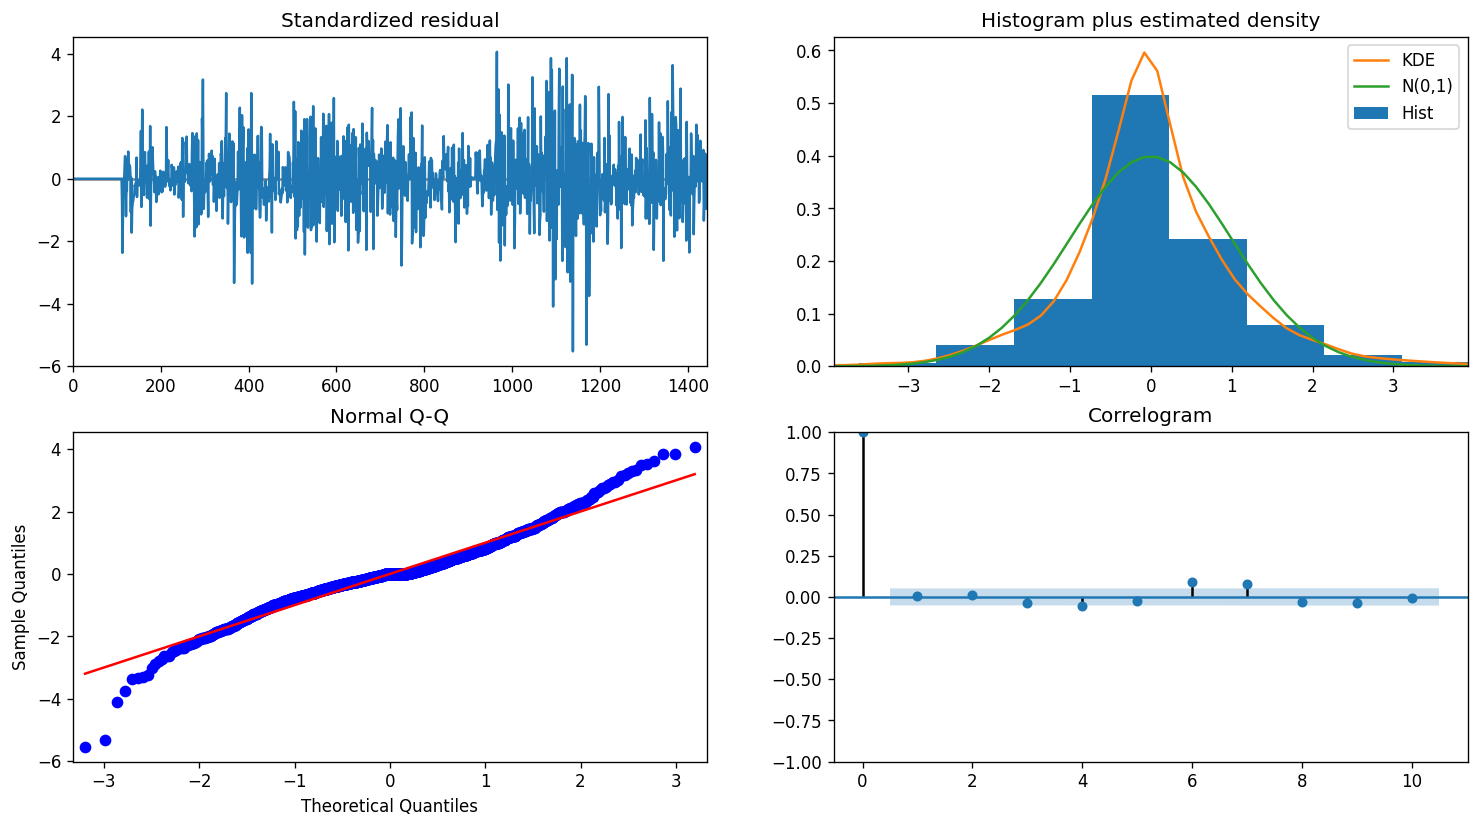

In [781]:
model_AQI.plot_diagnostics(figsize=(15,8))
plt.show

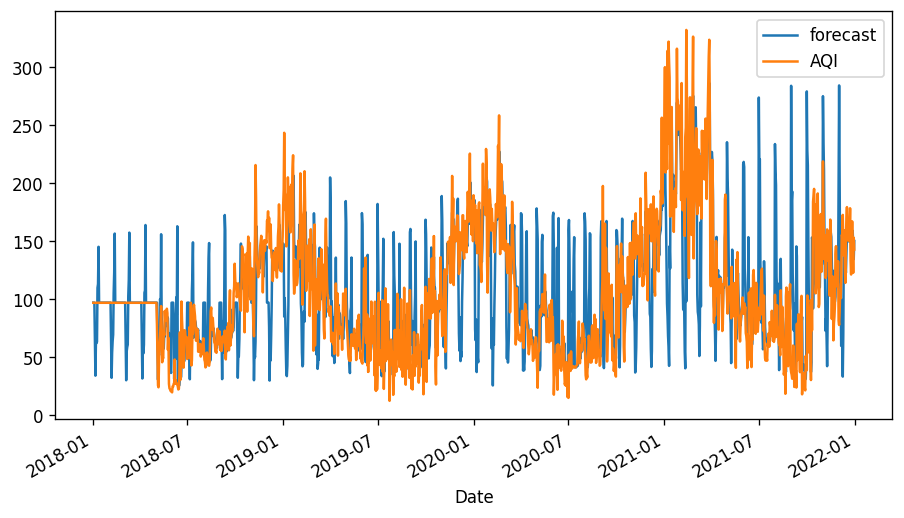

In [782]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

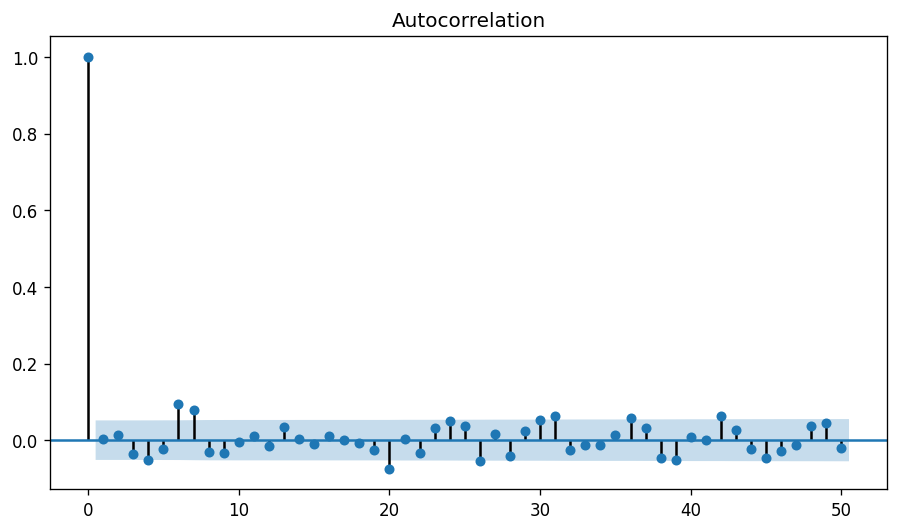

[144.55132311 145.4076781  145.79694208 145.98449841 146.0849497
 146.14778574 146.19437808 146.23395577 146.27050427 146.30574465
 146.34042013 146.37485167 146.40917787 146.44345857 146.47771963
 146.51197221 146.54622112]
[142.6133333 107.2733333 120.7933333 117.36      113.8933333 123.1133333
 125.3466667 132.         88.14      106.1933333  83.85      280.85
 226.39      181.08      173.5066667 127.0933333 129.5333333]


In [784]:
# acf plot of residuals
plot_acf(residuals, lags = 50)
plt.show()

y_pred=pd.Series(model_fit.forecast(17)[0], index=test_AQI.index) 
y_true=test_AQI
print (np.array(y_pred))
print (np.array(y_true))

In [785]:
df=pd.DataFrame()
df['Actual Value']=y_true
df['Predicted Value']=y_pred
df.head()

Actual Value  Predicted Value
Date                                     
2021-12-31    142.613333       144.551323
2022-01-01    107.273333       145.407678
2022-01-14    120.793333       145.796942
2022-01-15    117.360000       145.984498
2022-01-16    113.893333       146.084950

In [787]:
mape = np.mean(np.abs(y_pred - y_true) /np.abs(y_true)) # Mean absolute percentage error -
mae = np.mean(np.abs(y_pred - y_true)) # Mean absolute error
mpe = np.mean((y_pred - y_true)/y_true) # Mean percentage error
rmse = np.mean((y_pred - y_true)**2)**.5 # RMSE
corr = np.corrcoef (y_pred, y_true) [0,1]

# Correlation Coefficient
mins = np.amin(np.hstack([y_pred[:,None], y_true[:,None]]), axis=1)
maxs = np.amax(np.hstack([y_pred[:,None], y_true[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs)   # minmax

import pprint
pprint.pprint({'mape':mape,'mae':mae,'mpe':mpe,'rmse':rmse,'corr':corr,'minmax' :minmax})

{'corr': 0.19298771604900125,
 'mae': 38.664382306489706,
 'mape': 0.2829226536900284,
 'minmax': 0.222797201350466,
 'mpe': 0.14419787176819862,
 'rmse': 49.155893744652936}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



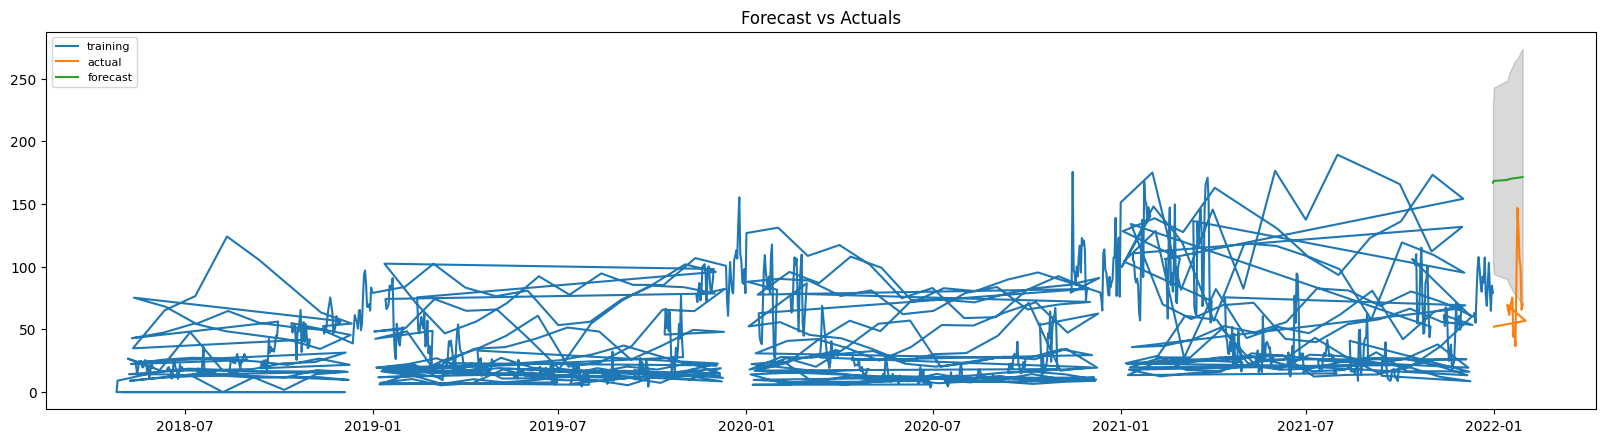

In [789]:
# Build Model
# model = ARIMA(train_pm10, order=(3,2,1))  
model = ARIMA(train_pm10, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(17, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_AQI.index)
lower_series = pd.Series(conf[:, 0], index=test_AQI.index)
upper_series = pd.Series(conf[:, 1], index=test_AQI.index)

# Plot
plt.figure(figsize=(20,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

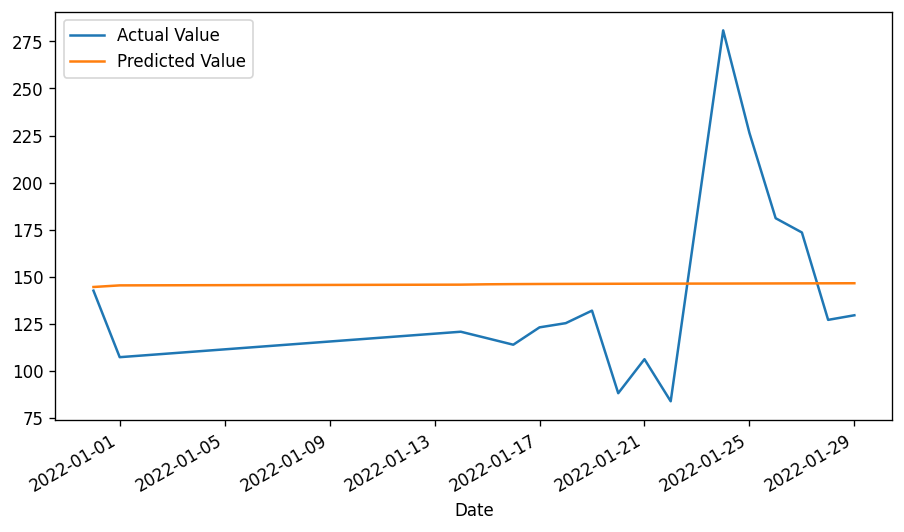

In [790]:
df.plot()

#Conclusion